In [1]:
import sqlite3
import pandas as pd
import nltk
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    PER,
    NamesExtractor,
    Doc
)
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


import matplotlib.pyplot as plt


In [2]:
segmenter = Segmenter()
morph_vocab = MorphVocab()
morph_analyzer = MorphAnalyzer()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

nltk.download(['averaged_perceptron_tagger_ru', 'stopwords', 'punkt'])
stop_words = set(nltk.corpus.stopwords.words('russian'))
stop_symb = set(['.', ' '])

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     C:\Users\R E K L\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\R E K
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\R E K
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
con = sqlite3.connect('../NLP 1/snatcher/db/npp.db')
df = pd.read_sql_query('SELECT * FROM npp', con)
con.close()
df.head()

title  \
0  «Повседневность дагестанской женщины: Кавказск...   
1  Капуцины вынули невкусные кишки из саранчовых....   
2  Мелатонин снизил риск развития возрастной деге...   
3  Котлы бронзового века назвали посудой для приг...   
4  Пять процентов остановок сердца связали с упот...   

                                             content             category  \
0  Как в ходе Кавказской войны изменились привычк...                        
1  Бразильские исследователи описали, как дикие к...             Зоология   
2  Когортное исследование американских ученых пок...             Медицина   
3  Молекулярные биологи исследовали остатки древн...  Археология;Биология   
4  Обзор почти 150 случаев внезапной остановки се...             Медицина   

  created_date  
0     07.06.24  
1     07.06.24  
2     07.06.24  
3     07.06.24  
4     07.06.24

In [4]:
data = df.content.apply(lambda x: x.split('. '))
data

0     [Как в ходе Кавказской войны изменились привыч...
1     [Бразильские исследователи описали, как дикие ...
2     [Когортное исследование американских ученых по...
3     [Молекулярные биологи исследовали остатки древ...
4     [Обзор почти 150 случаев внезапной остановки с...
                            ...                        
92    [Космический корабль CST-100 Starliner в 20:35...
93    [Российский математик Сергей Петрович Новиков ...
94    [Мы точно не знаем, как люди научились пользов...
95    [Лондон, 2010 год, В лаборатории больницы свят...
96    [Cчитаете, что можете рассказать аудитории . з...
Name: content, Length: 97, dtype: object

# Нормализация

In [5]:
def normalize_text(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    
    normalized_tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in stop_words and token.lemma not in stop_symb:
            normalized_tokens.append(token.lemma)
    return ' '.join(normalized_tokens)

In [6]:
normis = []
for i in range(len(data)):
    normis.append([normalize_text(sent) for sent in data[i]])
normis[1]

['бразильский исследователь описать , дикий капуцин национальный парк серра-да-капивар обрабатывать гигантский саранчовый , который питаться',
 'поскольку пищеварительный тракт насекомое накапливаться токсичный неприятный вкус вещество , обезьяна удалять кишечник',
 'делать молодой , взрослый особь , однако взрослый справляться обработка быстрый',
 'ученый предположить , капуцин постепенно учиться обрабатывать токсичный насекомое — метод проба ошибка , либо наблюдать сородич',
 'исследование',
 'журнал ... многий вид членистоногий вырабатывать химический защита иметь неприятный вкус , защищать проглатывания хищник —',
 'желудок',
 'процесс коэволюция хищник вырабатывать способ обходить защита свой жертва — например , избегать проглатывание токсичный часть удалять поедание .. исследователь университет сан-пауло глава тьяго фалотико ( tiago falótico ) наблюдать , чернополосый капуцин ( ) национальный парк серра-да-капивар гигантский саранчовый род',
 'насекомое токсичный , ядовитый расте

# Векторизация

In [7]:
vectors = []
vectorizer = CountVectorizer()
for text in normis:
    if len(text) < 2:
        continue
    X = vectorizer.fit_transform(text)
    vectors.append(X)

# Сжатие

In [8]:
compress = []
for X in vectors:
    pca = PCA(n_components=2)
    compress.append(pca.fit_transform(X.toarray()))

# Клатеризация

In [9]:
cluster = []
for x_pca in compress:
    dbscan = DBSCAN(eps=0.5, min_samples=2)
    cluster.append(dbscan.fit_predict(x_pca))

# Визуализация

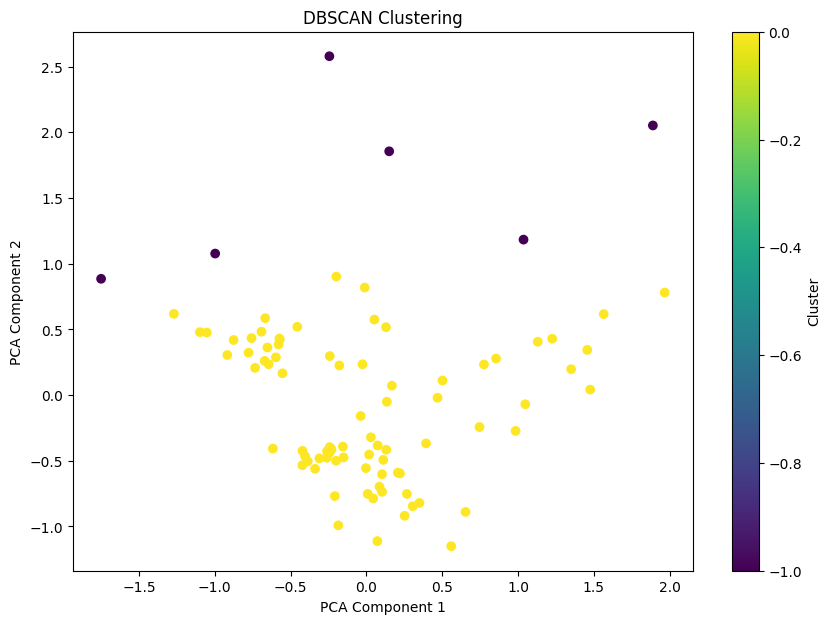

0
Cluster 0:
['Как в\xa0ходе Кавказской войны изменились привычки и\xa0поведение, личный, социальный и\xa0правовой статус дагестанский женщин? Как повлияли на\xa0их\xa0положение общероссийские реформы середины и\xa0конца XIX\xa0века? В\xa0книге ', '(издательство «НЛО») историк Оксана Мутиева исследует опыт женщин, от\xa0рядовых дагестанок до\xa0жен военных и\xa0государственных чинов, которые были вынуждены адаптироваться к\xa0политическому и\xa0военному кризису в\xa0регионе', 'Особое внимание уделялось вдовам, одиноким женщинам, которые в\xa0силу разных обстоятельств не\xa0имели семьи', 'В\xa0связи с\xa0бесконечными войнами, которые неминуемо приводили к\xa0гибели мужского населения, вдовство являлось распространенным жизненным сценарием', 'Добавим к\xa0этому и\xa0традиционный институт «кровной мести», из-за которого сотнями погибали мужчины, а\xa0нередко и\xa0целые аулы', 'Все это, разумеется, приводило к\xa0увеличению числа вдовствующих женщин, которые нуждались в\xa0социальной помощ

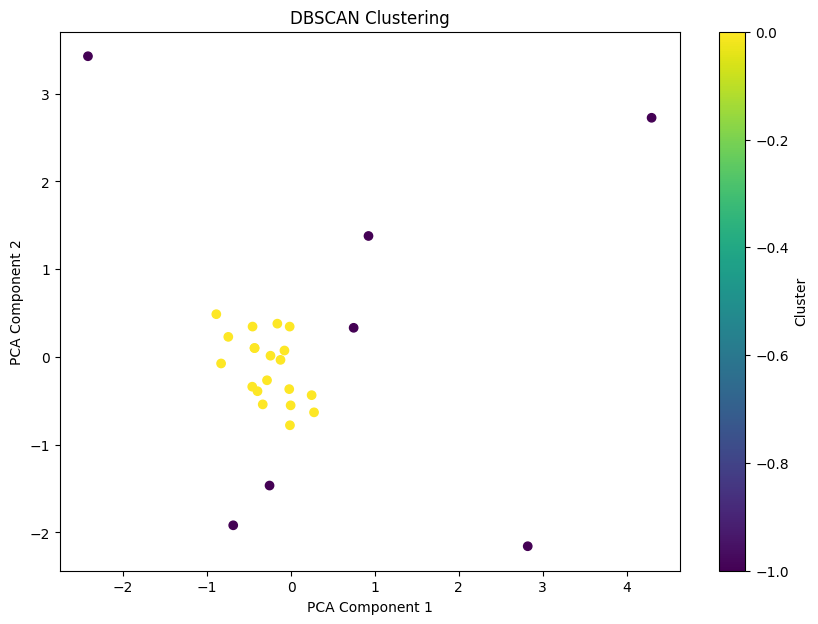

1
Cluster 0:
['Поскольку в\xa0пищеварительном тракте этих насекомых накапливаются токсичные и\xa0неприятные на\xa0вкус вещества, обезьяны удаляли их\xa0кишечник', 'Так делали и\xa0молодые, и\xa0взрослые особи, однако взрослые справлялись с\xa0обработкой быстрее', 'Ученые предположили, что капуцины постепенно учатся обрабатывать токсичных насекомых\xa0— методом проб и\xa0ошибок, либо наблюдая за\xa0сородичами', 'Исследование ', 'в\xa0журнале ...Многие виды членистоногих вырабатывают химическую защиту или имеют неприятный вкус, что защищает их\xa0от\xa0проглатывания хищниками\xa0— или даже ', 'уже из\xa0желудка', 'Эти насекомые не\xa0токсичны сами по\xa0себе, но\xa0едят ядовитые растения и\xa0накапливают токсины в\xa0пищеварительном тракте', 'Ученые ожидали, что обезьяны будут избегать проглатывания неприятных на\xa0вкус (и, возможно, токсичных) частей насекомых', 'Всего они насчитали 92\xa0случая, когда капуцины\xa0— 11\xa0взрослых особей и\xa06\xa0молодых\xa0— поедали этих насекомых ил

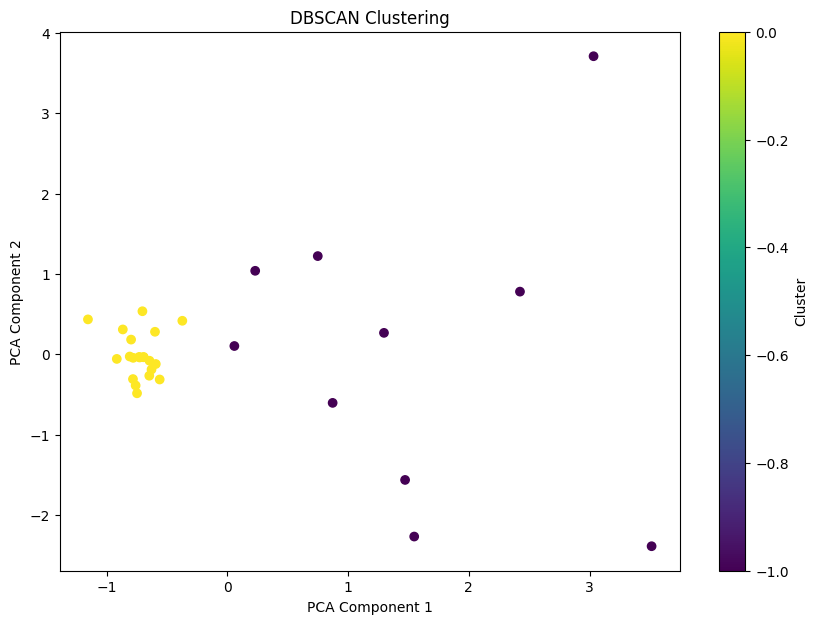

2
Cluster 0:
['Результаты исследования ', 'Эта патология ', 'основной причиной потери зрения у\xa0людей старше 60\xa0лет', 'По\xa0прогнозам, заболеваемость будет неуклонно расти и\xa0к\xa02050 году достигнет 18\xa0миллионов человек только в\xa0США', 'Хотя точный патогенез макулодистрофии остается неясным, в\xa0качестве ключевых звеньев ', 'окислительное повреждение, патологическую неоваскуляризацию и\xa0потерю регенеративной функции клеток сетчатки', 'И\xa0несмотря на\xa0то, что недавние достижения в\xa0области терапии блокатором эндотелиального фактора роста существенно облегчили неблагоприятные последствия макулодистрофии, ее\xa0эффективность и\xa0удобство продолжают быть предметом исследования', '.Хотя добавки мелатонина используются для лечения нарушений сна, несколько исследований ', 'его антиоксидантный и\xa0противовоспалительный эффекты', 'Поскольку эти свойства могут противодействовать многим ключевым патологическим процессам, которые приводят к\xa0возрастной макулодистрофии, м

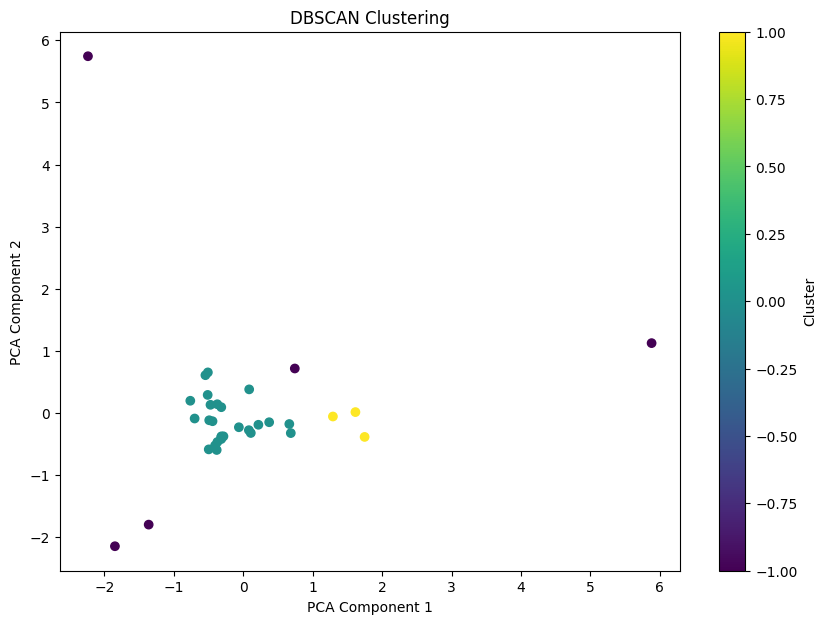

3
Cluster 0:
['Молекулярные биологи исследовали остатки древних белков в\xa0двух котлах позднего бронзового века, обнаруженных в\xa0Монголии', 'Ученые выяснили, что эти металлические сосуды, по-видимому, использовались для приготовления кровяной колбасы', 'Об\xa0этом ', 'в\xa0статье, опубликованной в\xa0журнале ...Во\xa0многих культурах Северной Евразии, существовавших в\xa0эпоху бронзы и\xa0раннем железном веке, люди изготавливали и\xa0использовали металлические котлы', 'Самые ранние примеры такого типа сосудов известны из\xa0памятников ., которая возникла на\xa0территории Северного Кавказа в\xa0первых веках\xa0IV тысячелетия до\xa0нашей эры', 'Благодаря сохранившимся органическим остаткам внутри двух бронзовых котлов этой общности, недавно ученые ., что майкопцы готовили в\xa0них блюда из\xa0мяса, крови и\xa0молока домашних\xa0и, возможно, диких животных..Хорошо ', 'бронзовые котлы раннего железного века', 'Они ', 'на\xa0поселениях, в\xa0погребениях и\xa0ритуальных местах, однако бол

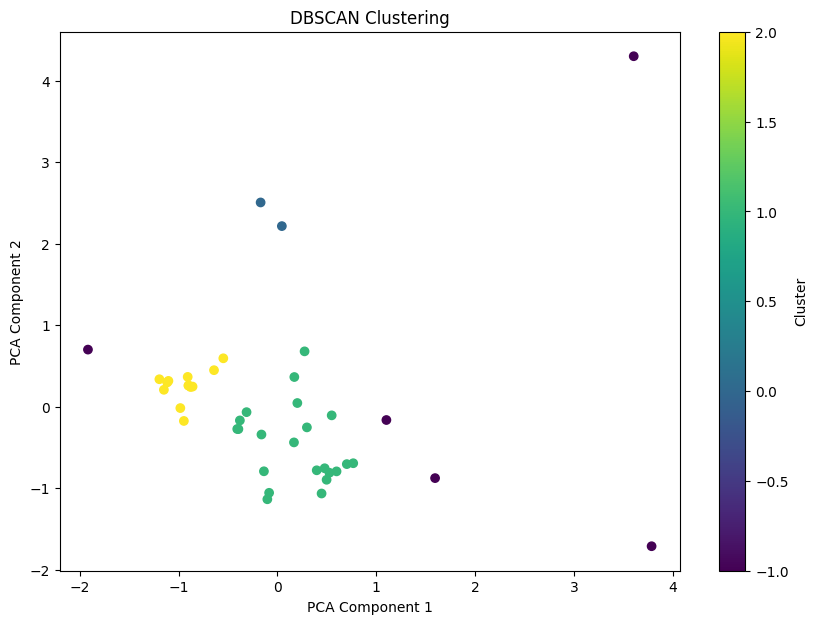

4
Cluster 0:
['У\xa0этих пациентов наблюдался синдром удлиненного интервала\xa0QT, желудочковая тахикардия и\xa0идиопатическая фибрилляция желудочков', 'К\xa0таким заболеванием отсносятся, в\xa0частности, синдром удлиненного интервала\xa0QT, катехоламинергическая полиморфная желудочковая тахикардия и\xa0идиопатическая фибрилляция желудочков']
Cluster 1:
['В\xa0большинстве случаев остановка происходила во\xa0время спортивных тренировок, перед которыми пациенты употребляли энергетические напитки', '.В\xa0течение последних нескольких лет рынок энергетических напитков неуклонно растет', 'С\xa0появлением новых брендов, ориентированных на\xa0более молодые возрастные группы, энергетические напитки ', 'Однако большинство энергетических напитков содержат и\xa0другие стимулирующие ингредиенты в\xa0дополнение к\xa0кофеину', 'потенциальную корреляцию между высоким потреблением кофеина (больше 10\xa0чашек кофе в\xa0день) и\xa0внезапной остановкой сердца', 'Кроме того, у\xa0людей с\xa0наследственным

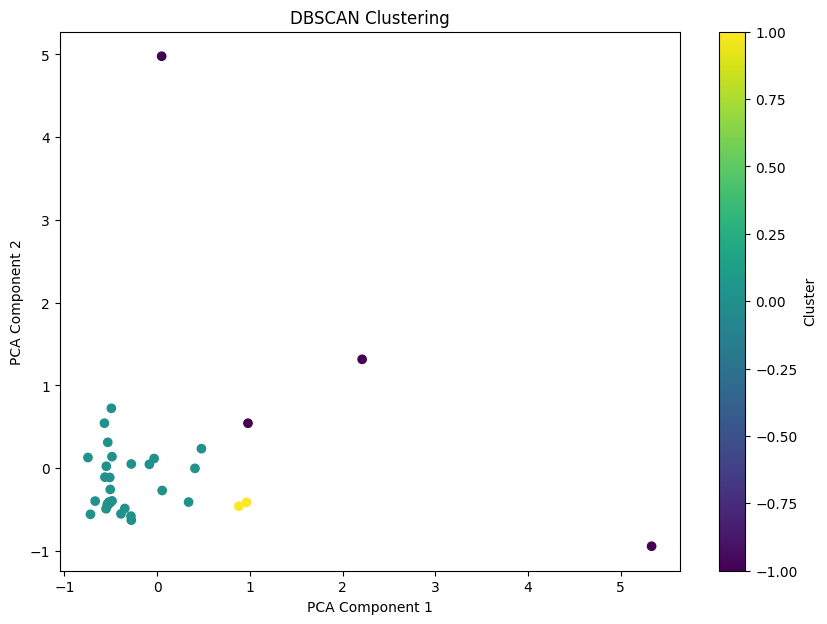

5
Cluster 0:
['Он\xa0получил название .', 'Как ', 'в\xa0статье для журнала ., необычное растение произрастает на\xa0охраняемых территориях, так что вырубка лесов ему пока не\xa0угрожает', 'Однако оно может быть подвержено вытаптыванию со\xa0стороны сходящих с\xa0тропы туристов..К\xa0роду ', '(.) относятся около 100 видов микогетеротрофных растений, которые распространены в\xa0тропических и\xa0субтропических лесах Азии, Австралии с\xa0Океанией и\xa0Америки', 'Они утратили способность к\xa0фотосинтезу и\xa0всю необходимую энергию получают, паразитируя на\xa0грибнице', 'Из-за столь необычного образа жизни тисмии и\xa0сами стали больше похожими на\xa0грибы, чем на\xa0растения: у\xa0них нет хлорофилла, стебли короткие и\xa0неразветвленные, а\xa0листья редуцированы до\xa0чешуек', 'Большая часть жизненного цикла тисмий проходит под землей', 'Например, в\xa02021 году на\xa0Малайском полуострове было открыто сразу два новых вида из\xa0этого рода: ', 'с\xa0оранжевыми цветками и\xa0.\xa0— с\xa0бе

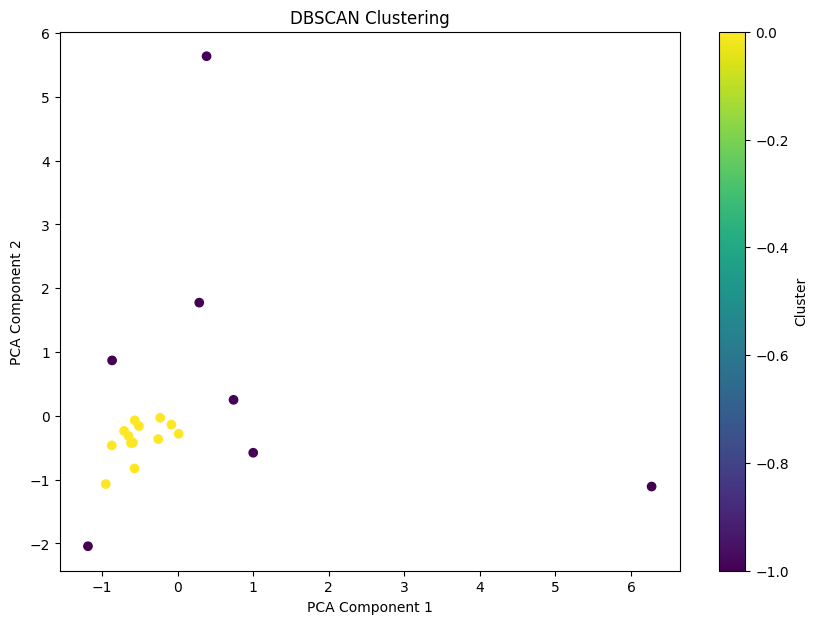

6
Cluster 0:
['С\xa0начала XXI века океан стал нагреваться вдвое быстрее,\xa0сейчас его температура в\xa0среднем на\xa01,45 градуса выше доиндустриального уровня', 'Такие выводы содержит доклад о\xa0состоянии океана, который ', 'В\xa0нем растет теплосодержание, за\xa0счет чего происходит тепловое расширение воды и\xa0', 'уровень моря', 'В\xa0воде растворяется все больше углекислого газа, концентрация которого растет в\xa0атмосфере, и\xa0океан становится более .', 'В\xa0то\xa0же время из-за нагрева в\xa0его водах все хуже растворяется кислород, а\xa0характер некоторых течений ', 'из-за их\xa0распреснения тающими ледниками', 'В\xa0среднем температура океана выросла уже на\xa01,45 градуса относительно доиндустриальных значений, но\xa0уже сейчас наблюдаются отдельные очаги (в\xa0тропических широтах Атлантики, Средиземном море и\xa0вокруг Антарктиды) потепления более чем на\xa0два градуса', 'Авторы отметили эффективность охраняемых морских районов: сейчас в\xa0них встречается до\xa072\xa0пр

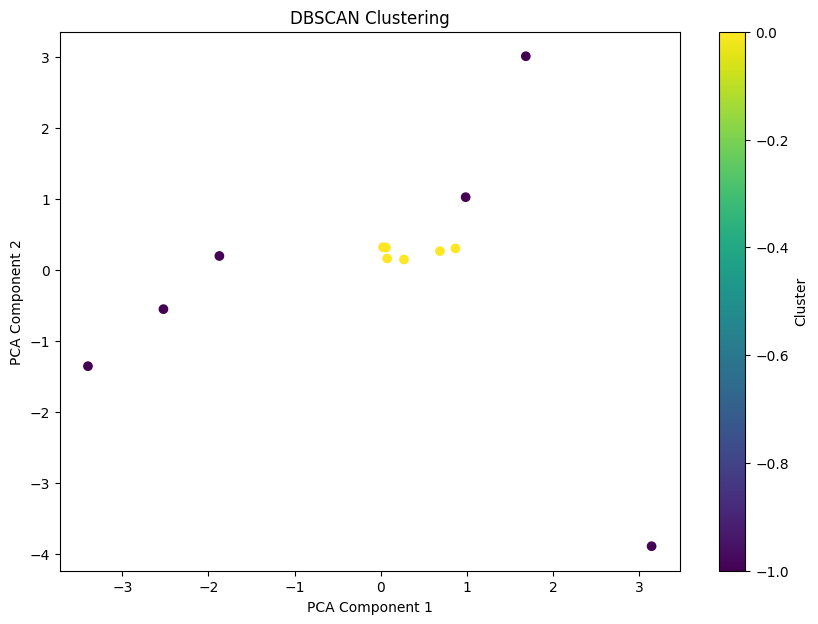

7
Cluster 0:
['Результаты исследования ', 'освободительную борьбу египтян против иноземных захватчиков', 'Мумию этого человека обнаружили еще в\xa01881 году в\xa0фиванском тайнике в\xa0Дейр-эль-Бахри', 'Ее\xa0исследование ., что этот человек трагически закончил свою жизнь в\xa0возрасте примерно 40\xa0лет', 'В одной из европейских стран он посетил дом своих родителей, которые во время ремонта выложили пол травертиновой плиткой, привезенной из Турции', 'Будучи стоматологом по профессии автор этого поста обратил внимание на то, что в одной из плиток сохранились окаменевшие остатки, которые похожи на фрагмент человеческой нижней челюсти с несколькими зубами']
Cluster -1:
['Бразильский исследователь и\xa03D-дизайнер Сисеро Мораис (Cicero Moraes) совместно с\xa0Михаэлем Хабихьтом (Michael Habicht) из\xa0Университета Флиндерса восстановил внешний облик древнеегипетского царя XVII династии Секененра Таа\xa0II, погибшего в\xa0середине XVI века до\xa0нашей эры', 'Итоги своей работы они представи

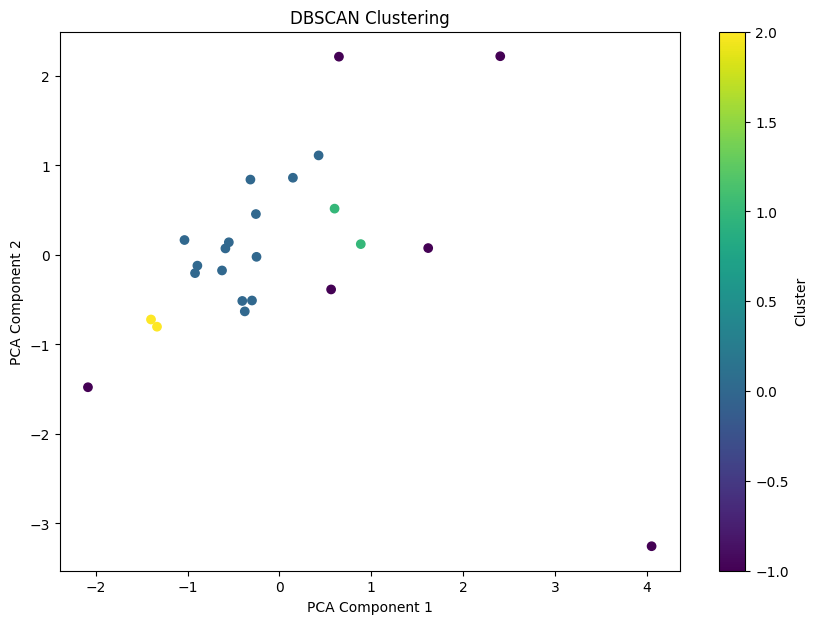

8
Cluster 0:
['Кроме того, вакцинация была связана со\xa0снижением риска преждевременных родов', 'Результаты исследования ', 'в\xa0журнале .', '.Коронавирусная инфекция во\xa0время беременности ', 'Однако в\xa0нескольких исследованиях высказывались опасения по\xa0поводу их\xa0эффекта на\xa0исход беременности', 'Для этого использовалась когорте клиентов страховой компании Kaiser Permanente, состоящей из\xa0женщин в\xa0возрасте 16–49 лет с\xa0восьмой недели беременности', 'В\xa0анализе исследовалось влияние вакцин от\xa0трех производителей: Pfizer—BioNTech, Moderna и\xa0Johnson &\xa0Johnson/Janssen', 'При этом вакцинация не\xa0была связана с\xa0рождением малого для гестационного возраста ребенка, развитием гестационного диабета гипертонических расстройств и\xa0преэклампсии', 'Результаты оставались аналогичными при оценке по\xa0подгруппам, разделенным по\xa0триместрам получения вакцины', '.Это масштабное исследование показывает безопасность вакцинации против ковида во\xa0время беременност

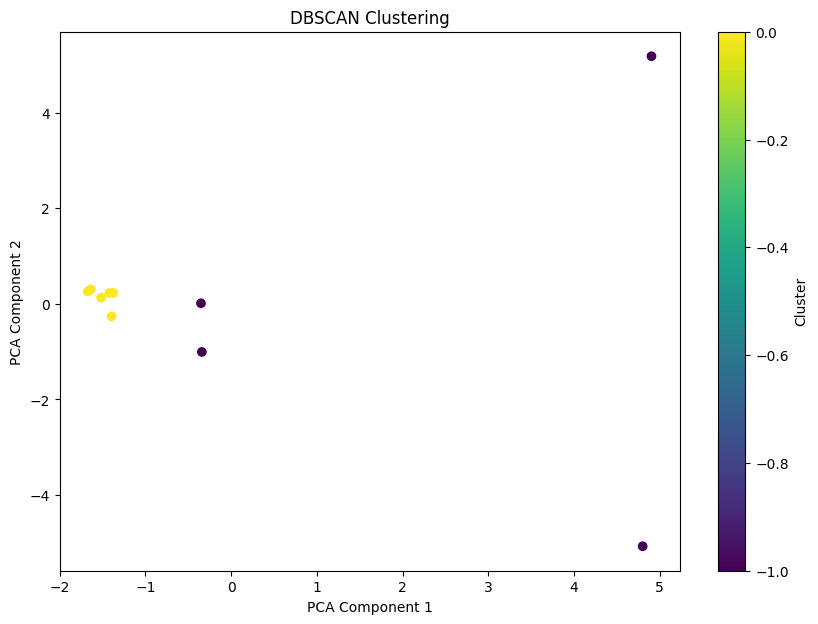

9
Cluster 0:
['Китайские ученые провели проспективное когортное исследование и\xa0пришли к\xa0выводу, что метаболические параметры детей, родившихся в\xa0результате экстракорпорального оплодотворения, не\xa0зависят от\xa0того, свежие или замороженные эмбрионы использовались для этого', 'Публикация об\xa0этом ', 'в\xa0журнале .', 'Линьлинь Цуй (Linlin Cui) из\xa0Китайской академии медицинских наук с\xa0коллегами проанализировал данные из\xa0когорты вспомогательных репродуктивных технологий Шаньдунского университета ARTKID за\xa02009–2019\xa0годы', 'В\xa02181 случае использовали замороженные эмбрионы, в\xa02065\xa0— свежие', 'Результаты демографического исследования опубликованы в\xa0Journal of\xa0Clinical Child &\xa0Adolescent Psychology.']
Cluster -1:
['В\xa0анализ вошли 4246 детей в\xa0возрасте 2–5\xa0лет, рожденных после одноплодной беременности', 'Средний период наблюдения за\xa0каждым ребенком составил 3,6\xa0года..За\xa0период наблюдения между когортами не\xa0оказалось статистичес

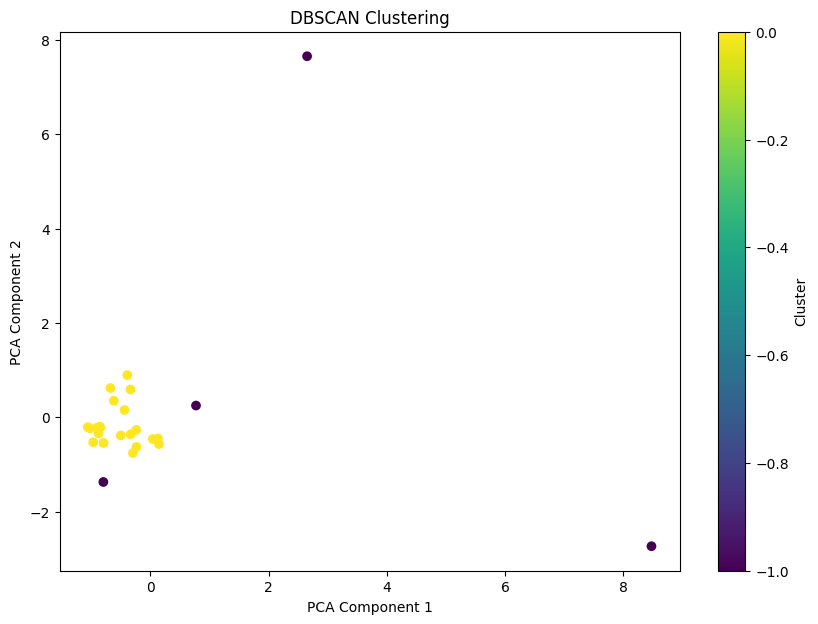

10
Cluster 0:
['Палеопатологи представили результаты исследований 237 мумифицированных останков взрослых людей, представлявших различные культуры и\xa0эпохи', 'С\xa0помощью компьютерной томографии они выявили у\xa089\xa0человек (примерно 37,6\xa0процента) признаки атеросклероза', 'Следы этого патологического состояния ученые обнаружили во\xa0всех исследованных древних и\xa0исторических популяциях, за\xa0исключением австралийских аборигенов, которые были представлены лишь одной мумией', 'Об\xa0этом ', 'в\xa0статье, опубликованной в\xa0...Атеросклероз ', 'собой патологическое состояние, характеризующееся тем, что на\xa0стенках ', 'и\xa0артерий образуются плотные бляшки, которую сужают их\xa0просвет и\xa0приводят к\xa0расстройствам кровообращения', 'В\xa0результате атеросклероз провоцирует развитие многих сердечно-сосудистых заболеваний, например, инфарктов, инсультов, ишемической болезни сердца и\xa0ряда других', 'Распространено мнение, что атеросклероз\xa0— достаточно современное заболе

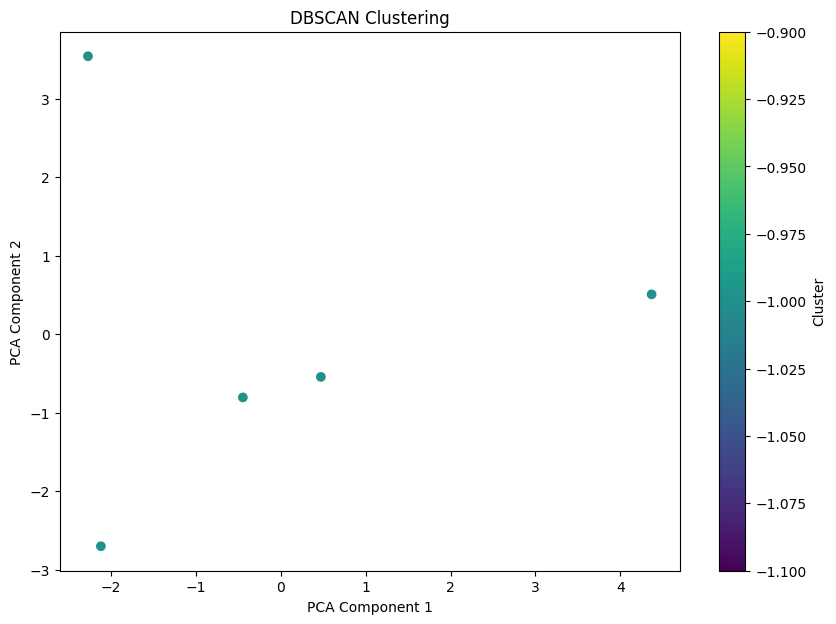

11
Cluster -1:
['Ученые ', 'наличие скрытого джета у\xa0сверхмассивной черной дыры Стрелец А\xa0в\xa0центре нашей галактики', 'Как это отразится на\xa0Млечном Пути и\xa0как вообще релятивистские джеты влияют на\xa0вещество во\xa0Вселенной?.В\xa0новом выпуске подкаста редактор N\xa0+\xa01\xa0Александр Войтюк и\xa0член коллаборации «Телескоп горизонта событий», старший научный сотрудник Астрокосмического центра Физического института имени П.Н', 'Лебедева РАН Михаил Лисаков говорят про новую карту магнитных полей, построенную с\xa0помощью Телескопа горизонта событий\xa0— радиоинтерферометра, составленного из\xa0телескопов, разбросанных по\xa0разным континентам', 'Спикеры обсуждают, как магнитные поля управляют аккрецией вещества на\xa0черную дыру, откуда взялся джет у\xa0нашей черной дыры, ведь темп аккреции достаточно низкий, почему его не\xa0видели раньше и\xa0что все это значит..Выпуск доступен везде, где вы\xa0привыкли слушать подкасты: на\xa0., ., ., ., ..']


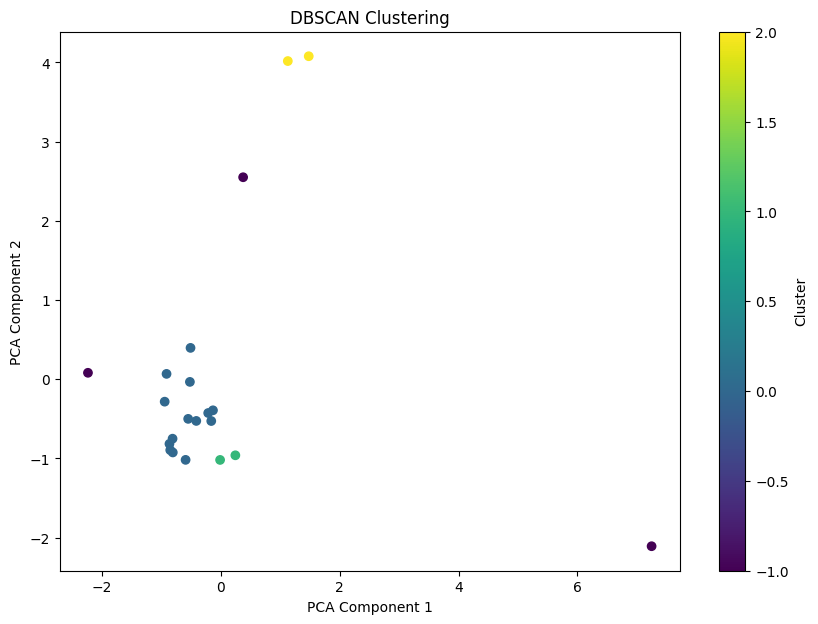

12
Cluster 0:
['Астрономы при помощи космического телескопа Gaia определили время последнего крупного слияния Млечного Пути с\xa0карликовой галактикой', 'Статья ', 'в\xa0журнале .Галактики способны наращивать массу за\xa0счет слияний, не\xa0стал исключением и\xa0Млечный Путь, звездное гало которого содержит вещество аккрециированных в\xa0прошлом галактик', 'Считается, что доминирующий вклад в\xa0гало сделала массивная карликовая галактика, ', '.Однако датировка этого события остается предметом споров среди астрофизиков', 'Таким образом, вопрос о\xa0том, действительно\xa0ли для объяснения наблюдаемых свойств Млечного Пути нужно древнее в\xa0крупное событие слияния с\xa0другой галактикой, остается открытым', '.Группа астрономов во\xa0главе с\xa0Томасом Донлоном (Thomas Donlon) из\xa0Политехнического института Ренсселера нашла новые доказательства в\xa0пользу того, что структуры, связанные с\xa0«Гайей-Энцеладом», на\xa0самом деле представляют собой ряд отдельных событий аккреции вещества 

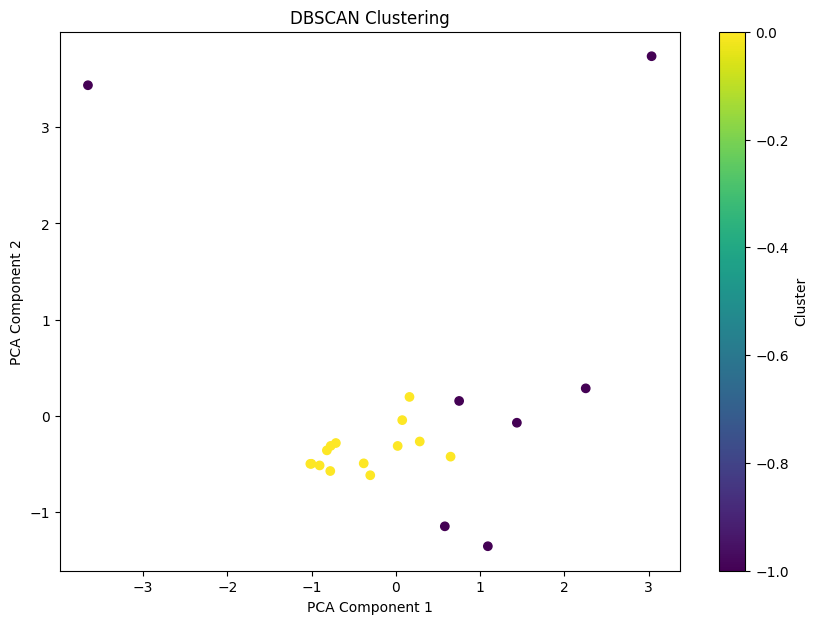

13
Cluster 0:
['Химики из\xa0Германии исследовали процесс диссоциации хлороводорода на\xa0ионы в\xa0небольших водных кластерах', 'С\xa0помощью квантово-химических расчетов и\xa0вращательной спектроскопии ученым удалось установить, что в\xa0условиях их\xa0эксперимента для диссоциации хлороводорода было необходимо пять или больше молекул воды', 'Исследование ', 'Но\xa0пронаблюдать за\xa0процессом диссоциации на\xa0молекулярном уровне очень сложно', 'При этом смесь газов резко охлаждалась до\xa0температуры близкой к\xa0абсолютному нулю, и\xa0столкновения между молекулами прекращались\xa0— в\xa0этот момент регистрировался вращательный спектр..В\xa0полученных спектрах ученые обнаружили сигналы водных и\xa0хлороводородных кластеров', 'Им\xa0удалось идентифицировать сигналы от\xa0кластера HCl(H2O)., не\xa0содержащего отдельных ионов H.O.и\xa0Cl\xad.', 'А\xa0в\xa0случае кластеров HCl(H2O).и\xa0HCl(H2O)', 'ученые наблюдали сигналы, соответствующие контактным ионным парам', 'представляют собой к

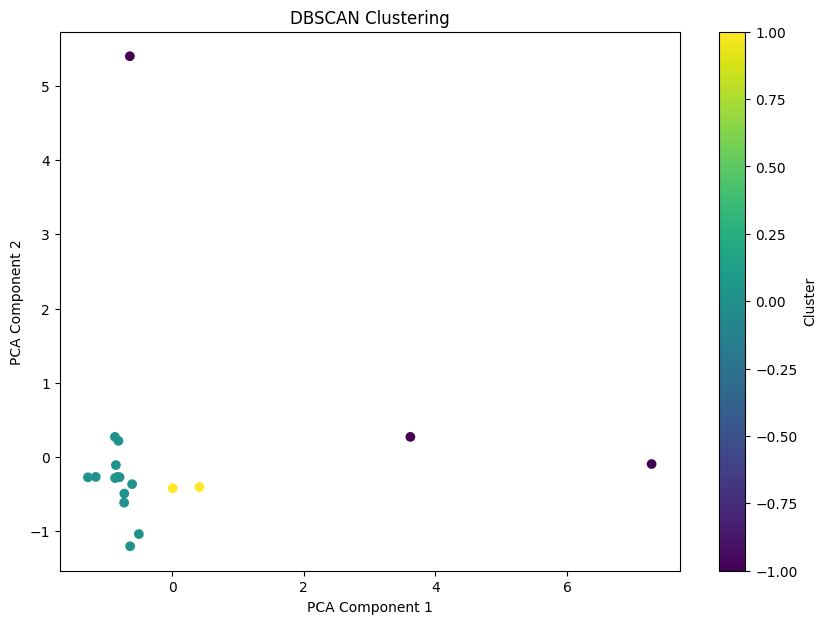

14
Cluster 0:
['Для этого они проанализировали данные столкновений электронов с\xa0позитронами, набранные за\xa0три года работы детектора Belle II', 'Статья с\xa0результатами исследования ', 'в\xa0противоречии со\xa0стандартной моделью на\xa0уровне 3,3 стандартных отклонений', 'Однако, этого пока недостаточно, чтобы заявить, что лептонная универсальность нарушается', 'Поэтому ученые ищут новые способы ', 'этой теории', 'Для этого они проанализировали 189 обратных фемтобарн данных, набранных в\xa0столкновениях электронов с\xa0позитронами в\xa0эксперименте Belle II\xa0с 2019 по\xa02021\xa0год', 'Это соответствует приблизительно 198 миллионам пар В- анти-В- мезонов..В\xa0результате ученые получили отношение R(X.) равное 0,228 ± 0,016 (статистическая ошибка) ± 0,036 (систематическая ошибка), что находится в\xa0согласии с\xa0предсказанием стандартной модели 0,223 ± 0,005', 'Однако, как отмечают ученые, их\xa0результат на\xa0данный момент не\xa0противоречит мировым измерения R(D.), которое п

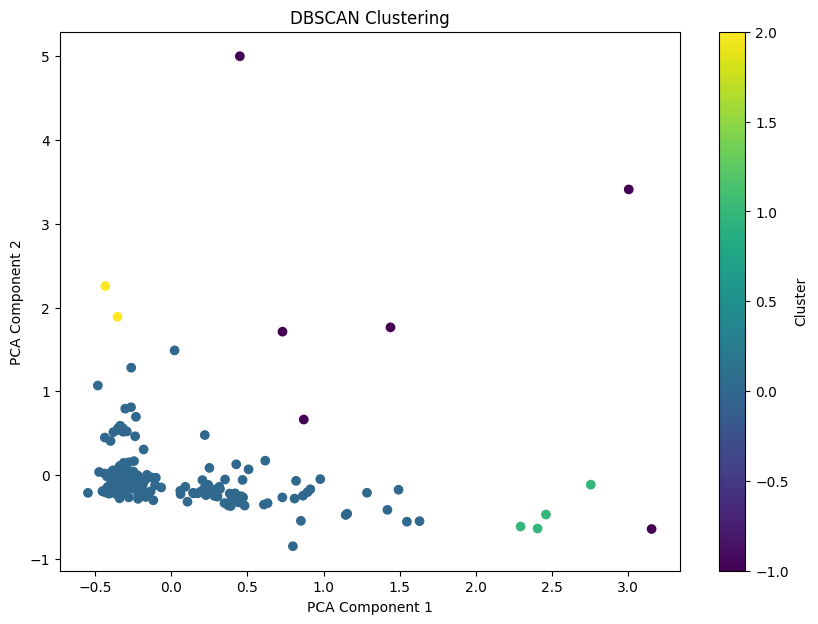

15
Cluster 0:
['Настоящие научные прорывы в\xa0наше время сделать довольно сложно', 'Обнаружить в\xa0условиях жесткой конкуренции нечто принципиально новое\xa0— задача практически невыполнимая', 'Эти белки участвуют в\xa0огромном количестве сигнальных путей в\xa0организме и\xa0поэтому очень часто становятся целями лекарств', 'Несмотря на\xa0это, примерно пятая часть этого огромного класса долго оставалась малоизученной и\xa0казалась совершенно неинтересной', 'Я\xa0всегда занимался дофамином, прямо с\xa0шестого курса', 'Я\xa0оканчивал .Российский национальный исследовательский медицинский университет имени Пирогова., а\xa0на\xa0последнем курсе для написания дипломной работы попал в\xa0Институт фармакологии РАН в\xa0лабораторию к\xa0Кириллу Сергеевичу Раевскому', 'Его лаборатория занималась изучением дофаминовых рецепторов и\xa0разработкой новых антипсихотиков', 'За\xa0это дело я\xa0взялся в\xa01988\xa0году, а\xa0в\xa01992-м уже защитил диссертацию', 'Мой наставник ввел меня в\xa0«клуб д

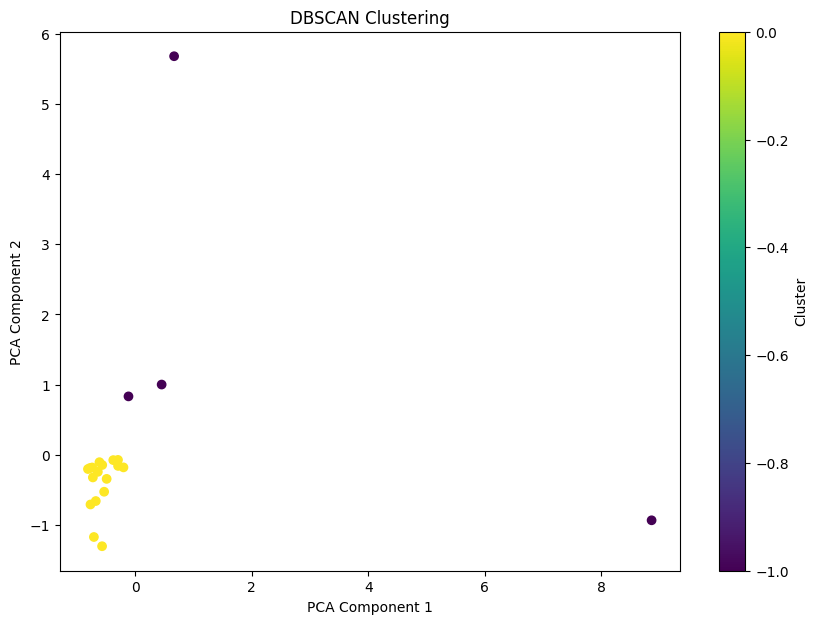

16
Cluster 0:
['Отчет о\xa0работе ', 'в\xa0журнале ...Жидкая пена представляет собой ', 'систему из\xa0газа (дисперсной фазы) и\xa0жидкости (дисперсионная среда)', 'Как правило, на\xa0газ приходится большинство объема, что на\xa0много порядков увеличивает площадь поверхности жидкости для эффективного взаимодействия с\xa0возможным субстратом, при этом время контакта продляется, а\xa0концентрация вещества, растворенного в\xa0тонких пленках жидкости, значительно повышается', 'В\xa0качестве возможных основ они выбрали безопасные с\xa0точки зрения FDA и\xa0производимые промышленно метилцеллюлозу, казеинат натрия и\xa0человеческий сывороточный альбумин; для стабилизации к\xa0ним добавляли ксантановую камедь..Для скрининга ', 'исследователи изготовили липидные наночастицы с\xa0противоковидной мРНК-вакциной ., в\xa0которой ген вирусного антигена заменили геном биолюминесцентной люциферазы', 'Из\xa0них изготовили суспензию или пену с\xa0каждой из\xa0экспериментальных основ', 'Их\xa0наносили на\

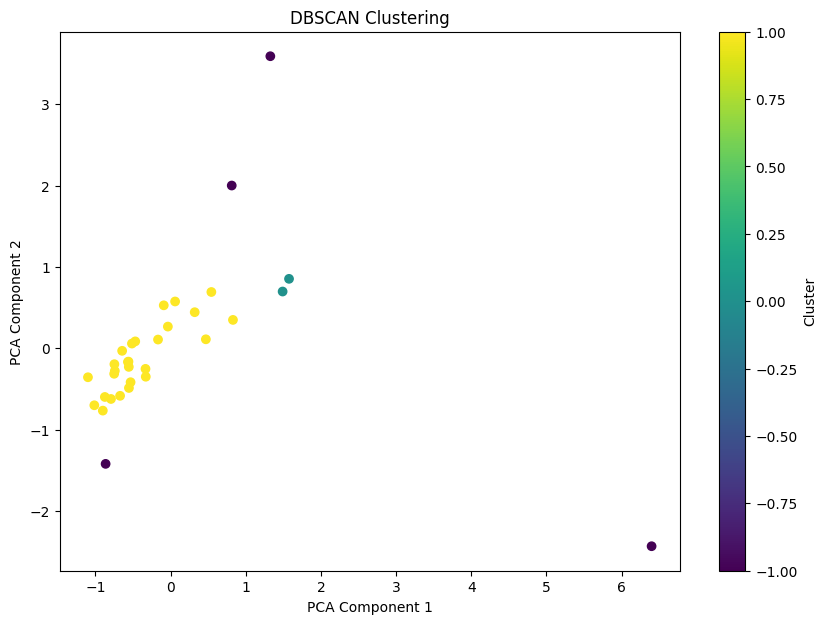

17
Cluster 0:
['Комплексное исследование с\xa0экспериментами на\xa0мышах и\xa0наблюдениями за\xa0людьми показало связь сахарозаменителя ксилита с\xa0риском развития серьезных сердечно-сосудистых событий', '.Также ученые обнаружили связь между высоким уровнем ксилита и\xa0риском развития тромботических осложнений, что свидетельствует о\xa0потенциальном влиянии ксилита на\xa0функцию тромбоцитов']
Cluster 1:
['Ксилит увеличивает риск тромбообразования, а\xa0у\xa0людей прием ксилита внутрь повышает реактивность тромбоцитов', 'Результаты исследования ', 'в\xa0...Из-за растущей проблемы ожирения по\xa0всему миру меры по\xa0снижению потребления сахара ', 'приоритетом общественного здравоохранения', 'Одной из\xa0таких мер стало распространение искусственных подсластителей в\xa0обработанных пищевых продуктах, которые рекламируются как полезная альтернатива сахару', 'Узнать подробнее о\xa0том, насколько нужно переживать из-за признания подсластителя аспартама «потенциально канцерогенным», можно 

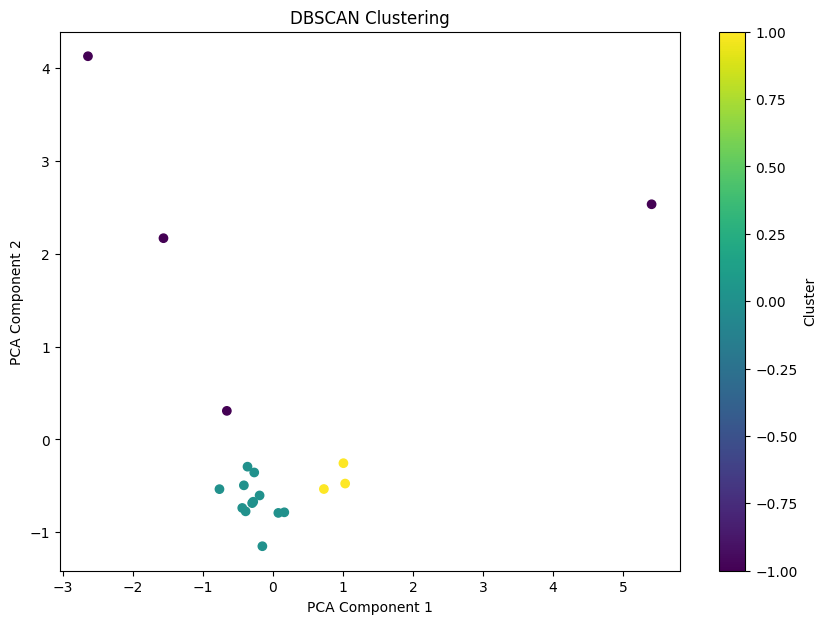

18
Cluster 0:
['Химики из\xa0США протестировали N-галогенбензамиды в\xa0качестве галогенирующих агентов полигетероциклических органических соединений', 'Выяснилось, что в\xa0большинстве случаев они работают лучше, чем популярные N-бром и\xa0N-хлорсукцинимиды', 'Как ', 'При этом за\xa0счет акцепторных свойств этих гетероатомов сопряжение амидного азота с\xa0карбонильной группой нарушается', 'Baran) из\xa0Научно-исследовательского института Скриппса решили использовать N-галогенбензамиды в\xa0качестве галогенирующих агентов', 'Бромирование вориконазола в\xa0ацетонитриле прошло с\xa0выходом 79\xa0процентов, а\xa0хлорирование\xa0— с\xa0выходом 52\xa0процента', 'Другие популярные галогенирующие агенты оказались малоэффективны в\xa0этой реакции', 'Так, в\xa0присутствии N-бромсукцинимида бромирование прошло с\xa0выходом всего в\xa036\xa0процентов..Далее авторы статьи решили протестировать свои галогенирующие агенты на\xa0сложных полигетероциклических субстратах', 'Так, они провели хлорировани

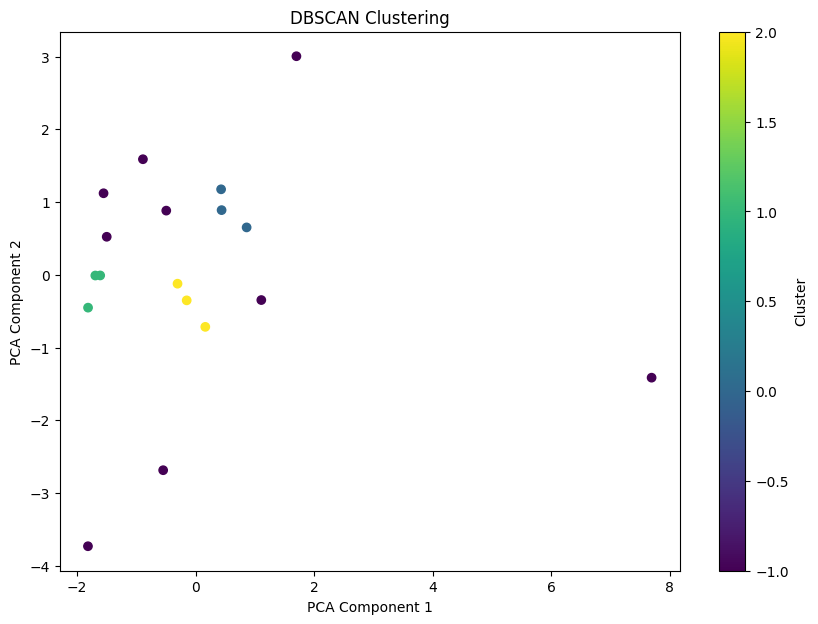

19
Cluster 0:
['Открытие говорит о\xa0том, низкая металличность мало влияет на\xa0наличие магнитных полей у\xa0массивных звезд, а\xa0массоперенос в\xa0двойных системах может создавать такие поля', 'в\xa0журнале ...Массивные магнитные звезды крайне интересны для астрофизиков, так как магнитные поля играют важную роль в\xa0финале их\xa0жизни, когда они взрываются как сверхновые, порождая замагниченные нейтронные звезды и\xa0гамма-всплески', 'Интересно и\xa0влияние магнитных полей на\xa0звездные ветра, а\xa0также связь между низкой металличностью звезды и\xa0наличием (и\xa0силой) магнитных полей']
Cluster 1:
['Статья ', 'Также астрономы наблюдали за\xa0контактной ультрамассивной двойной .\xa0из\xa0ядра области звездообразования NGC 346\xa0в Малом Магеллановом Облаке', 'Статья опубликована в\xa0The Astrophysical Journal.']
Cluster 2:
['При этом подобные звезды встречаются нечасто\xa0— стабильными дипольными полями с\xa0напряженностью в\xa0диапазоне от\xa0сотен гаусс до\xa0десятков килогаус

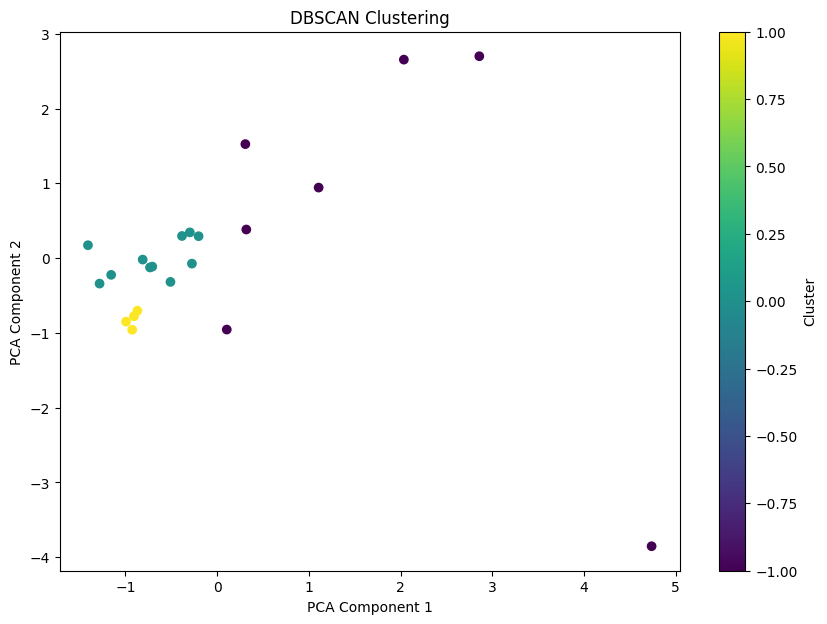

20
Cluster 0:
['Исследование ', 'Schuh) из\xa0Массачусетского технологического института решили исследовать, как нагретые металлы ведут себя при высоких скоростях деформации', 'Далее они помещали перед этой пластиной образцы металлов\xa0— меди, золота или титана', 'Полет частицы исследователи фиксировали с\xa0помощью высокоскоростной камеры..Сначала материаловеды провели эксперименты с\xa0медью при разных температурах\xa0— 20, 100 и\xa0177 градусах Цельсия', 'Кроме того, при повышении температуры объем и\xa0диаметр кратеров, оставляемых частицами оксида, уменьшался', 'Оказалось, что предел текучести меди возрастает примерно на\xa030\xa0процентов при нагревании от\xa020\xa0до\xa0177 градусов Цельсия', 'Этот\xa0же эффект материаловеды наблюдали при исследовании титана и\xa0золота', '.Ранее мы\xa0', 'о\xa0том, как химики придумали простой способ увеличения твердости древесины..Последние полвека физики и химики всего мира работают над тем, чтобы изобрести новые технологии и материалы для п

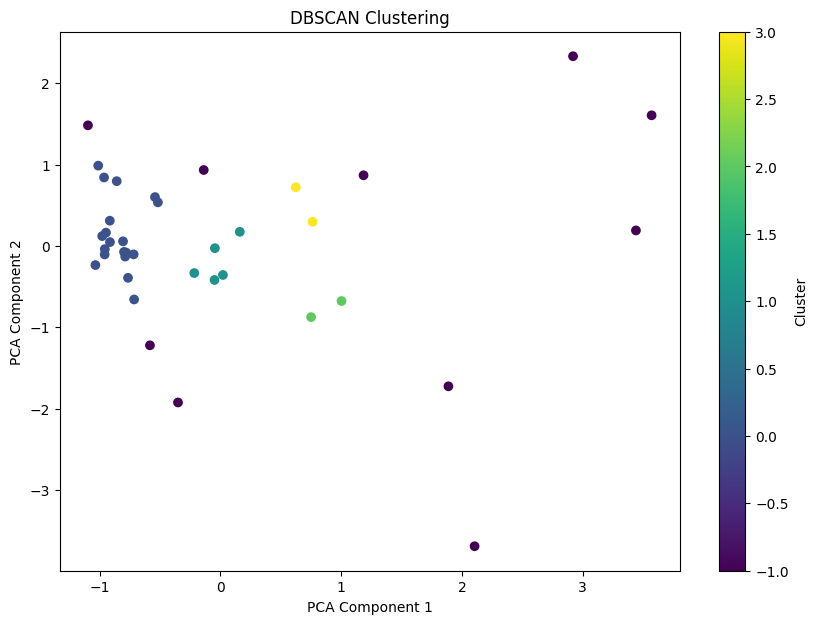

21
Cluster 0:
['Физики зарегистрировали самый узкий энергетический переход из\xa0всех известных возбужденных состояний атома', 'Препринт работы ', 'на\xa0arXiv.org..Эта новость появилась на\xa0.\xa0при поддержке Фонда развития научно-культурных связей «Вызов», который был создан для формирования экспертного сообщества в\xa0области будущих технологий и\xa0развития международных научных коммуникаций.То, какие фотоны излучают или поглощают атомы, зависит от\xa0их\xa0энергетической структуры', 'Чем больше расстояние между уровнями атома, тем выше частота фотона, который излучит или поглотит атом при переходе с\xa0одного уровня на\xa0другой', 'Оно превращает один уровень в\xa0несколько близкостоящих (это называется расщеплением уровней)', 'Расстояние между этими уровнями оказывается небольшим и\xa0отлично подходит для создания .', 'Причем чем меньше расстояние, тем точнее получается создать часы', 'Наблюдать такое поглощение или излучение в\xa0газах, например, невозможно из-за того, что ядр

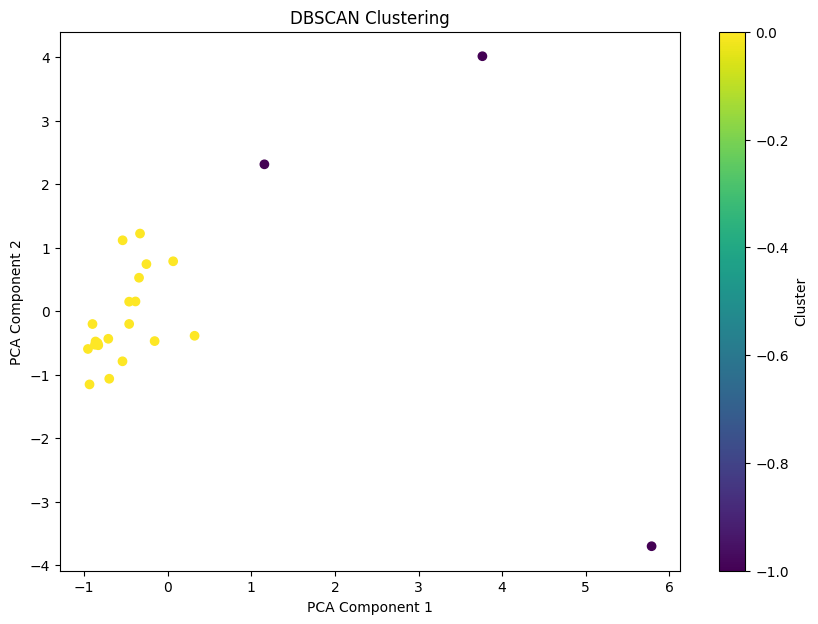

22
Cluster 0:
['Инфракрасный космический телескоп «Джеймс Уэбб» позволил астрономам впервые напрямую оценить запасы нейтрального атомарного водорода в\xa0среде вблизи звездообразующих галактик в\xa0период от\xa0400 до\xa0600 миллионов лет после Большого взрыва', 'Водорода в\xa0межгалактической среде содержится больше, чем ожидалось, а\xa0сами галактики оказались прекрасным примером богатой газом популяции молодых звездообразующих галактик', 'Статья ', 'в\xa0...Процесс формирования галактик стартует с\xa0аккреции нейтрального атомарного водорода на\xa0гало темной материи, где он\xa0накапливается и\xa0охлаждается и\xa0из\xa0него начинают образовываться звезды', 'Однако наблюдательных данных, дающих ограничения на\xa0объемы нейтрального атомарного водорода в\xa0галактиках в\xa0ранней Вселенной, крайне мало из-за трудности проведения наблюдений..Группа астрономов во\xa0главе с\xa0Каспером Хайнцем (Kasper E', 'Heintz) из\xa0Института Нильса Бора сообщила об\xa0обнаружении крупных резервуаро

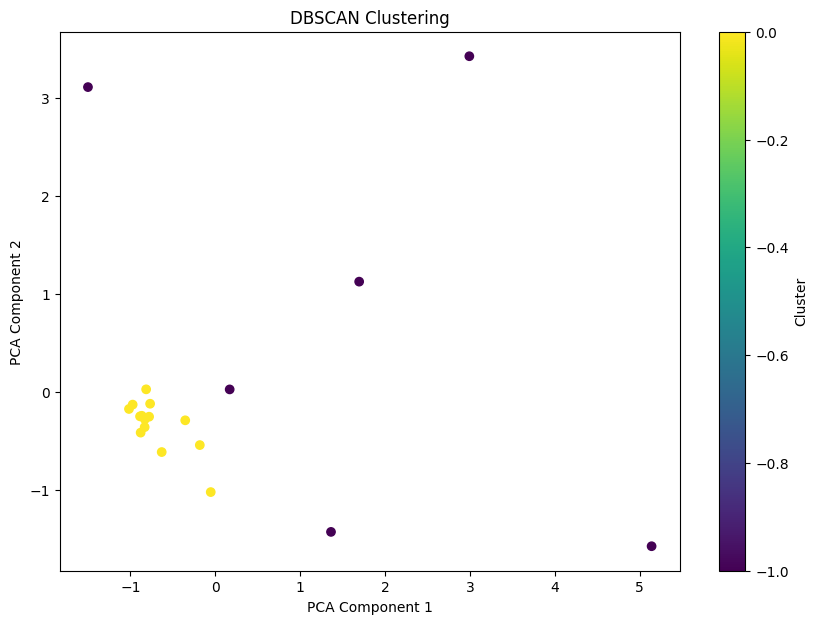

23
Cluster 0:
['Ученые связали это с\xa0явлением конфайнмент-эпитаксии и\xa0возникновением сингулярности Ван Хова', 'Статья ', 'Например, в\xa0нем ', 'сверхпроводимость, если повернуть один слой относительно другого на\xa0определенный угол', 'А\xa0в\xa0скрученном графене ', 'одномерная близость сверхпроводимости в\xa0квантовом режиме Холла', 'Эти свойства физики ', 'необычной структурой его электронных зон..Но\xa0не\xa0только механические воздействия могут вызывать сверхпроводимость в\xa0двуслойном графене', 'Ранее физики ., что явление сверхпроводимости возникает и\xa0в\xa0бислое графена, интеркалированном кальцием (C.CaC.)', 'Так, недавно физики ., что увеличение количества слоев в\xa0скрученном графене повышает стабильность сверхпроводящего состояния', '.Физики из\xa0коллаборации BESIII нашли указание на\xa0существование глюбола', 'Для этого они проанализировали более 10\xa0миллиардов распадов J/𝜓-мезонов, изучая резонанс X(2370), и\xa0впервые определили его спиновую четность, котор

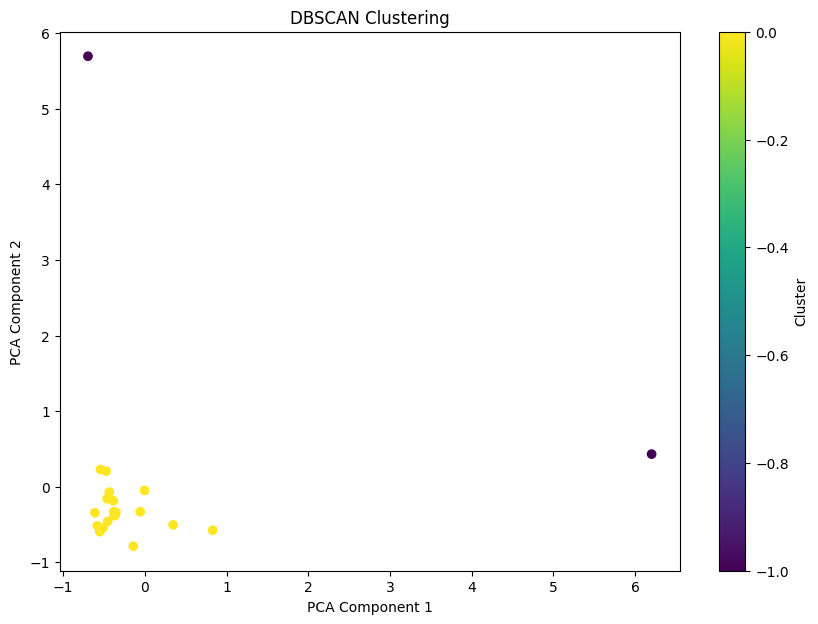

24
Cluster 0:
['Физики из\xa0Великобритании создали самый маленький квантовый детектор света на\xa0кремниевом чипе', 'Его размеры всего 80 × 220\xa0микрометров', 'Подробное описание разработки ', 'Это привело к\xa0бурному развитию информационных технологий, а\xa0в\xa01956 году за\xa0исследование транзисторного эффекта Уильям Шокли, Джон Бардин и\xa0Уолтер Браттейн ', 'Нобелевскую премию по\xa0физике', 'В\xa0наше время развитие квантовых компьютеров и\xa0квантовых вычислений требует разработки аналогичных миниатюрных чипов для генерации и\xa0', 'квантов света, чтобы уменьшить размеры вычислительных систем', 'Ученые уже ', 'создавать некоторые типы миниатюрных источников квантов света и\xa0интегрировать их\xa0на\xa0полупроводниковые чипы', 'Однако помимо источников фотонов для вычислительных схем требуются и\xa0миниатюрные детекторы света..Джоел Таскер (Joel F', 'Tasker), Джонатан Фразер (Jonathan Frazer), Джакомо Ферранти (Giacomo Ferranti) и\xa0Джонатан Мэттьюз (Jonathan C.\xa0F', 'Mat

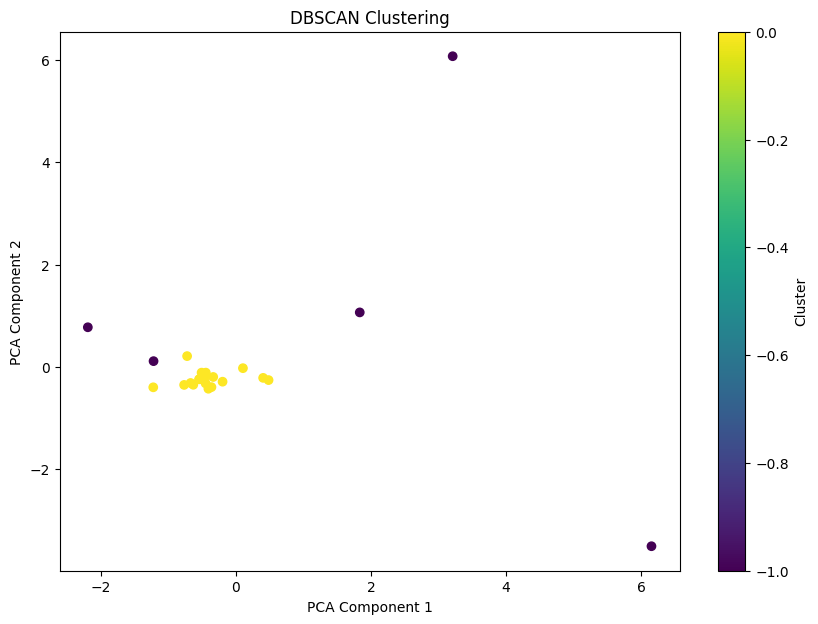

25
Cluster 0:
['Американские исследователи разработали низкомолекулярное соединение из\xa0группы ингибиторов киназ, которое в\xa0экспериментах на\xa0мышах подействовало как обратимый негормональный мужской контрацептив', 'Отчет о\xa0работе ', 'в\xa0журнале ., ей\xa0также ', 'редакционный материал..Контрацепция представляет собой наиболее удобный и\xa0безопасный способ регулирования рождаемости и\xa0планирования семьи', 'При этом большинство ее\xa0методов предназначены для использования женщинами, у\xa0мужчин фактически единственным средством остаются презервативы, которые не\xa0дают абсолютной защиты и\xa0не\xa0могут применяться в\xa0некоторых ситуациях (эректильная дисфункция, аллергия на\xa0латекс и\xa0другие)', '.В\xa0настоящее время клинические испытания проходят несколько гормональных контрацептивов для мужчин, но\xa0ни\xa0один из\xa0них пока не\xa0одобрен к\xa0применению', 'В\xa0человеческом геноме есть гены 538\xa0киназ, некоторые из\xa0них универсальны, некоторые специфичны для

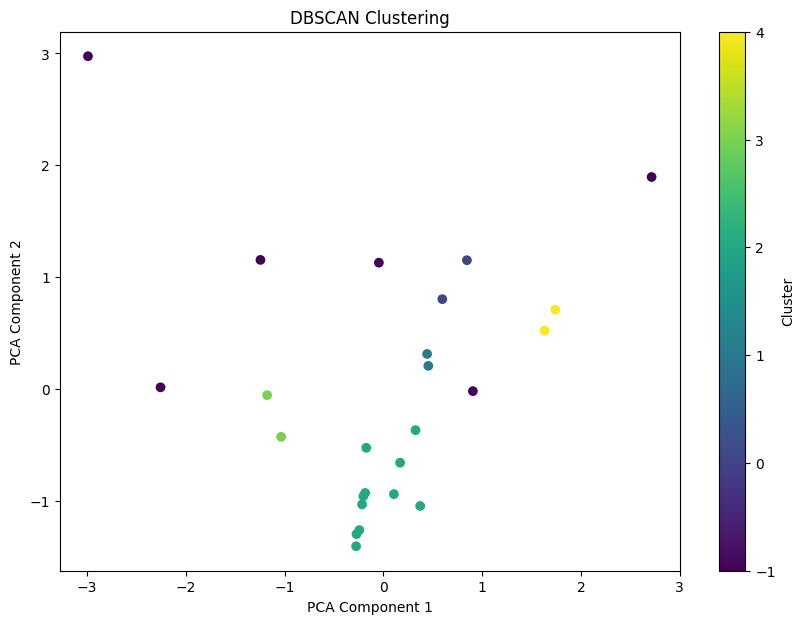

26
Cluster 0:
['Химики из\xa0Германии впервые получили и\xa0охарактеризовали сэндвичевый комплекс, содержащий два разных металла между циклопентадиенильными лигандами', 'Но\xa0комплекса, в\xa0котором между двумя лигандами было\xa0бы два разных атома, химики не\xa0могли получить до\xa0сих пор..Недавно это удалось металлоорганикам под руководством Андре Шэфера (André Schäfer) из\xa0Саарского университета']
Cluster 1:
['Для этого они сначала получили циклопентадиенильный комплекс алюминия, а\xa0затем смешали его с\xa0таким\xa0же комплексом лития', 'Во-первых, им\xa0удалось впервые достоверно охарактеризовать алюминилен\xa0— мономерный комплекс алюминия (+1) с\xa0циклопентадиенильным лигандом']
Cluster 2:
['Статья ', 'Первый такой комплекс с\xa0двумя атомами цинка\xa0— дицинкоцен\xa0— ', 'Эрнесто Кармона (Ernesto Carmona) с\xa0коллегами в\xa02004\xa0году', 'А\xa0в\xa0прошлом году химикам под руководством Саймона Олдриджа (Simon Aldridge) ', 'получить дибериллоцен', 'В\xa0результате образов

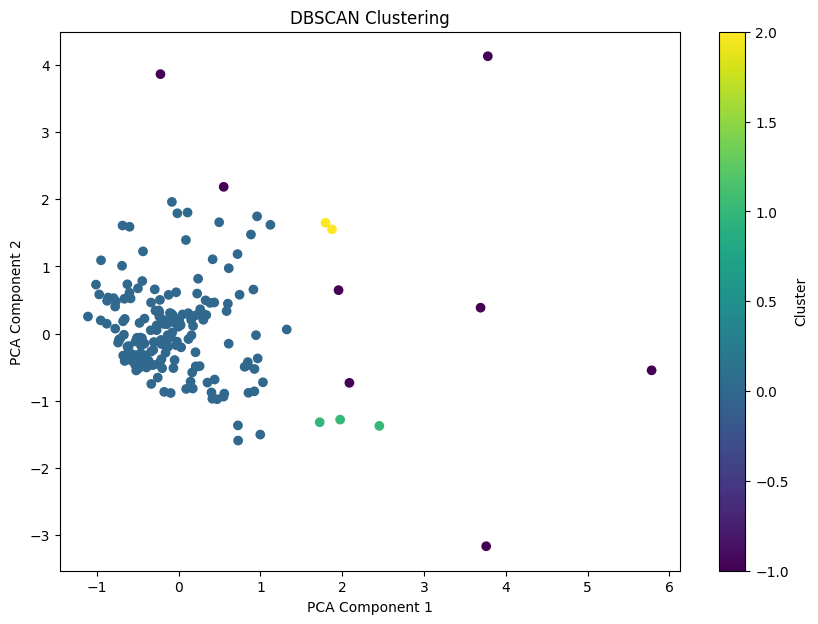

27
Cluster 0:
['В\xa02021 году ионных квантовых компьютеров в\xa0России .', 'Физики уже умели составлять необходимые для компьютера цепочки из\xa0ионов, но\xa0в\xa0них даже не\xa0было полноценных кубитов', 'Сегодня ученые из\xa0ФИАН проводят операции уже на\xa020-кубитном вычислителе из\xa0ионов иттербия и\xa0продолжают повышать точность операций', 'Один из\xa0руководителей проекта и\xa0лауреат премии «ВЫЗОВ» 2023 года Илья Семериков рассказал ., как устроены эти квантовые компьютеры и\xa0есть\xa0ли у\xa0них какое-то будущее..Этот материал появился на\xa0.\xa0в рамках спецпроекта ., который реализуется при поддержке .', 'В\xa02023 году премию «ВЫЗОВ» присудили в\xa0четырех номинациях: «Перспектива»\xa0— за\xa0создание ионного квантового процессора, «Инженерное решение»\xa0— за\xa0технологию создания магнитов из\xa0высокотемпературного сверхпроводника, «Прорыв»\xa0— за\xa0исследования в\xa0области создания вычислительных устройств на\xa0основе поляритонов и\xa0разработку оптического тра

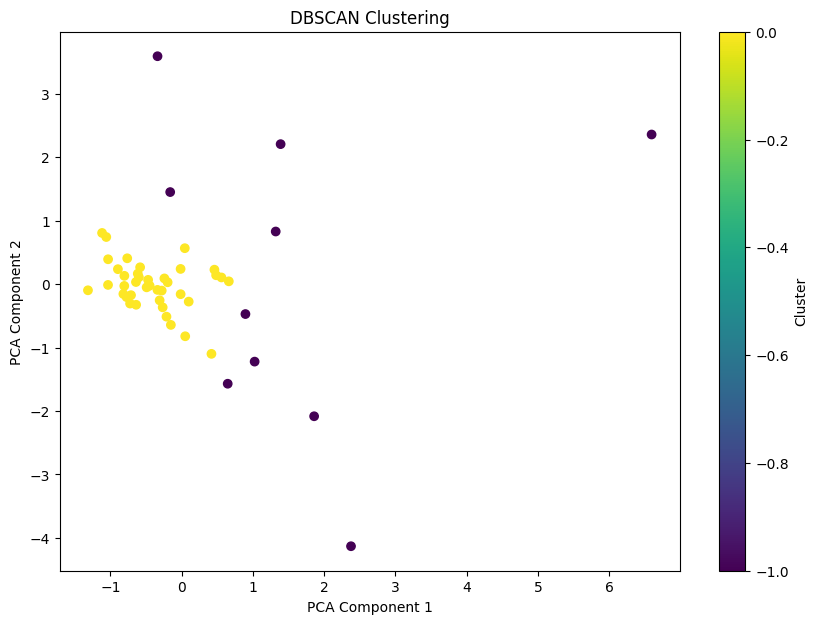

28
Cluster 0:
['В\xa02024 году в\xa0Дубне закончат строительство коллайдера NICA', 'Это циклический ускоритель для столкновения протонов и\xa0тяжелых ионов', 'Один из\xa0главных элементов коллайдера\xa0— сверхпроводящие магниты для удержания и\xa0фокусировки частиц', 'Для создания этих магнитов на\xa0российском ускорителе будут использованы высокотемпературные купратные сверхпроводники', 'Заместитель директора по\xa0научной работе Лаборатории физики высоких энергий ОИЯИ, лауреат премии «ВЫЗОВ» 2023 года Гамлет Ходжибагиян объяснил ., почему выбрали именно такие материалы и\xa0в\xa0чем основные сложности работы с\xa0ними..Этот материал появился на\xa0.\xa0в рамках спецпроекта ., который реализуется при поддержке .', 'В\xa0этом году у\xa0премии появилась международная номинация Discovery («Открытие»), которая будет присуждена за\xa0важное открытие, повлиявшее на\xa0развитие в\xa0области науки и\xa0технологий', 'Подача заявок на\xa0соискание премии «ВЫЗОВ» 2024 года открыта до\xa020\xa0ма

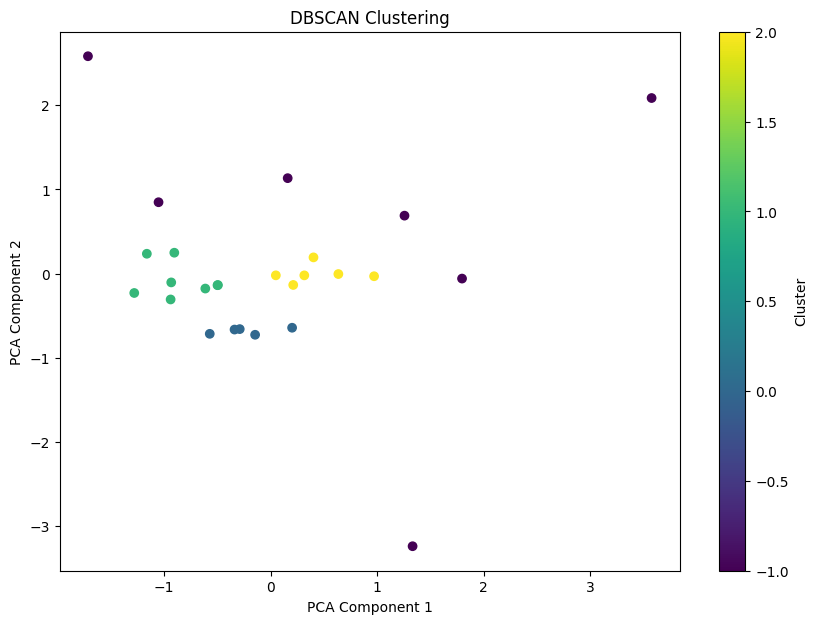

29
Cluster 0:
['Химики из\xa0США оптимизировали получение малых молекул по\xa0последовательным реакциям Судзуки в\xa0приборе для автоматического синтеза', 'То\xa0есть, в\xa0некоторой молекуле все группы, которые не\xa0должны реагировать, блокируются с\xa0помощью реагентов', 'Так, химики под руководством Мартина Берка (Martin D', 'Во-первых, вместо бороновых кислот химики решили использовать их\xa0эфиры, которые более стабильны на\xa0свету', 'С\xa0помощью спектрометрии с\xa0ионизацией распылением в\xa0электрическом поле им\xa0удалось найти следы популярного снотворного золпидема']
Cluster 1:
['Исследование ', 'в\xa0...Автоматический синтез органических соединений хорошо развит всего для нескольких классов веществ', 'В\xa0первую очередь это пептиды, которые можно легко получать в\xa0автоматических синтезаторах', 'При этом время синтеза даже сложных полипептидов составляет всего несколько часов', 'В\xa02015 году они ', 'Для этого они внесли в\xa0схему синтеза несколько изменений', 'Благод

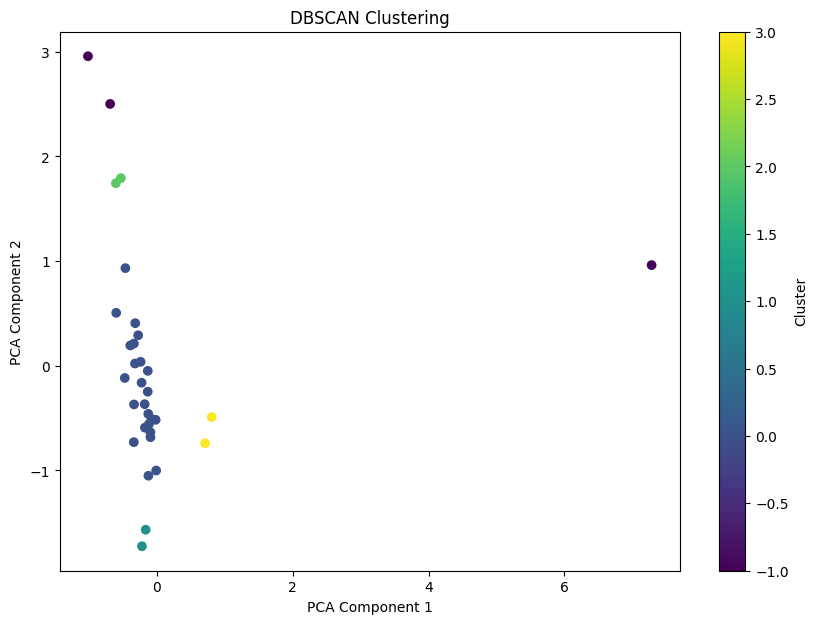

30
Cluster 0:
['Ботаники обнаружили нового рекордсмена по\xa0размеру генома среди эукариот', 'Как ', 'Самый маленький он\xa0у\xa0одноклеточных паразитов ', '.: всего 2,6 миллиона пар нуклеотидных оснований на\xa0ядро гаметы', 'Для сравнения, геном человека состоит из\xa03,1 миллиарда пар оснований', 'В\xa0центре их\xa0внимания оказался род ', 'Согласно предыдущим исследованиям, по\xa0крайней мере у\xa0двух из\xa0примерно пятнадцати видов этих растений очень большой геном: у\xa0', 'из\xa0Новой Зеландии в\xa0нем 73,19 миллиарда пар оснований, а\xa0у\xa0', 'из\xa0Восточной Австралии\xa0— 147,29 миллиарда пар оснований', '.Воспользовавшись методом проточной цитометрии, Пельисер и\xa0его коллеги оценили размер генома у\xa0еще одного папоротника из\xa0рода .\xa0— а\xa0именно\xa0', 'с\xa0Новой Каледонии и\xa0нескольких соседних архипелагов', 'Это новый рекорд для эукариотических организмов..По\xa0словам исследователей, выдающийся размер генома\xa0., скорее всего, связан с\xa0тем, что он\xa0по

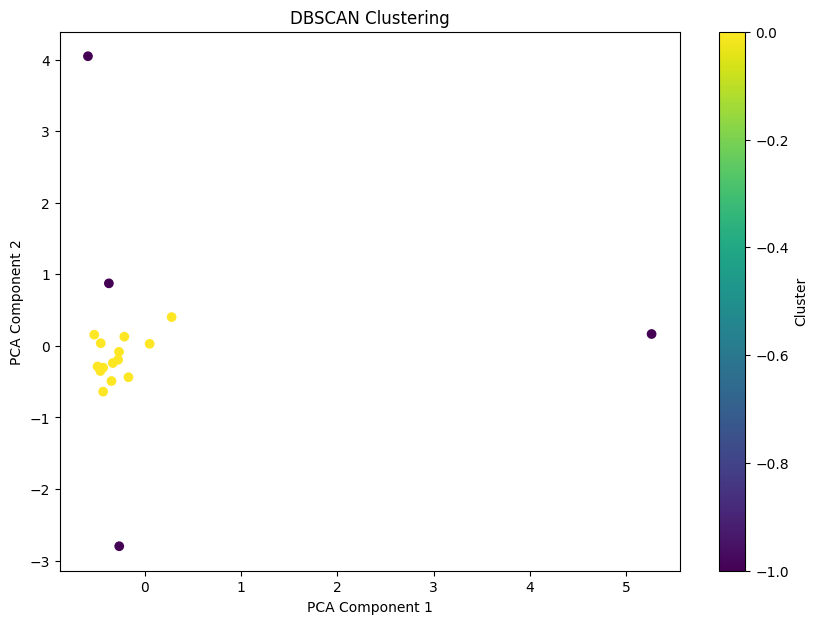

31
Cluster 0:
['Находка представляет собой 37-сантиметровый фрагмент (примерно половину) железного меча, который приблизительно датируется 900–1050 годами нашей эры', 'Исследователи сделали рентгеновский снимок этого предмета и\xa0заметили, что на\xa0клинке присутствует надпись', 'Как ', 'на\xa0сайте Университета Ставангера, возможно, на\xa0артефакте написано «VLGBERHT»', 'эпохи викингов', 'Однако мечи с\xa0подписью Ульфберт встречаются гораздо реже', 'Всего их\xa0обнаружили около 170\xa0экземпляров, причем подавляющее большинство из\xa0них ', 'на\xa0территории Скандинавии, Финляндии и\xa0в\xa0Восточной Европе', 'В\xa0частности, из\xa0Норвегии известны около 45\xa0таких артефактов', 'Предполагается, что эти дорогие и\xa0престижные предметы вооружения изготавливали в\xa0ремесленных мастерских, располагавшихся в\xa0районе Рейна', 'Недавно один из\xa0таких мечей рабочие случайно ', 'Рентгенография показала, что на клинке этого оружия присутствует надпись «+VLFBERHT+»', 'По предварительной

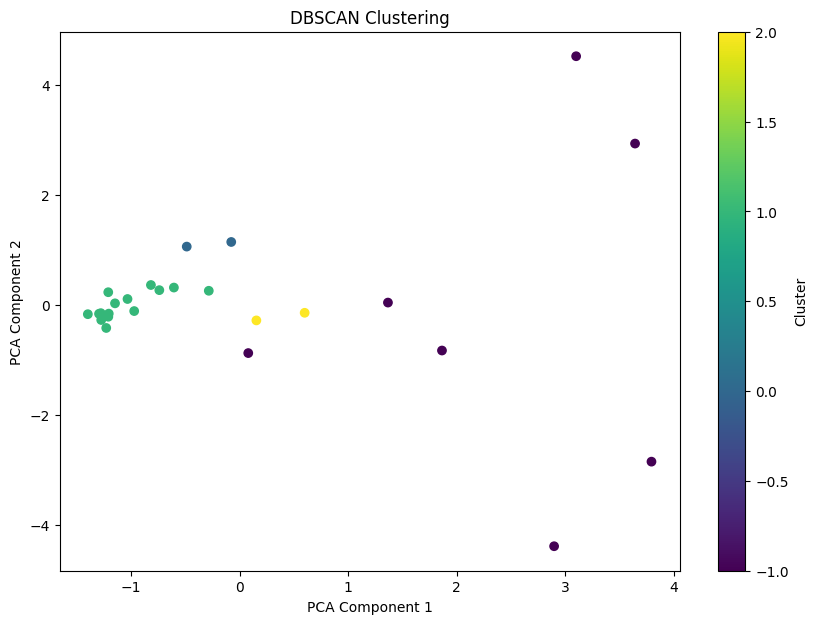

32
Cluster 0:
['Палеогенетики проанализировали геномы 59\xa0древних и\xa0275 современных людей, чтобы уточнить время, когда произошло смешение их\xa0предков с\xa0неандертальцами', 'ядерные геномы неандертальцев и\xa0денисовцев, стало ясно, что предки всех современных неафриканцев смешивались с\xa0архаичными людьми, населявшими Евразию']
Cluster 1:
['Препринт этого исследования ', 'в\xa0репозитории bioRxiv.org..После того как палеогенетики ', 'Так, в\xa0генофонде всего современного человечества, за\xa0исключением ряда популяций, проживающих к\xa0югу от\xa0Сахары, содержится около одного—трех процентов неандертальской примеси, причем у\xa0коренных жителей Восточной Азии ее\xa0примерно на\xa020\xa0процентов больше, чем у\xa0населения Западной Евразии', 'Вдобавок к\xa0неандертальской примеси некоторые современные популяции обладают существенным вкладом со\xa0стороны денисовцев, который ', 'примерно пяти процентов у\xa0филиппинских аэта, а\xa0также у\xa0коренного населения Меланезии и\xa0Ав

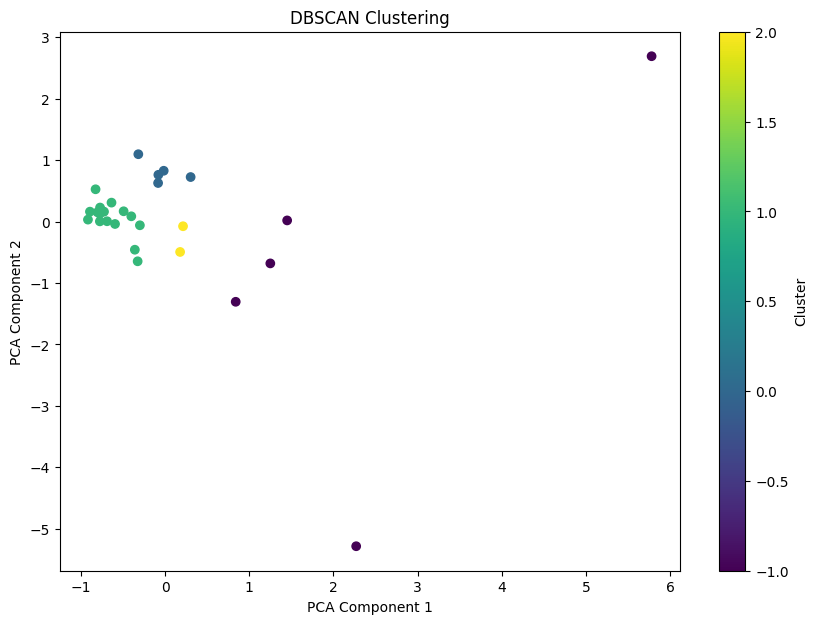

33
Cluster 0:
['По\xa0данным археологов, возраст этих находок составляет около 8,5–9 тысяч лет, что делает их\xa0древнейшими подобными артефактами в\xa0мире', 'сразу несколько подобных предметов, самым древним из\xa0которых может быть до\xa040–50 тысяч лет (однако прямые радиоуглеродные датировки у\xa0них .)', 'Оно древнее предыдущих находок из\xa0этого региона примерно на\xa04,5 тысячи лет..При этом жители других районов Восточной Азии начали пользоваться охрой гораздо раньше', 'Самые ранние свидетельства этому, относящиеся примерно к\xa040\xa0тысячам лет назад, археологи ', 'По оценкам ученых, предковая популяция этих людей отделилась от древних жителей материковой части Восточной Азии примерно 27–19 тысяч лет назад, после чего ее эффективная численность заметно сократилась']
Cluster 1:
['Об\xa0этом ', 'в\xa0статье, опубликованной в\xa0...В\xa0каменном веке древние люди расселились практически по\xa0всему миру и\xa0адаптировались к\xa0самым разнообразным условиям окружающей среды', '

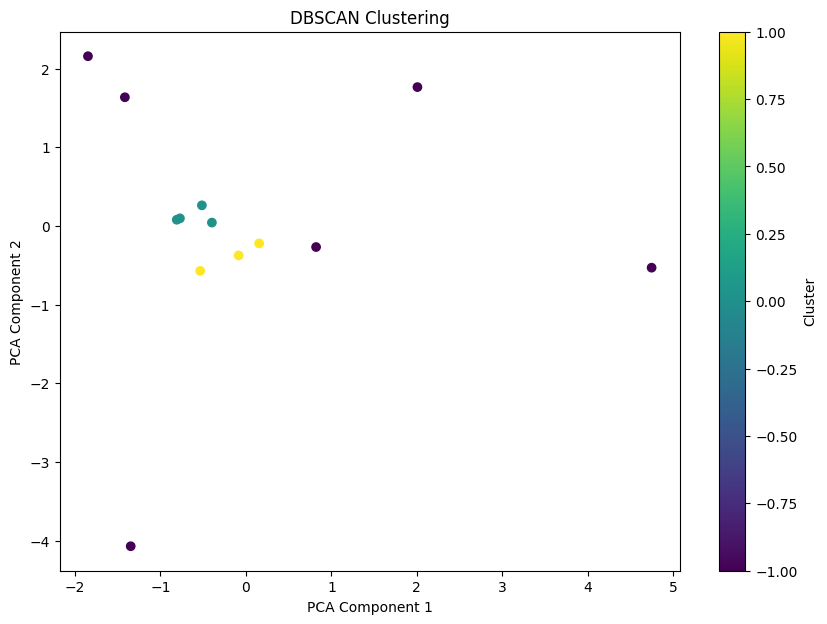

34
Cluster 0:
['Судя по\xa0тексту, во\xa0главе этого объединения стоял торговец по\xa0имени Амур Иштар, которого наделили правом распоряжаться капиталом в\xa0течение 12\xa0лет', 'собой деловые документы торговцев', 'Это наиболее ранние письменные памятники Центральной Анатолии, с\xa0появлением которых в\xa0регионе ', 'Об этом сообщает издание Live Science.']
Cluster 1:
['издание Arkeonews..Глиняная табличка, о\xa0которой идет речь, относится к\xa0началу\xa0II тысячелетия до\xa0нашей эры, то\xa0есть ко\xa0временам, когда ассирийцы ', 'Начиная со\xa0второй половины XIX века археологи обнаружили на\xa0этом городище уже больше 25\xa0тысяч составленных на\xa0староассирийском языке глиняных табличек (так называемые каппадокийские таблички), которые в\xa0основном ', 'Он состоит из 70 строк, 6 из которых написаны на хеттском языке, а 64 — на хурритском']
Cluster -1:
['Профессор Фикри Кулакоглу (Fikri Kulakoğlu) из\xa0Анкарского университета, руководящий раскопками памятника Кюль-Тепе (древний 

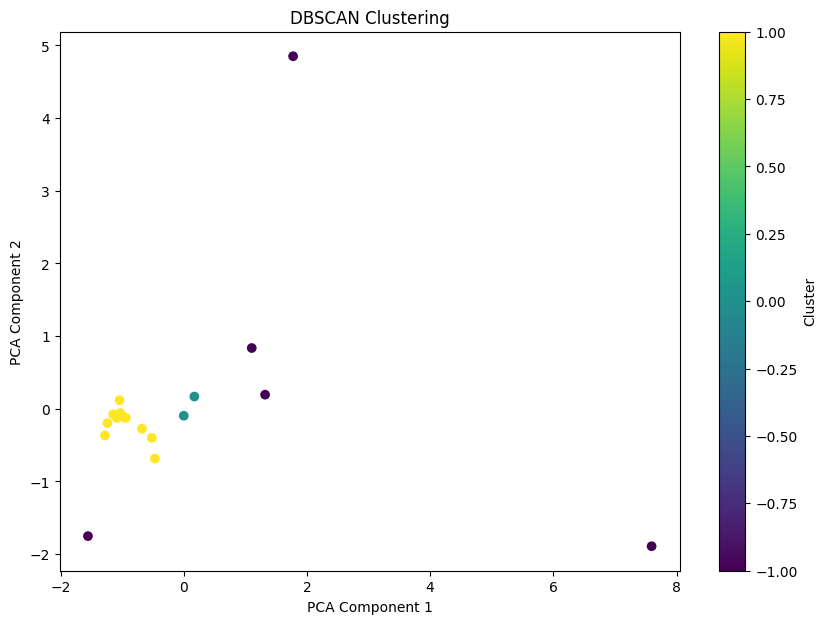

35
Cluster 0:
['Физики из\xa0Китая и\xa0Финляндии осуществили практически идеальную квантовую телепортацию кубитов, несмотря на\xa0шум', 'исправлять быстрее времени декогеренции..Физики под руководством Ли\xa0Чуаньфэня (Chuan-Feng Li) и\xa0Юрки Пийло (Jyrki Piilo) из\xa0Научно-технического университета Китая в\xa0Хэфэе смогли преодолеть шум при квантовой телепортации']
Cluster 1:
['Для этого они использовали многокомпонентную гибридную запутанность', 'Результаты исследования ', 'в\xa0...Эта новость появилась на\xa0.\xa0при поддержке ежегодной Национальной премии в\xa0области будущих технологий «Вызов»', 'из\xa0одной точки пространства в\xa0другую без отправки непосредственно объекта', 'Для этого используют явление .', 'В\xa0идеальном случае такая передача происходит без помех', 'Однако в\xa0реальном мире невозможно избавиться от\xa0постороннего шума и\xa0декогеренции, которые уменьшают максимальное расстояние и\xa0качество телепортации', 'Впрочем, некоторые ошибки ученые уже ', 'Уровен

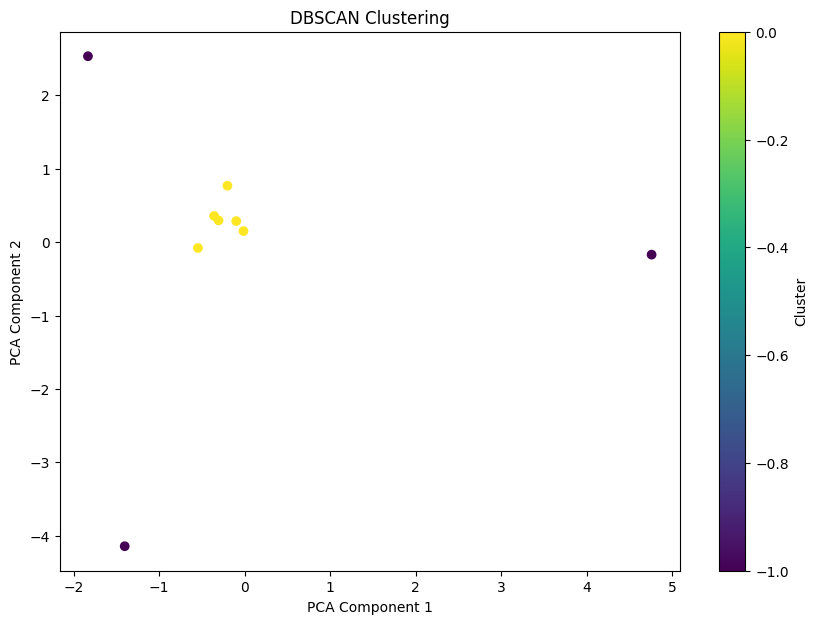

36
Cluster 0:
['Датчики ряда подводных обсерваторий сети ONC (Ocean Networks Canada) на\xa0западном и\xa0восточном побережьях Канады 10–11 мая 2024 года ', 'самую интенсивную геомагнитную бурю на\xa0Земле в\xa0XXI\xa0веке', 'Изменения магнитного поля проявились в\xa0колебании компасов, входящих в\xa0состав ', 'Она также ', 'Другие теории, такие как поглощение или формирование планет.\xa0не\xa0могут объяснить наблюдаемые различия', 'Статья опубликована в\xa0журнале Astronomy&Astrophysics.']
Cluster -1:
['течений, установленных на\xa0дне океана, их\xa0фиксировали даже приборы на\xa0глубине 2,7 километра к\xa0западу от\xa0острова Ванкувер, а\xa0самое большое отклонение было обнаружено обсерваторией в\xa0проливе Баркли на\xa0глубине 25\xa0метров', 'Колебания компасов совпали с\xa0моментами пиковой интенсивности бури, что позволило их\xa0надежно связать, отбросив версию землетрясений..За\xa0возникновение бури, которая продолжалась с\xa010\xa0по\xa013\xa0мая, была ответственна быстро выросша

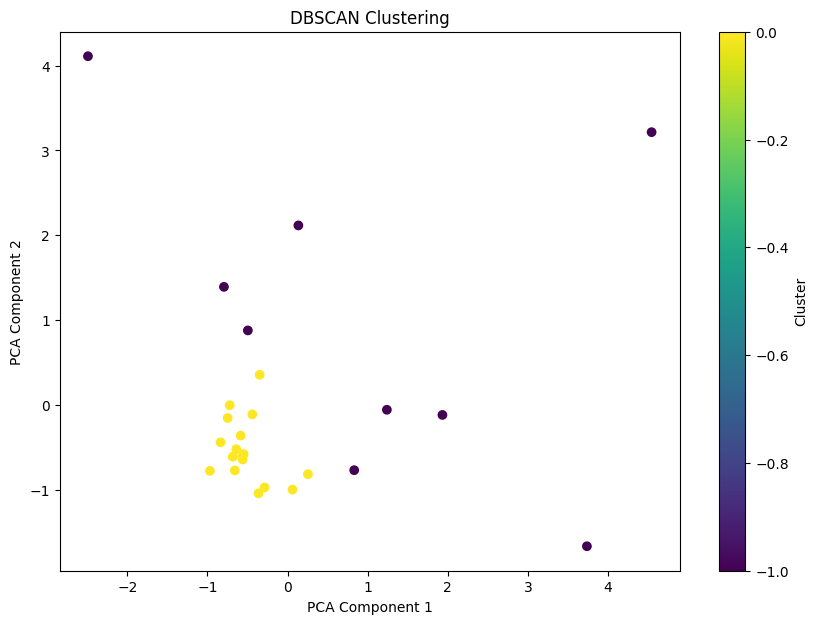

37
Cluster 0:
['По\xa0мнению ученых, изученные артефакты, по-видимому, использовались в\xa0качестве наконечников стрел во\xa0время межгрупповых или межличностных конфликтов, на\xa0охоте, а\xa0иногда и\xa0для разделки туш животных', 'Кроме того, как ', 'в\xa0препринте, доступном в\xa0репозитории Research Square, на\xa0двух предметах сохранились вероятные остатки клея из\xa0смолы акации и\xa0козьего коллагена..О\xa0функции тех или иных артефактов каменного века и\xa0даже более поздних эпох порой приходится только догадываться', 'Иногда ', 'пол древних гоминин, устанавливать принадлежность к\xa0тому или иному таксону различных костных фрагментов, что, в\xa0частности, позволило ', 'останки нескольких денисовцев и\xa0так называемой .\xa0— гибрида первого поколения от\xa0матери-неандерталки и\xa0отца-денисовца..Стивен Розен (Steven Rosen) из\xa0Университета имени Бен-Гуриона совместно со\xa0своими коллегами из\xa0Израиля воспользовался методами палеопротеомики для изучения древних каменных а

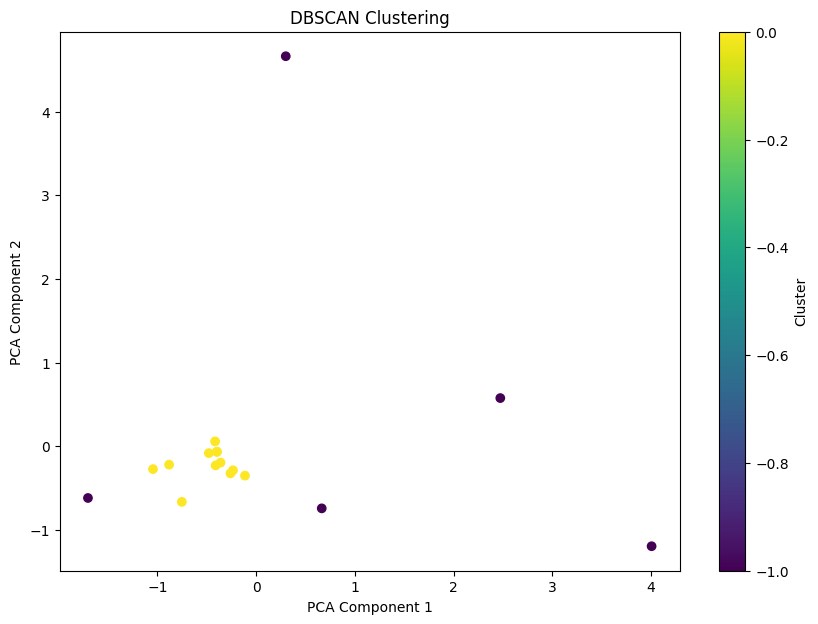

38
Cluster 0:
['Внешним обликом эти змеи напоминают гадюк и\xa0в\xa0случае опасности имитируют их\xa0защитное поведение, принимая S-образную позу, широко раскрывая пасть и\xa0совершая выпады в\xa0сторону врага', 'Как ', 'в\xa0статье для журнала ., систематическое положение рода ', 'в\xa0составе надсемейства ., включающего также аспидов (Elapidae), до\xa0сих пор оставалось неясным', 'следует рассматривать как отдельное монотипическое семейство Psammodynastidae в\xa0составе Elapoidea', 'Оно находится в\xa0сестринских отношениях с\xa0кладой, включающей семейства Elapidae, ', 'и\xa0.', 'Однако сделать этого не\xa0удалось, что, скорее всего, связано с\xa0быстрой диверсификацией рода на\xa0ранних этапах его эволюции', 'В\xa0результате исследователи решили условно отнести ', 'к\xa0подсемейству Pseudaspidinae в\xa0составе семейства Lamprophiidae', '.Японские ботаники обнаружили, что обыкновенные мокрицы являются самыми мелкими распространителями проглоченных семян', 'Эти беспозвоночные поедают

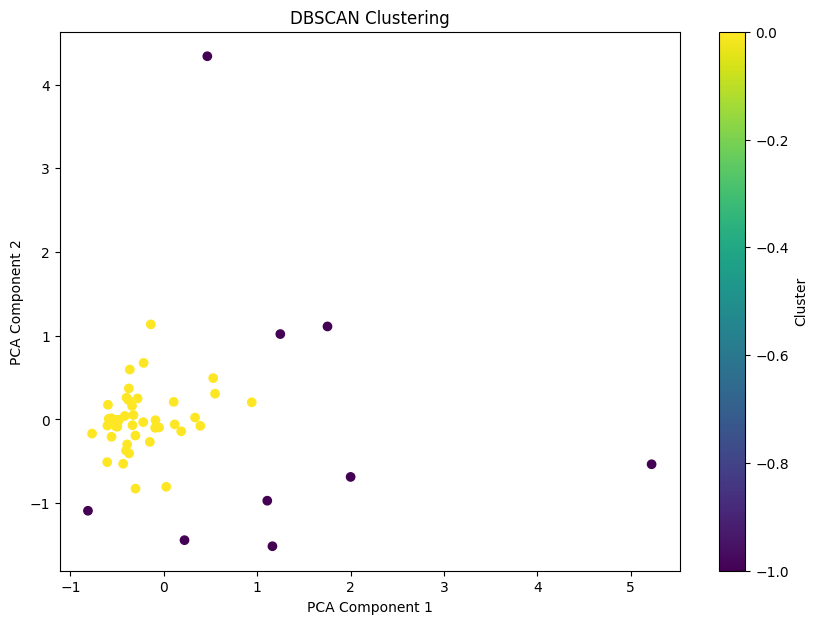

39
Cluster 0:
['Японские ботаники обнаружили, что обыкновенные мокрицы являются самыми мелкими распространителями проглоченных семян', 'Как ', 'Данный процесс известен как .', 'В\xa0то\xa0же время насекомые и\xa0другие беспозвоночные, как предполагалось до\xa0недавних пор, обычно слишком малы, чтобы целиком проглатывать семена и\xa0участвовать в\xa0их\xa0распространении', 'Было известно всего несколько исключений из\xa0этой закономерности; например, очень крупные прямокрылые ', 'Однако они, как правило, не\xa0проглатывают семена', 'Вместо этого они собирают их\xa0и\xa0уносят в\xa0свои кладовые, которые отлично подходят для прорастания', 'Они ., что ', '., бесхлорофильное ', 'растение, расселяется за\xa0счет ', '(Rhaphidophoridae) и, в\xa0более теплых частях ареала, лесных тараканов .', 'Насекомые поедают его сочные плоды и\xa0целиком проглатывают похожие на\xa0пылинки семена, которые проходят через их\xa0кишечник и\xa0выходят наружу с\xa0пометом', '.Ботаник Кэндзи Суэцугу (Kenji Suetsu

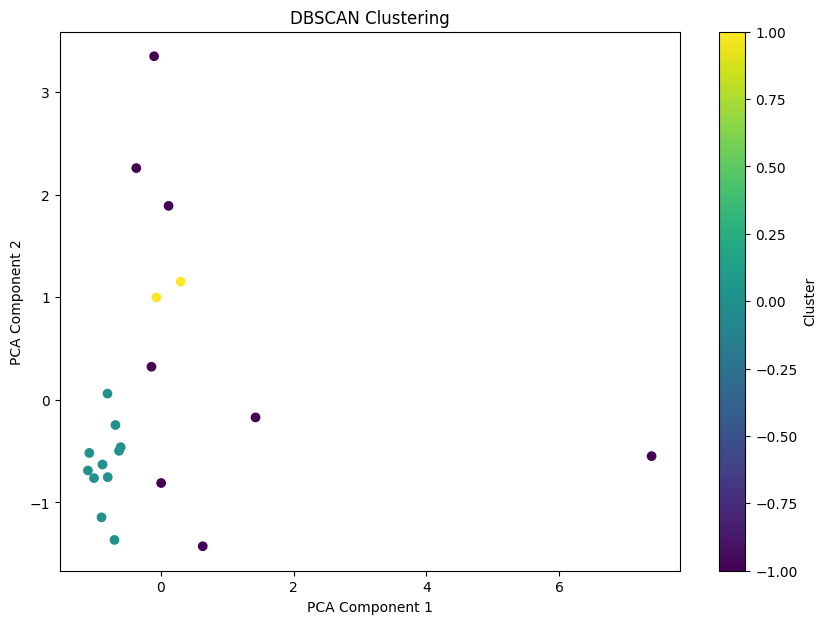

40
Cluster 0:
['Для этого они разработали и\xa0применили программу компьютерного моделирования Warp Factory', 'Статья об\xa0исследовании ', 'В\xa01994 году Мигель Алькубьерре (Miguel Alcubierre), вдохновившись сериалом «Звездный путь», ', 'первую физическую модель такого двигателя', 'Для этого ученые разработали и\xa0применили программу компьютерного моделирования .', '.В\xa0результате физики получили решение, которое включает в\xa0себя наличие стабильной оболочки из\xa0обычной материи с\xa0положительной массой в\xa0формализме ', 'Проблема ускорения и\xa0замедления такого двигателя остается нерешенной', 'Кроме того, создание такого двигателя требует технологий, не\xa0доступных на\xa0сегодняшний день человечеству, а\xa0также громадной массы вещества для оболочки', 'его реальной разработкой..Физики зарегистрировали самый узкий энергетический переход из\xa0всех известных возбужденных состояний атома', 'Они обнаружили его в\xa0атомах тория-229, которые встраивали в\xa0кристаллическую решет

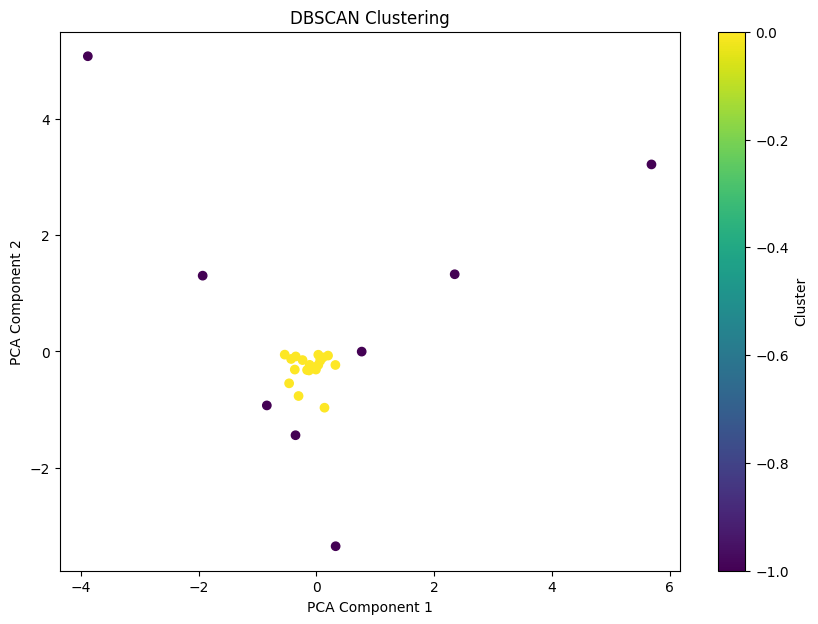

41
Cluster 0:
['Группа ученых провела исследование, в\xa0ходе которого 13\xa0греческих морских пехотинцев, снаряженных копиями микенского вооружения, приняли на\xa0себя роль древних элитных пеших воинов, участвовавших в\xa0Троянской войне', 'В\xa0ходе эксперимента исследователи выяснили, что известный доспех из\xa0Дендры пригоден для полноценного 11-часового боя', 'Как ', 'микенский некрополь, рядом с\xa0которым находятся руины древнего города Мидея', 'Однако широкую известность этот памятник приобрел после того, как в\xa01960 году в\xa0одной из\xa0камерных гробниц, возведенных около 1450–1400 годов до\xa0нашей эры, ученые ', 'хорошо сохранившийся и\xa0состоящий из\xa0множества деталей бронзовый доспех, который соответствовал не\xa0только изображениям на\xa0глиняных табличках с\xa0линейным письмом\xa0Б, но\xa0и\xa0описаниям Гомера', 'За\xa0основу они взяли события Троянской войны, описанные Гомером в\xa0«Илиаде»', 'Помимо этой древней поэмы, исследователи также проанализировали научную

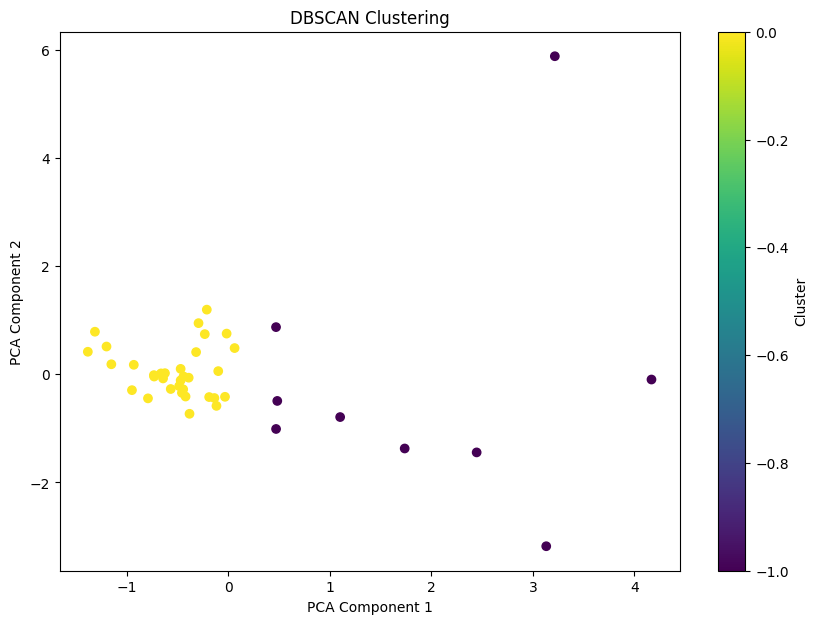

42
Cluster 0:
['В\xa0ходе проекта по\xa0борьбе с\xa0незаконной охотой рейнджеры с\xa02011 по\xa02021 год удалили из\xa0двух вьетнамских заповедников 118151 проволочную петлю и\xa0другие ловушки', 'В\xa0результате число браконьерских орудий здесь сократилось на\xa036,9\xa0процента', 'Как ', 'в\xa0статье для журнала ., это значительный успех', 'Этот способ охоты наносит серьезный ущерб окружающей среде', 'Дело в\xa0том, что петли неизбирательны, из-за чего в\xa0них погибают или калечатся любые млекопитающие и\xa0птицы крупных и\xa0средних размеров, включая азиатских слонов (.), тигров (.) и\xa0обезьян', 'Кроме того, эти орудия очень дешевы, что позволяет охотникам устанавливать их\xa0в\xa0огромном количестве', 'Охотники в\xa0этом регионе активно размещают петли даже на\xa0охраняемых территориях', 'По\xa0некоторым оценкам, в\xa0любой момент времени в\xa0заповедниках и\xa0национальных парках Вьетнама, Лаоса и\xa0Камбоджи находится около 13\xa0миллионов таких ловушек', 'В\xa0центре внимания

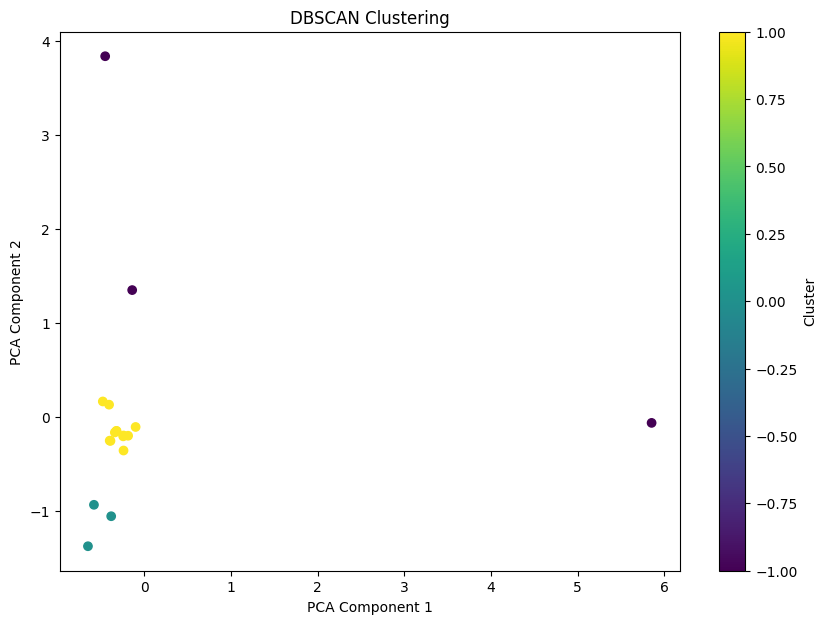

43
Cluster 0:
['В\xa02017-2023 годах исследователи проводили полевые работы в\xa0провинциях Хаиль, Табук, Медина и\xa0Мекка на\xa0западе Саудовской Аравии', 'Он\xa0получил название .\xa0— в\xa0честь гор Эль-Хиджаз на\xa0западе Саудовской Аравии, где были обнаружены большинство особей', 'является эндемиком Саудовской Аравии\xa0— но\xa0в\xa0теории также может встречаться в\xa0Иордании, Израиле и\xa0на\xa0Синайском полуострове']
Cluster 1:
['Морфологический и\xa0генетический анализ показали, что эти рептилии относятся к\xa0неизвестному ранее виду из\xa0рода ', '(.)', 'Как ', 'в\xa0статье для журнала ., .находится в\xa0сестринских отношениях с\xa0', 'из\xa0Южного Израиля и\xa0приходится близким родственником\xa0', 'из\xa0Йемена и\xa0Омана', 'Таким образом, новый вид, шестой в\xa0роде ., закрывает пробел в\xa0его распространении между Левантом и\xa0югом Аравийского полуострова..Ликата и\xa0его коллеги предполагают, что\xa0', 'Здесь этот вид населяет засушливые биотопы на\xa0высоте 456–1610 

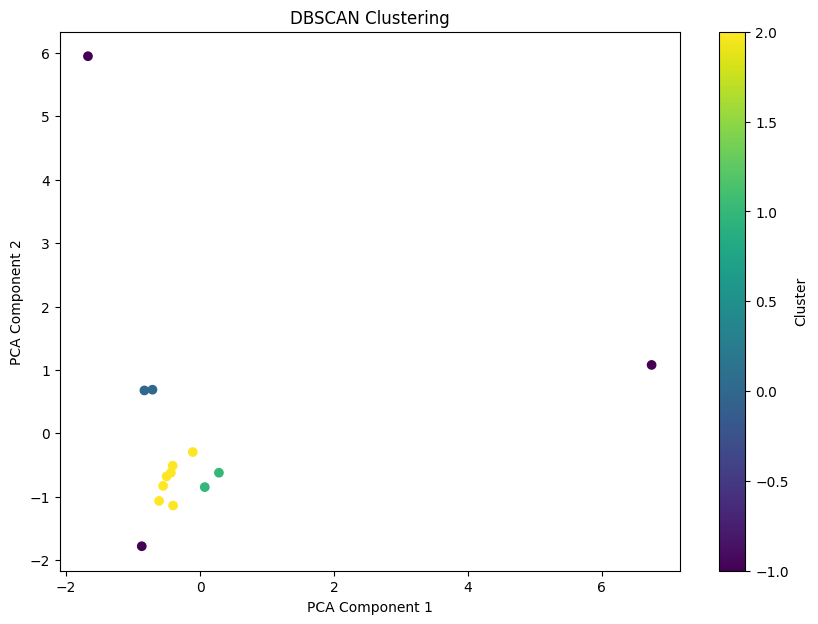

44
Cluster 0:
['Астрономы обнаружили новую землеподобную экзопланету у\xa0очень близкого к\xa0Солнцу красного карлика', 'в\xa0журнале .Поиски землеподобных экзопланет в\xa0настоящее время сосредоточены на\xa0маломассивных красных карликах, которых много в\xa0Млечном Пути']
Cluster 1:
['Gliese 12b попадает в\xa0обитаемую зону своей звезды и\xa0может быть скалистым телом с\xa0умеренным климатом', 'Они удобны как цели для телескопов, наблюдающих за\xa0прохождениями планет по\xa0дискам родительских звезд']
Cluster 2:
['Статья ', 'Она обладает массой 0,241 массы Солнца, эффективной температурой 3253 кельвин и\xa0возрастом семь миллиардов лет', 'Вокруг нее с\xa0периодом 12,76 дня обращается экзопланета с\xa0радиусом, близким к\xa0земному, и\xa0равновесной температурой 315\xa0кельвин', 'В\xa0предположении скалистого состава ее\xa0масса может составлять 0,88 массы Земли', 'Поток излучения от\xa0звезды, который получает экзопланета, в\xa01,6 раз превышает поток, получаемый Землей от\xa0Солнца, 

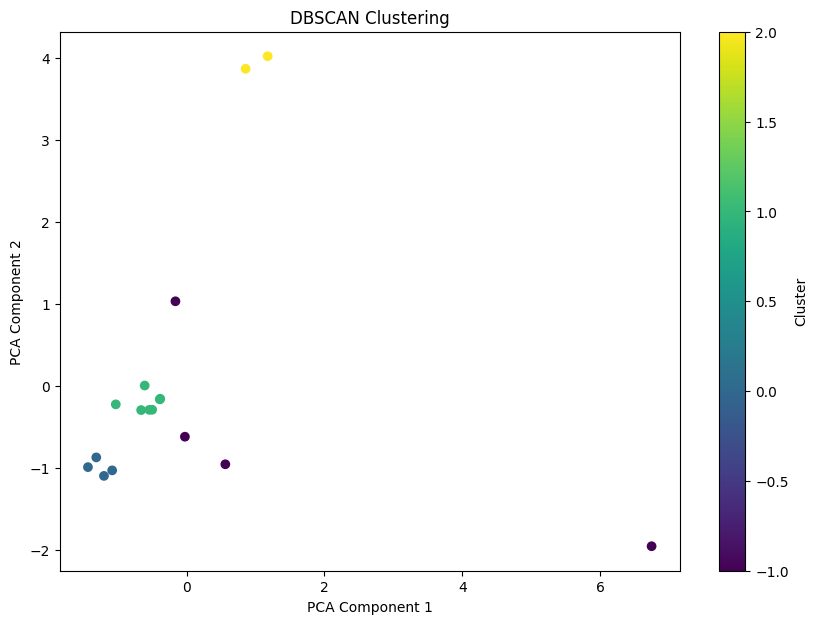

45
Cluster 0:
['Инфракрасный космический телескоп «Джеймс Уэбб» подтвердил обнаружение двух очень далеких галактик, одна из\xa0которых стала самой далекой из\xa0известных на\xa0сегодня', 'и\xa0.) доступны на\xa0сайте arXiv.org..После запуска в\xa0космос «Джеймс Уэбб» стал активно обнаруживать галактики с\xa0очень большими значениями красного смещения, которые существовали в\xa0самой ранней Вселенной, что не\xa0всегда вписывается в\xa0текущие модели эволюции галактик во\xa0Вселенной, зато позволяет их\xa0скорректировать', 'Helton) из\xa0Университета Аризоны сообщили о\xa0подтвержденном обнаружении двух очень далеких галактик, одна из\xa0которых стала рекордно далекой из\xa0известных', 'рекордно далекую активную галактику..Космический телескоп TESS обнаружил нового кандидата в\xa0экзопланету-сироту земного типа, который стал первым объектом такого типа для TESS']
Cluster 1:
['Препринты работ (', 'В\xa0частности, интересна проблема определения времени появления первых галактик и\xa0механи

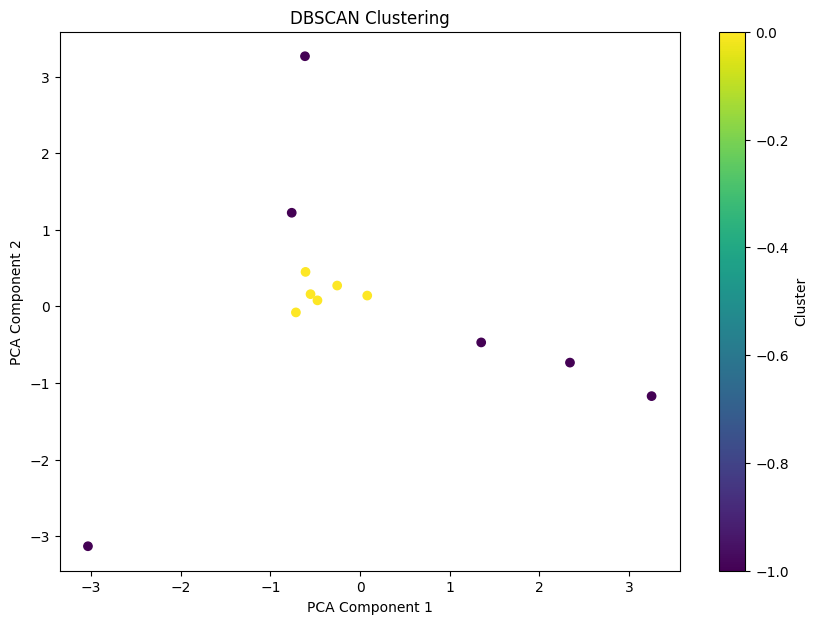

46
Cluster 0:
['К\xa0таким выводам пришли ученые, впервые включив в\xa0глобальные оценки доступности воды не\xa0только ее\xa0количество, но\xa0и\xa0соответствие экологическим нормам', 'Результаты исследования ', 'в\xa0журнале .Ученые под руководством Эдварда Джонса (Edward Jones) из\xa0Утрехтского университета оценили текущую и\xa0будущую уязвимость населения планеты к\xa0дефициту воды', 'Они использовали глобальную гидрологическую модель ', 'При этом обычно бляшкошипые акулы держатся поодиночке', 'Возможно, у\xa0берегов Панамы эти рыбы охотились или искали себе пару.']
Cluster -1:
['На\xa0текущий момент 55\xa0процентов населения Земли (3,8 миллиарда человек) сталкивается с\xa0дефицитом чистой пресной воды на\xa0протяжении как минимум одного месяца в\xa0году, а\xa0к\xa0концу века их\xa0доля может вырасти до\xa066\xa0процентов', 'с\xa0высоким разрешением для определения запасов воды и\xa0модель ., которая позволяет оценить ее\xa0качество по\xa0имеющимся данным о\xa0содержании твердых ча

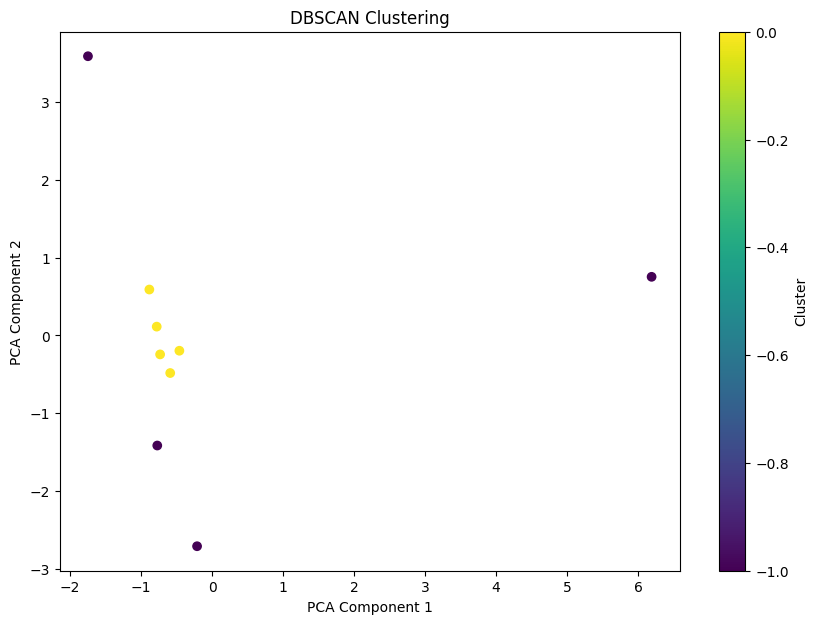

47
Cluster 0:
['Китайское национальное космическое управление ', 'видео спуска на\xa0поверхность Луны посадочного и\xa0взлетного модулей автоматической станции «Чанъэ-6», смонтированного из\xa0снимков, ', 'ночью 2\xa0июня бортовыми камерами', 'в\xa0космос 3\xa0мая 2024\xa0года, а\xa0спустя шесть дней ', 'на\xa0окололунную орбиту']
Cluster -1:
['Видео включает в\xa0себя этапы спуска с\xa0окололунной орбиты, зависания на\xa0высоте сто метров для выбора безопасного места посадки, а\xa0также сам момент посадки с\xa0разлетающимся под действием выхлопов двигателей реголитом..«Чанъэ-6» ', 'Длительность миссии составляет 53\xa0дня, за\xa0это время четыре аппарата должны добыть до\xa0двух килограммов лунного грунта из\xa0ударного бассейна Южный полюс\xa0— Эйткен в\xa0южном полушарии обратной стороны Луны и\xa0привезти капсулу с\xa0ним к\xa0Земле..Команда зонда «Вояджер-1» впервые с ноября прошлого года получила от аппарата данные телеметрии о состоянии бортовых систем, сообщается на сайте Лабор

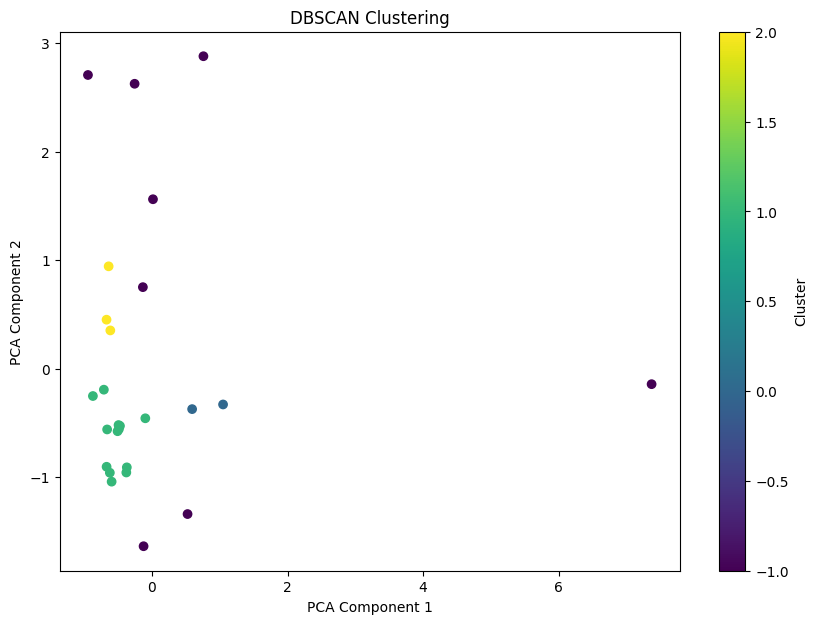

48
Cluster 0:
['Ученые обнаружили, что в\xa0них присутствуют фрагменты белков, характерных для куриной и\xa0человеческой крови', 'В\xa0рамках этих практик использование крови человека или других животных выступает неотъемлемой составляющей..Недавно с\xa0помощью палеопротеомики остатки человеческой крови удалось найти на\xa0гораздо более древних артефактах, чем стены сооружения из\xa0дворца Гезо']
Cluster 1:
['Как ', 'город Абомей', 'важную роль в\xa0.', 'Чуть менее чем за\xa0три столетия Дагомеей правили 12\xa0королей одной династии, обладавших абсолютной светской и\xa0духовной властью', 'Один из\xa0них\xa0— король Гезо\xa0— пришел к\xa0власти в\xa01818 году и\xa0оставался при ней вплоть до\xa0своей смерти (естественной или от\xa0рук йоруба) в\xa01858\xa0году', 'Король построил их\xa0в\xa0честь своего отца\xa0и, как сообщалось, использовал во\xa0время строительства весьма необычный для европейцев строительный раствор', 'Вероятно, жертвами были рабы или пленники..Филипп Шарлье (Philippe

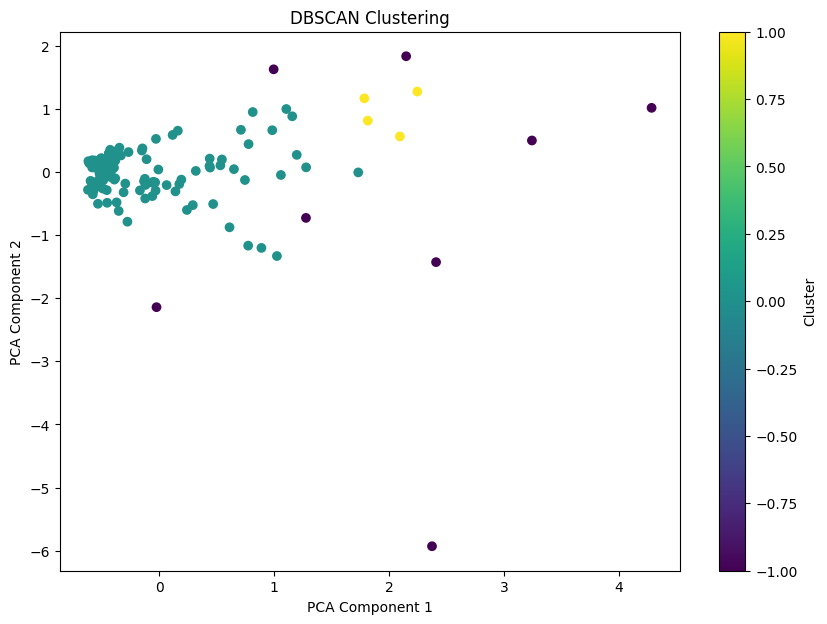

49
Cluster 0:
['В\xa0начале\xa0XX века европейские психиатры заметили, что у\xa0некоторых пациентов во\xa0время длинных рождественских праздников ухудшается психологическое самочувствие', 'Польский психоаналитик ., друг и\xa0сторонник Зигмунда Фрейда, в\xa0статье 1926 года «Воскресные неврозы» ', 'несколько пациентов, которые жаловались на\xa0регулярные головную боль и\xa0проблемы с\xa0желудком, при этом симптомы обострялись именно в\xa0выходные..Ференци считал, что эти симптомы появляются у\xa0людей, которые склонны на\xa0протяжении недели не\xa0замечать своих потребностей в\xa0отдыхе', 'А\xa0с\xa0наступлением выходных у\xa0них появляется подсознательное желание наказать себя за\xa0то, что они отдыхают, что и\xa0проявляется в\xa0виде «нервных» симптомов', 'Это ', 'возможная причина синдрома длительных выходных..Статья была основана на\xa0наблюдении за\xa0молодыми пациентами, которых насчитывалось не\xa0более десяти', 'Возможно поэтому другие врачи не\xa0придали этой теории значения и\

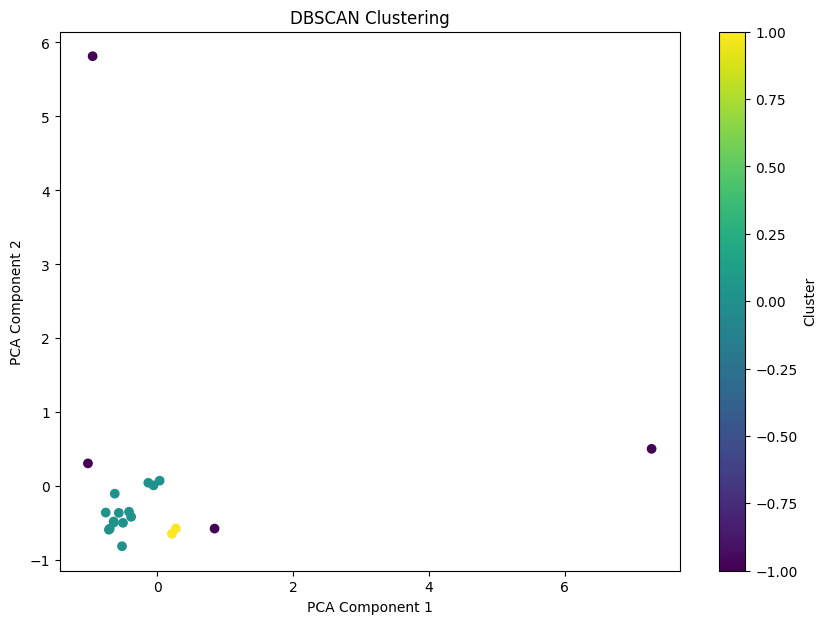

50
Cluster 0:
['Это продлит срок службы телескопа, однако увеличит время наведения на\xa0цель и\xa0лишит его возможности наблюдать за\xa0движущимися объектами, расположенными ближе, чем Марс, ', 'на\xa0сайте агентства..«Хаббл» работает на\xa0околоземной орбите с\xa0апреля 1990\xa0года, удерживая рекорд среди космических обсерваторий', 'Большую роль в\xa0продлении срока службы телескопа сыграли пять пилотируемых полетов шаттлов к\xa0телескопу в\xa0рамках технического обслуживания, последний из\xa0которых состоялся в\xa02009\xa0году', 'явление, а\xa0их\xa0частота увеличивается по\xa0мере старения элементов обсерватории', 'За\xa0последние пару месяцев «Хаббл» дважды ', 'Это дает вероятность того, что «Хаббл» проработает до\xa02035 года и\xa0дольше, на\xa0уровне 70\xa0процентов', 'Функционирование в\xa0подобном режиме было проверено в\xa02008\xa0году, оказалось, что оно не\xa0влияет на\xa0качество получаемых данных..Однако теперь у\xa0«Хаббла» все\xa0же ', 'некоторые проблемы в\xa0работе',

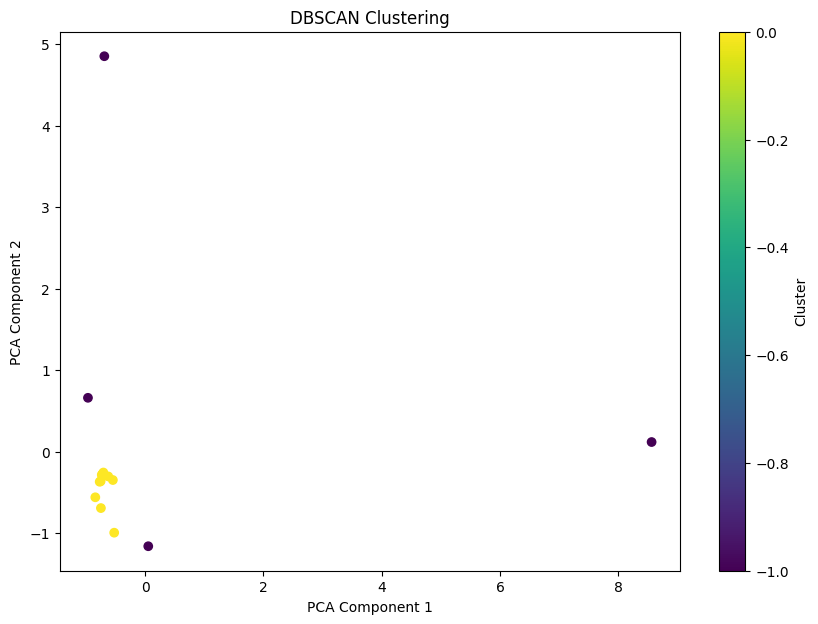

51
Cluster 0:
['Оказалось, что они обладают сопоставимым профилем безопасности', 'Доклад об\xa0этом был ', '(код OR11-05) на\xa0ежегодном ', 'Общества эндокринологов .\xa0в Бостоне', 'Исследователей интересовали исходы у\xa0детей до\xa011-летнего возраста, матери которых принимали ', 'или ', 'Сывороточное содержание адипонектина, лептина, аланинтрансаминазы и\xa0ферритина у\xa0них также было схожими', 'В\xa0возрасте 9–11 лет между группами не\xa0было существенных отличий в\xa0частоте развития ожирения, диабета, отставания в\xa0моторном и\xa0социальном развитии', 'В\xa0экспериментах он\xa0проявлял активность в\xa0отношении более чем 130 изолятов со\xa0множественной лекарственной устойчивостью и\xa0демонстрировал эффективность в\xa0мышиных моделях пневмонии и\xa0заражения крови', 'Как сообщается в\xa0журнале Nature, антибиотик воздействует на\xa0бактериальную транспортную систему липопротеинов и\xa0значительно не\xa0влияет на\xa0микробиом кишечника.']
Cluster -1:
['Индийские исследовател

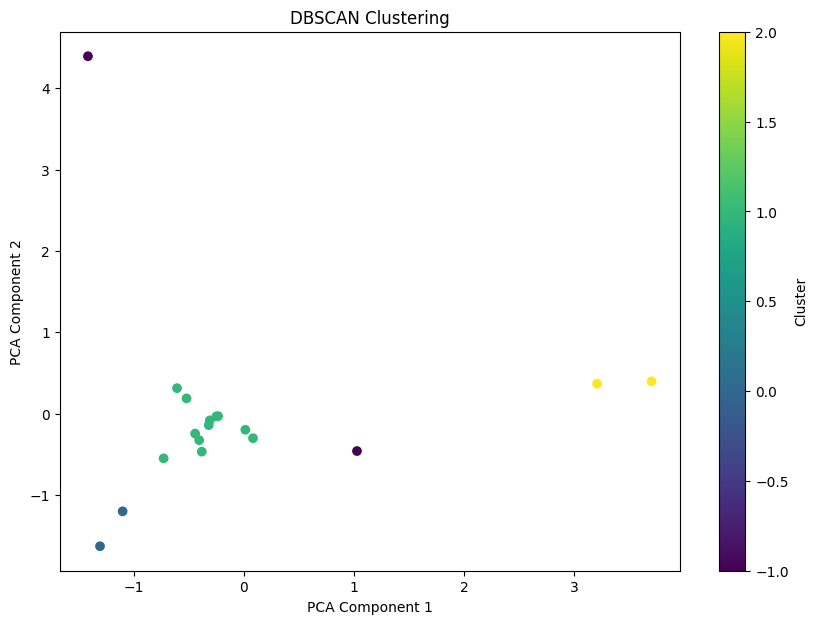

52
Cluster 0:
['Команда энтомологов, которую возглавил Дхарма Раджан Приядарсанан (Dharma Rajan Priyadarsanan) из\xa0Фонда Ашоки для исследований экологии и\xa0окружающей среды, описала необычный новый вид муравьев', 'Во\xa0вторичном лесу около деревни Аингку, на\xa0высоте 803 метра выше уровня моря, исследователи собрали несколько экземпляров муравьев из\xa0разных родов и\xa0видов']
Cluster 1:
['В\xa0мае 2022 года ученые принимали участие в\xa0экспедиции, посвященной документированию биоразнообразия долины реки Брахмапутра в\xa0индийском штате Аруначал-Прадеш в\xa0Восточных Гималаях', 'Морфологический анализ показал, что эти насекомые принадлежат к\xa0неизвестному ранее виду из\xa0рода .', 'Он\xa0получил название .', 'Как ', 'в\xa0статье для журнала ., видовой эпитет «neela» переводится с\xa0нескольких распространенных в\xa0Индии языков как «синий»', '.К\xa0роду ', 'относятся около 40\xa0видов мелких муравьев, которые населяют различные биотопы в\xa0Евразии, Африке, Австралии и\xa0Оке

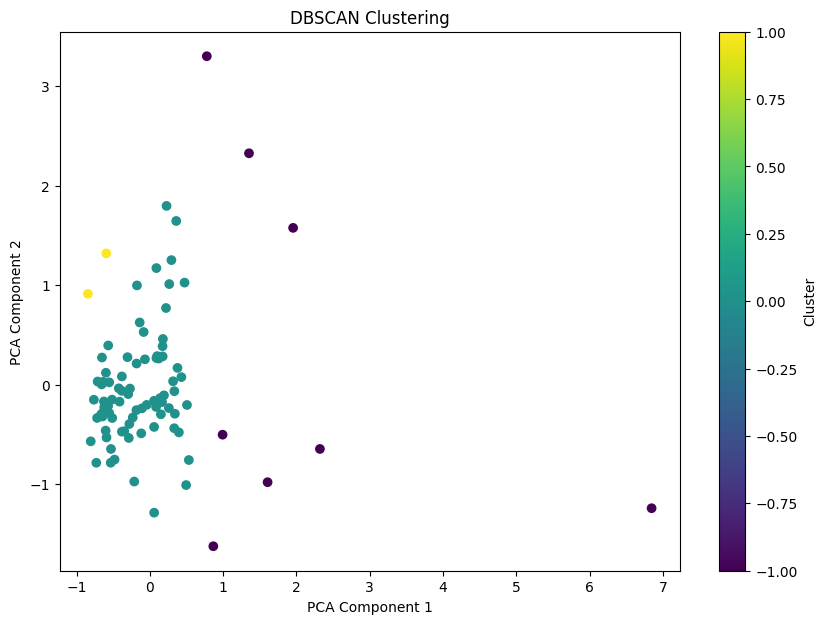

53
Cluster 0:
['В\xa01960-х годах Южная Корея была отсталой аграрной страной', 'Только недавно она получила независимость от\xa0Японии, а\xa0затем пережила гражданскую войну', 'Однако менее полувека спустя по\xa0уровню социально-экономического развития Корея вышла на\xa0один уровень со\xa0странами Западной Европы', 'В\xa0книге ', '(издательство «Альпина нон-фикшн») востоковед Андрей Ланьков рассказывает, как ключевые для этой страны события\xa0ХХ века влияли на\xa0жизнь простых корейцев', '.В\xa0колониальной Корее автомобили были редкостью: в\xa01940 году на\xa030\xa0млн корейцев приходилось 10000 машин (сейчас на\xa051\xa0млн южных корейцев приходится 24\xa0млн машин)', 'Настоящий автомобильный век начался только после 1945\xa0года', 'Присутствие многочисленных американских воинских частей означало, что Корея оказалась наводнена и\xa0американскими военными автомобилями, в\xa0основном джипами', 'Списанные джипы, которые продавались американскими военными по\xa0бросовым ценам, на\xa0нес

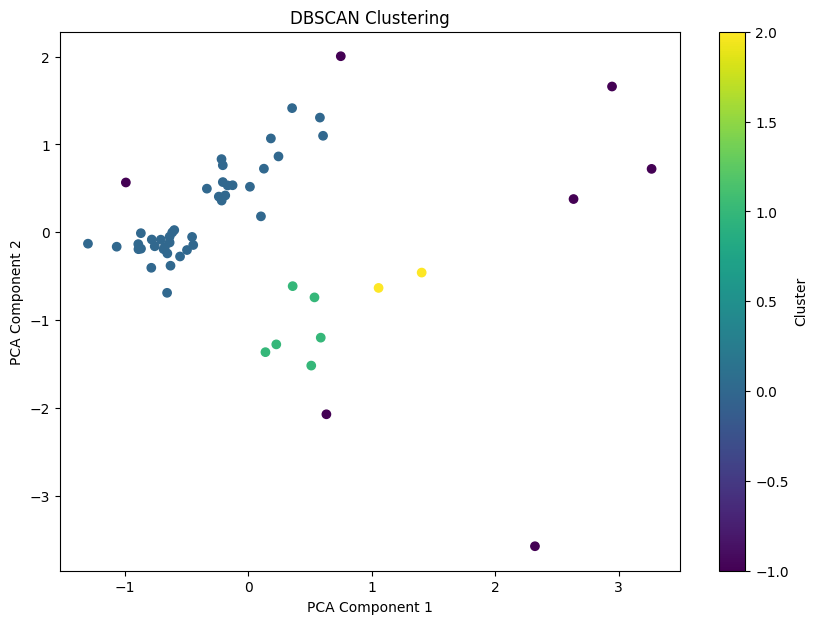

54
Cluster 0:
['Что\xa0же это за\xa0Новый год\xa0— и\xa0без елочки? Но\xa0если елки вам не\xa0досталось, то\xa0можно смело заменить ее\xa0пихтой\xa0— она лучше сохраняет цвет и\xa0аромат и\xa0не\xa0сбрасывает хвою', 'Например, в\xa0России и\xa0Европе популярны пихты Нордмана (.), а\xa0в\xa0Северной Америке\xa0— бальзамические (.)', 'Всего\xa0же к\xa0этому роду ', '50–60 видов хвойных, которые распространены от\xa0Северного Полярного круга до\xa0Средиземноморья и\xa0Центральной Америки', '.Ботаники, похоже, тоже предпочитают пихты елкам: многим из\xa0них они дали видовые названия, которые больше похожи на\xa0комплименты', 'А\xa0какой из\xa0этих эпитетов больше всего подойдет вам? Чтобы узнать, выберите себе пихту и\xa0нажмите на\xa0оранжевую полоску под ней!.Пихта грациозная (.)\xa0— эндемик полуострова Камчатка', 'Единственная известная роща этого вида ', 'в\xa0низовье реки Новый Семячик; в\xa0ней примерно 30000 деревьев\xa0— они растут в\xa0соседстве с\xa0березой каменной (.) на\xa0пл

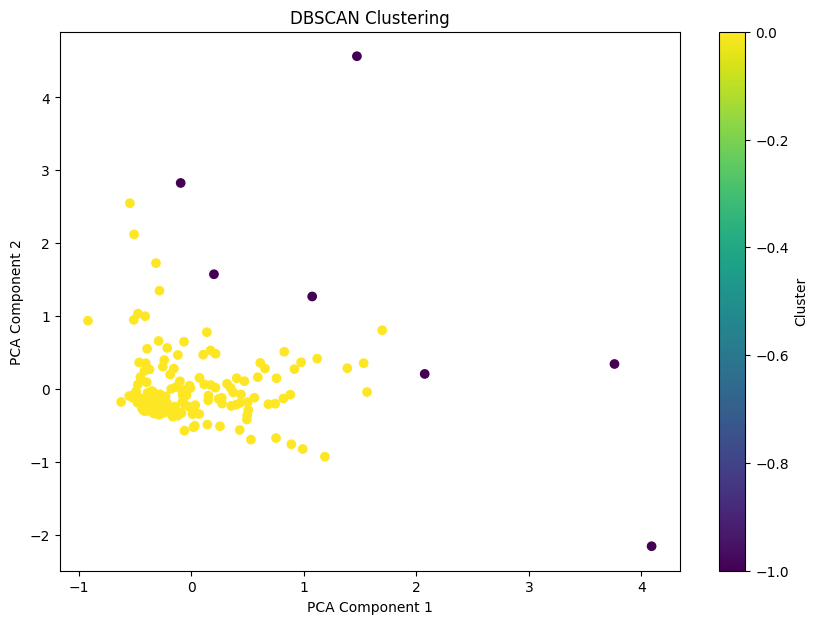

55
Cluster 0:
['Если вам кажется, что вы\xa0живете в\xa0полсилы, никак не\xa0можете реализовать себя и\xa0все больше ползаете, когда хотелось\xa0бы летать, у\xa0вас есть два способа начать новую жизнь', 'Либо идти к\xa0ней долго и\xa0постепенно, отращивая новые способности миллиметр за\xa0миллиметром, либо рискнуть и\xa0попытаться получить все сразу..Если вы\xa0выберете рискованный вариант, то\xa0сначала придется разрушить себя изнутри, а\xa0потом\xa0— провести несколько дней в\xa0полностью разобранном состоянии, когда не\xa0работают ни\xa0мозг, ни\xa0желудок, и\xa0большинства органов просто нет', 'Этот путь может показаться слишком радикальным, но\xa0он\xa0стоит того', 'Именно так поступает большинство видов животных на\xa0Земле, и\xa0у\xa0них все получается', '.Перед вами инструкция', 'Она написана для мухи, но\xa0возможно, и\xa0вы\xa0найдете в\xa0ней что-то полезное', 'Попробуйте себя в\xa0роли насекомого и\xa0пройдите настоящее полное превращение\xa0— гораздо лучше организованное и

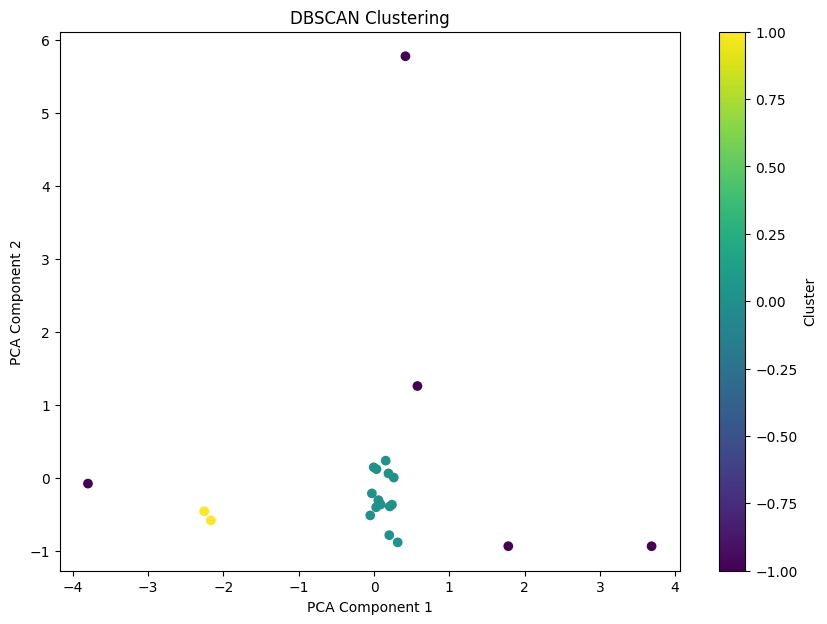

56
Cluster 0:
['Палеопатологи обследовали останки Рамоса\xa0— отца Сенмута, известного древнеегипетского зодчего и\xa0чиновника середины\xa0II тысячелетия до\xa0нашей эры', 'Как ', 'в\xa0статье, опубликованной в\xa0., об\xa0этом косвенно говорят выявленные грыжи Шморля, а\xa0также рассекающий остеохондрит в\xa0подтаранном суставе..Сенмут (Сененмут)\xa0— один из\xa0самых известных древнеегипетских чиновников и\xa0зодчих, живший и\xa0занимавший высокие посты в\xa0эпоху Нового царства, когда у\xa0власти ', 'царица XVIII династии Хатшепсут', 'Среди прочего он\xa0', 'В\xa01935 году исследователи нашли в\xa0ней захоронения родителей этого высокопоставленного чиновника\xa0— Рамоса и\xa0Хатнофер, а\xa0также еще шести человек (трех взрослых и\xa0трех детей), которые, вероятно, были членами этой семьи', 'Исследователи отметили, что информации об\xa0этом человеке очень мало', 'На\xa0его костях они заметили несколько неметрических признаков: ромбовидную ямку в\xa0левой ключице, надлопаточные выемк

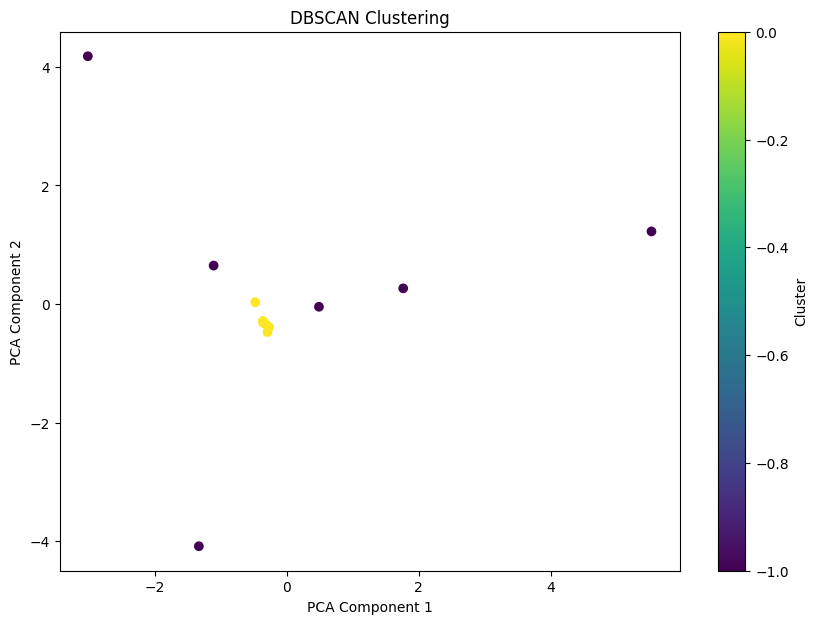

57
Cluster 0:
['Доклад об\xa0этом был ', '(код OR33-02) на\xa0ежегодном ', 'Общества эндокринологов ENDO 2024\xa0в Бостоне', 'Мойка Енстерле Север (Mojca Jensterle Sever) из\xa0Университетского медицинского центра в\xa0Любляне с\xa0коллегами пригласила для участия в\xa0', 'Транскриптомный анализ биоптатов языка определил, что после приема активного препарата значимо повышается транскрипция генов ., ., ', 'и\xa0., связанных с\xa0передачей вкусовых сигналов, нейропластичностью и\xa0обновлением вкусовых сосочков языка', 'По\xa0данным функциональной МРТ, прием семаглутида усиливал активность ']
Cluster -1:
['Словенские ученые провели небольшое односторонне слепое рандомизированное плацебо-контролируемое исследование и\xa0выяснили, что прием семаглутида приводит к\xa0улучшению вкусового восприятия у\xa0женщин с\xa0ожирением', '30\xa0женщин (возраст 33,7 ± 6,1\xa0года) с\xa0ожирением (индекс массы тела 36,4 ± 4,4 килограмм на\xa0метр в\xa0квадрате)', 'Половине из\xa0них в\xa0течение 16\xa0не

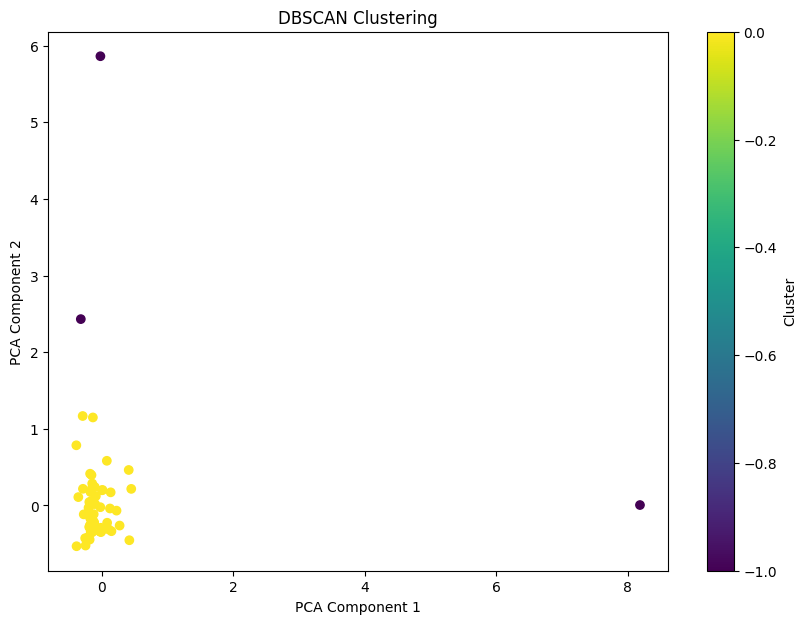

58
Cluster 0:
['Врачи советуют нам больше двигаться, чаще гулять на\xa0свежем воздухе, разнообразно и\xa0сбалансированно питаться', 'Порой этим рекомендациям сложно следовать', 'Большую часть дня мы\xa0сидим за\xa0компьютером, перекусываем на\xa0ходу, а\xa0за\xa0прогулку засчитываем путь от\xa0дома до\xa0работы', 'Эти и\xa0другие условия жизни могут спровоцировать развитие серьезных заболеваний..Разумеется, есть вещи, которые мы\xa0не\xa0можем изменить', 'Например, возраст и\xa0наследственность относятся к\xa0немодифицируемым факторам риска для здоровья', 'Но\xa0на\xa0другие факторы, усугубляющие или облегчающие течение болезней, мы\xa0все-таки влияем, поэтому их\xa0называют модифицируемыми', 'К\xa0ним относят, например, физическую активность, диету, отказ от\xa0алкоголя и\xa0курения, гигиену сна и\xa0контроль стресса', 'В\xa0этом материале мы\xa0расскажем о\xa0данных, которые стоят за\xa0популярными рекомендациями по\xa0модификации рисков, и\xa0о\xa0том, что делать, если вы\xa0не\xa0м

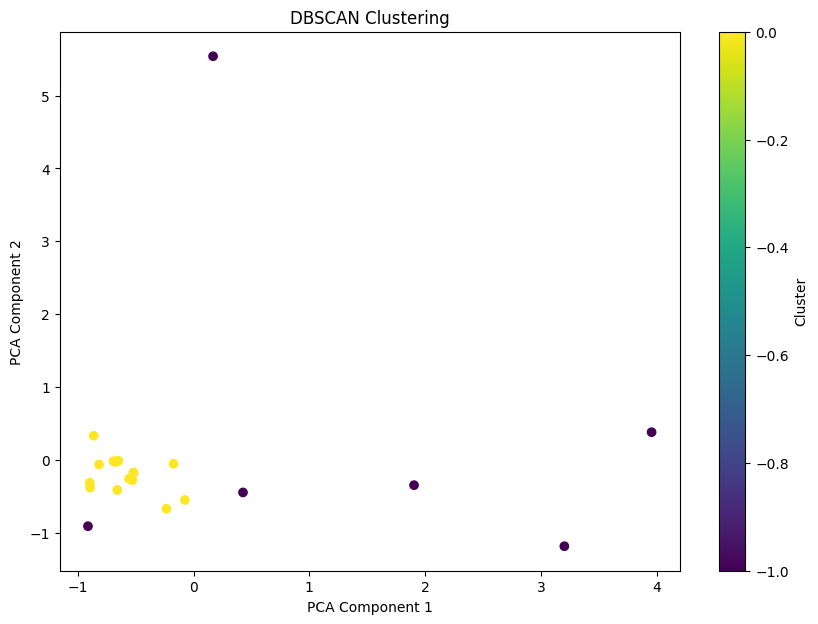

59
Cluster 0:
['Статья ', 'в\xa0...Традиционно магнитные вещества делят на\xa0два основных класса\xa0— ферромагнетики и\xa0антиферромагнетики', 'Они отличаются спиновым порядком: в\xa0ферромагнетиках спины ', 'параллельно друг другу, а\xa0в\xa0антиферромагнетиках\xa0— антипараллельно', 'Скошенные антиферромагнетики сочетают в\xa0себе антиферромагнитный порядок с\xa0явлениями, типичными для ферромагнетиков, и\xa0открывают большой потенциал для ', 'и\xa0магноники', '.Недавно ученые предложили новый класс магнитных материалов, который назвали альтермагнетиками', 'В\xa0них, в\xa0отличие от\xa0антиферромагнетиков, не\xa0происходит вырождение состояния', 'Экспериментально физики ', 'существование таких магнитных состояний лишь в\xa0этом году..Теперь физики Рубен Лендерс (R.\xa0A.\xa0Leenders), Дмитрий Афанасьев (D.\xa0Afanasiev), Алексей Кимель (A.V', 'По\xa0словам ученых, причиной этой нелинейности является дополнительный крутящий момент, создаваемый связью светового импульса с\xa0уже возбу

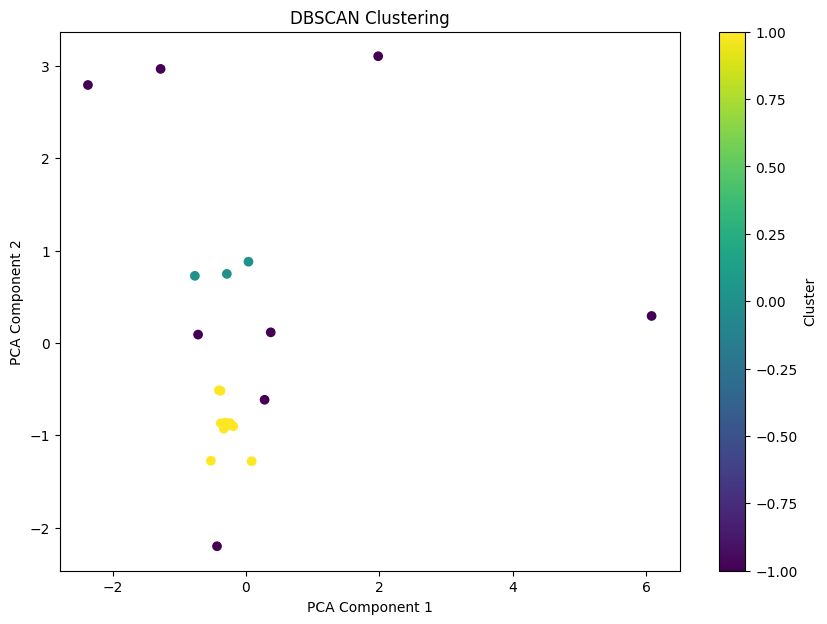

60
Cluster 0:
['Температуры под пологом тропических лесов за\xa0последние 20\xa0лет быстро менялись вслед за\xa0глобальными, хотя считается, что микроклимат в\xa0них должен быть устойчивым', 'в\xa0.Тропические леса и\xa0их\xa0обитатели уязвимы к\xa0последствиям изменения климата: поскольку в\xa0их\xa0эволюционной истории температурные условия были стабильными и\xa0имели узкий диапазон, они ', 'Для описания таких изменений был введен параметр новизны (below-canopy temperature novelty)\xa0— мера отличия текущих климатических условий (2005-2019\xa0годы) от\xa0базовых (1990-2004\xa0годы)']
Cluster 1:
['В\xa0наибольшей степени потепление затронуло южноамериканские тропики, а\xa0наименее подвергнутыми стрессу остаются леса Гвианского плоскогорья', 'Такие выводы содержит статья, ', 'приспособлены к\xa0их\xa0изменению', 'В\xa0то\xa0же время считается, что полог леса эффективно смягчает температурные колебания и\xa0способен поддерживать стабильную влажность, поэтому под ним должна поддерживатьс

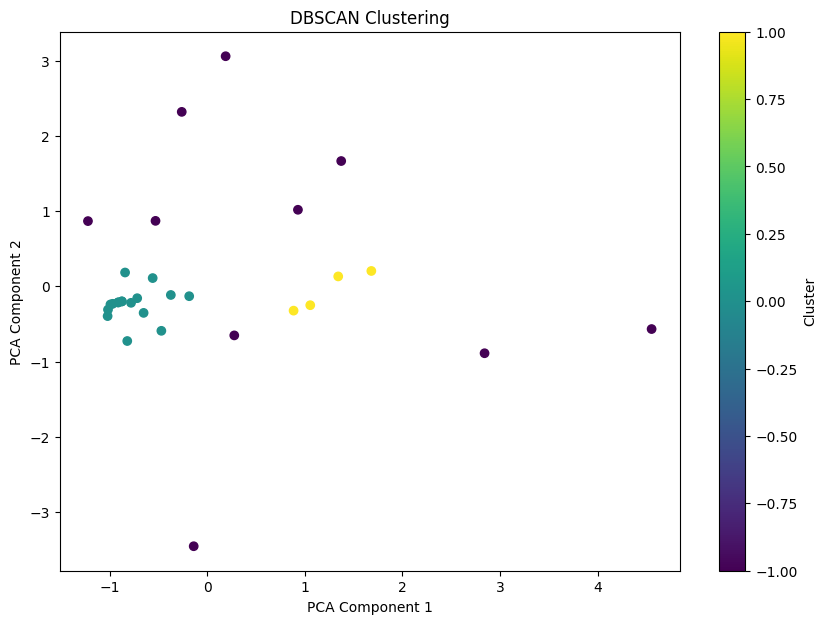

61
Cluster 0:
['Как ', 'в\xa0., в\xa0исследовании приняло участие более 1,2 миллиона детей', '.Эпилепсия ', 'одним из\xa0наиболее распространенных неврологических заболеваний среди мужчин фертильного возраста', 'Часто таким пациентам назначается противосудорожный препарат вальпроат натрия\xa0— соль вальпроевой кислоты', 'При этом риск для потомства при приеме вальпроата отцом остается неопределенным', '.Недавно Британское агентство по\xa0регулированию лекарственных средств и\xa0изделий медицинского назначения ', 'Вальпроаты также не\xa0повышали риск врожденных дефектов перегородок сердца', 'Статистические анализы не\xa0показали значимости этого риска', '.Результаты этого исследования противоречат предыдущим данным о\xa0вредном влиянии вальпроата на\xa0сперматогенез', 'Для более полного понимания эффектов вальпроата необходимы дополнительные наблюдательные исследования и\xa0фундаментальные работы', '.Лечить эпилепсию можно по-разному', 'Недавно мы\xa0', 'В\xa0среднем риск повышался на\x

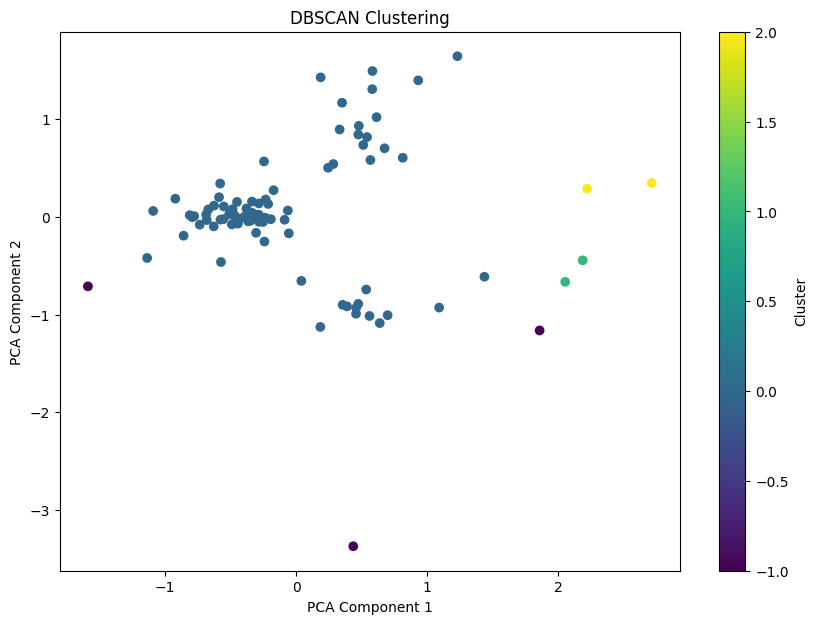

62
Cluster 0:
['В\xa01492 году Христофор Колумб пересек Атлантический океан\xa0и, как он\xa0думал, достиг восточного побережья Азии', 'Несколько десятилетий Испания установила контроль над территорией десятка современных государств Америки и\xa0покорила самые могучие цивилизации континента\xa0— ацтеков и\xa0инков', 'В\xa0книге ', '(издательство «Альпина нон-фикшн»), переведенной на\xa0русский язык Александром Свистуновым, историк Фернандо Сервантес рассказывает об\xa0испанских колонизаторах, чьи действия, по\xa0его мнению, нельзя рассматривать в\xa0отрыве от\xa0контекста позднесредневековой религиозной культуры', 'Предлагаем вам ознакомиться с\xa0фрагментом, в\xa0котором испанцы покоряют Кубу, а\xa0священник, ставший свидетелем зверств над коренным населением, отстаивает права индейцев..Неутолимая страсть к\xa0золоту вела к\xa0постепенному разрушению некоторых живучих предрассудков', 'В\xa01507 году один галисийский .Человек из\xa0благородной семьи, получивший особый статус по\xa0насле

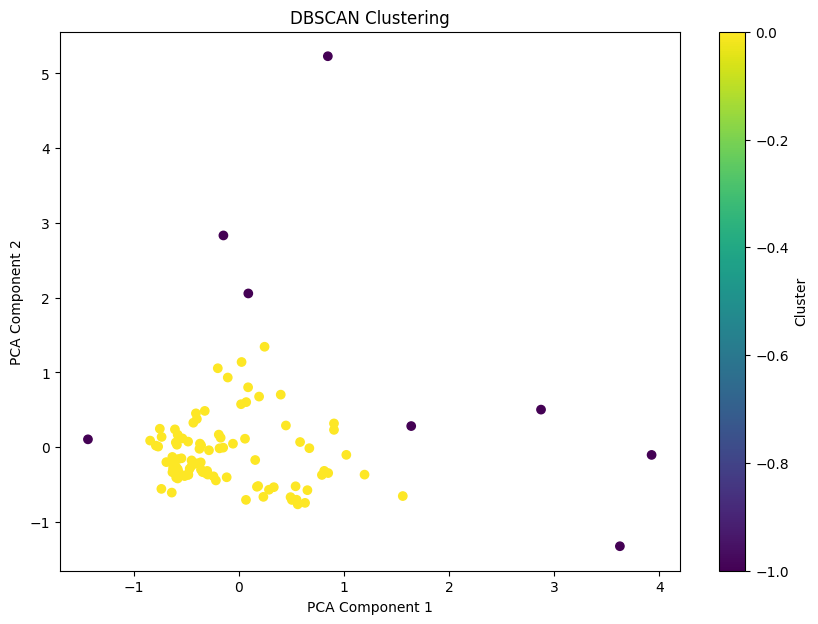

63
Cluster 0:
['До\xa085\xa0процентов софта в\xa0реестре отечественного\xa0ПО ', 'опенсорс', 'А\xa0к\xa02026\xa0году, по\xa0', 'аналитиков, 92\xa0процента российских компаний будут использовать программы на\xa0базе открытого кода', 'И\xa0хотя в\xa0последнее время разработчики из\xa0России столкнулись с\xa0новыми трудностями, сегмент опенсорса не\xa0теряет потенциала', 'На\xa0этот раз мы\xa0поговорим о\xa0перспективах российского\xa0ПО с\xa0открытым кодом..Этим материалом мы\xa0продолжаем проект ., посвященный опенсорсу: его истории, философии, ключевым принципам, самым известным и\xa0важным разработкам, а\xa0также законодательству и\xa0лицензированию', 'Проект подготовлен при поддержке высокопроизводительного и\xa0масштабируемого российского веб-сервера ...«Опенсорс\xa0— это наше все, <...>, наш главный тренд и\xa0магистраль»,\xa0— ', 'министр цифрового развития РФ\xa0Максут Шадаев, также отметив вклад российского сообщества разработчиков в\xa0мировой опенсорс', 'Опыт отечественной инж

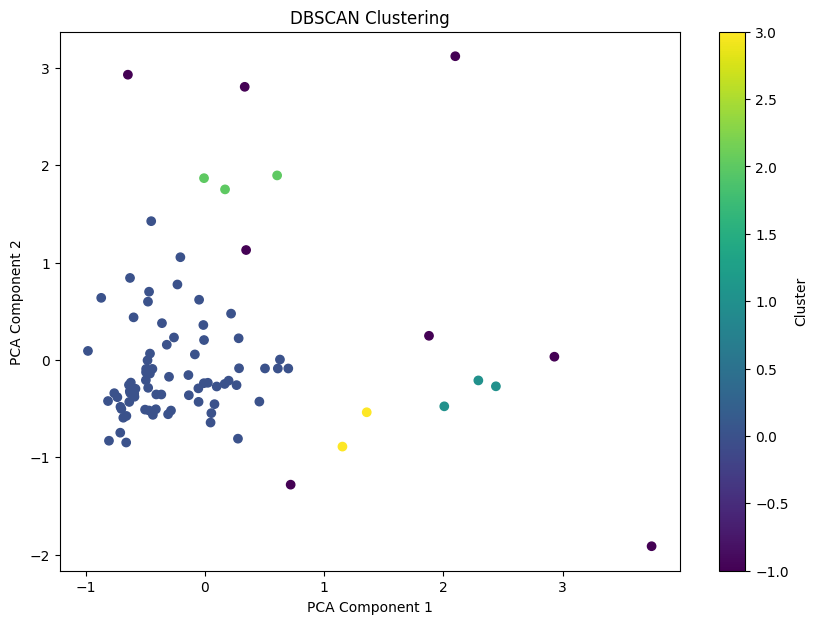

64
Cluster 0:
['Справедливо\xa0ли говорить о\xa0существовании ', 'опенсорса? Единого мнения не\xa0существует\xa0— в\xa0конце концов, выделение локального сегмента противоречит самому определению\xa0ПО с\xa0открытым кодом', 'Тем не\xa0менее можно отметить инициативы и\xa0разработки, которые появились в\xa0России и\xa0получают наибольшую поддержку именно от\xa0российских разработчиков', 'Проект подготовлен при поддержке высокопроизводительного и\xa0масштабируемого российского веб-сервера ...В\xa0', 'об\xa0истории опенсорса в\xa0России мы\xa0упоминали некоторые отечественные проекты с\xa0открытым кодом', 'Многие из\xa0них появились еще до\xa0ухода зарубежных вендоров\xa0ПО, но\xa0с\xa0недавних пор интерес к\xa0ним усилился', 'Например, как в\xa0России, так и\xa0в\xa0других странах мира растет спрос на\xa0разработку и\xa0поддержку .Системы управления базами данных..', 'Это событие не\xa0только позволило использовать ее\xa0с\xa0данными на\xa0любых языках, но\xa0также стало первым шагом к\xa

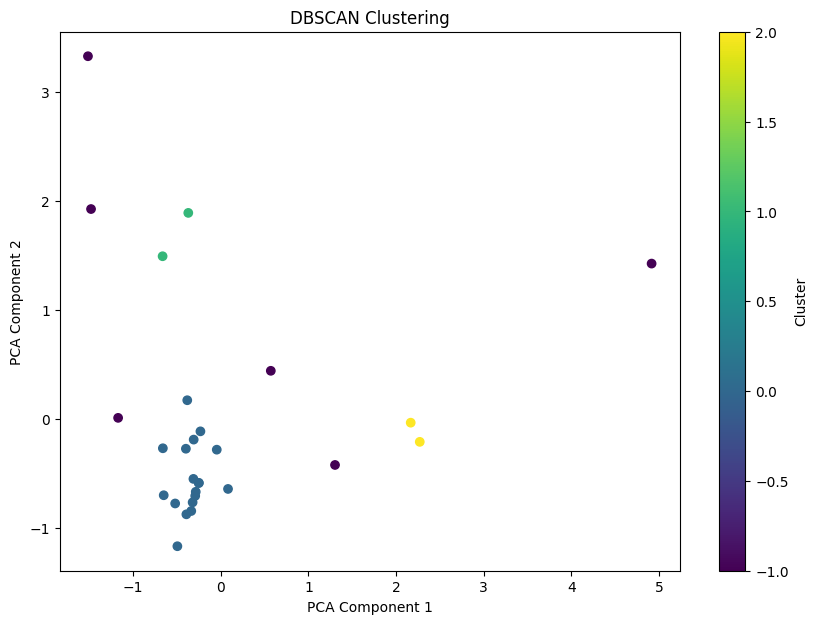

65
Cluster 0:
['Как ', 'в\xa0статье для журнала ., у\xa0пациентов наблюдалось снижение тревожности и\xa0депрессии после трех месяцев лечения..Распространенность ПТСР среди военнослужащих и\xa0ветеранов ', '20\xa0процентов', 'При этом это расстройство по-прежнему трудно поддается лечению', 'Существующие методы лечения ПТСР ', 'для некоторых людей, но\xa0их\xa0применение ограничено', 'При этом развивается подход использования собак в\xa0качестве дополнительного вмешательства', 'Однако эффективность такого подхода ', 'Однако на\xa0сегодняшний день было ', 'только одно клиническое исследование их\xa0эффективности, что не\xa0позволяет делать выводы об\xa0эффективности методики', 'В\xa0исследование попали 156 ветеранов (четверть из\xa0них\xa0— женщины), почти 90\xa0процентов из\xa0которых завершили последующую оценку', 'Средний возраст участников составил 37,6\xa0года', 'Специальные навыки, связанные с\xa0ПТСР, ', 'При оценке по\xa0специализированным шкалам разница составила от\xa07\xa0до\xa

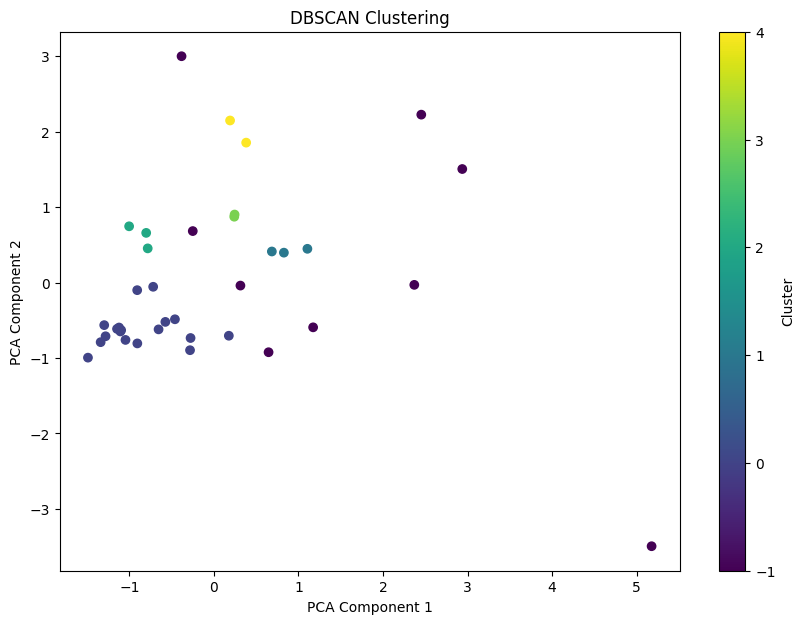

66
Cluster 0:
['и\xa0обнаружили, что самки живут почти вдвое дольше самцов, если они размножаются и\xa0заботятся о\xa0потомстве', 'При этом одно только выкармливание паучат сокращало жизнь матерей, но\xa0ухаживание за\xa0паучатами в\xa0целом\xa0— удлиняло', 'Результаты ', 'в\xa0...Самки нередко живут дольше самцов', 'Одно раннее ', 'из\xa0семейства Пауков-скакунчиков (.)', 'Самки\xa0.заботятся о\xa0вылупившихся паучатах и\xa0', 'их\xa0питательной жидкостью, которая выделяется из\xa0эпигастральной борозды', 'Эта жидкость содержит сахар, жир и\xa0белок, и\xa0для простоты ученые называют ее\xa0молоком', 'Задача самцов ограничивается спариванием, а\xa0в\xa0дальнейшей заботе о\xa0потомстве они никак не\xa0участвуют', 'Кроме того, полученные результаты указывают на\xa0то, что сама забота о\xa0потомстве продлевает жизнь матерям', 'А\xa0возможно, не\xa0только\xa0им: самцы некоторых видов птиц, у\xa0которых отцы, а\xa0не\xa0матери, заботятся о\xa0потомстве, ', 'дольше самок', 'Раннее исследован

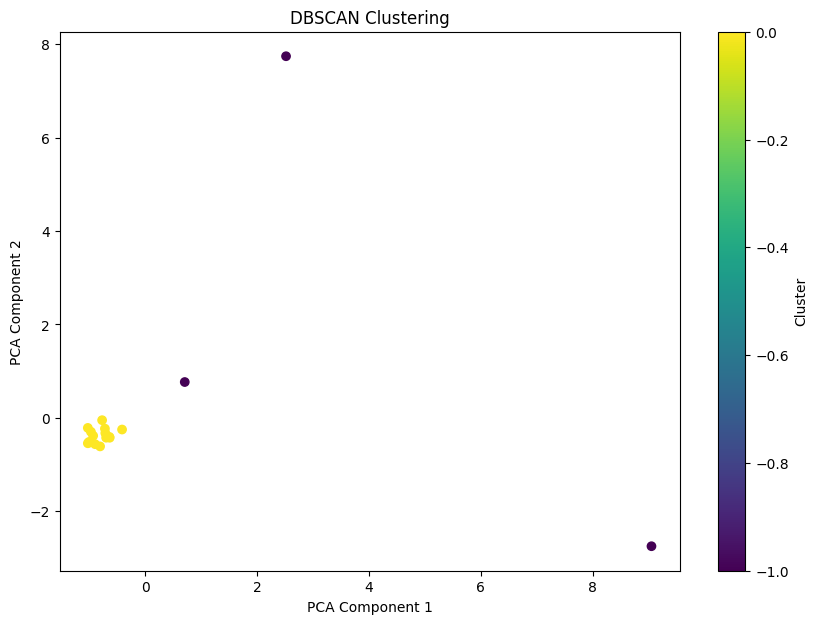

67
Cluster 0:
['Сбер сегодня активно поддерживает развитие науки в\xa0стране и\xa0сотрудничает с\xa0ведущими исследовательскими организациями и\xa0университетами', 'Чтобы поддержать ученых, активно работающих в\xa0России, в\xa02021 году была учреждена ежегодная Научная премия Сбера, и\xa0сегодня она уже является знаковым событием в\xa0нашей стране', 'Премия вручается в\xa0трех номинациях: «Физический мир», «Науки о\xa0жизни» и\xa0«Цифровая вселенная»', 'Каждый лауреат получает награду в\xa020\xa0млн рублей..Мы\xa0пообщались с\xa0учеными, которые стали ', 'в\xa02023\xa0году, и\xa0узнали, что сподвигает их\xa0на\xa0открытия, эксперименты и\xa0работу с\xa0данными', 'В\xa02023 году Сбер наградил .', 'Как ведутся научные работы в\xa0большой корпорации\xa0— смотрите в\xa0видеопортретах с\xa0каждым из\xa0них..Кажется, что сейчас генеративными моделями искусственного интеллекта может воспользоваться каждый', 'Вопрос в\xa0том, как именно', 'О\xa0возможностях нейросетей рассказал ', 'Сегодня он\

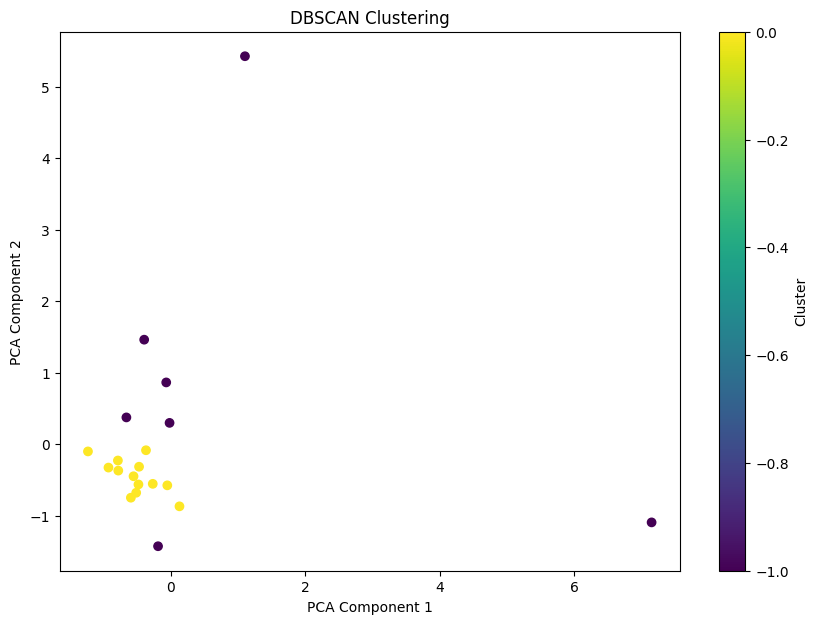

68
Cluster 0:
['Ожидается, что через сутки он\xa0доставит двух астронавтов NASA на\xa0станцию', 'Трансляция пуска ', 'на\xa0YouTube..CST-100 Starliner создан компанией Boeing в\xa0рамках программы CLPS NASA в\xa0качестве корабля для пилотируемых полетов к\xa0МКС', 'на\xa0неверную орбиту, а\xa0второй беспилотный полет неоднократно ., но\xa0в\xa0итоге ', 'Экипаж состоит из\xa0опытных астронавтов NASA Барри Уилмора (Barry Eugene Wilmore) и\xa0Суниты Уильямс (Sunita Lyn Williams), а\xa0сам полет продлится почти десять дней', 'После анализа утечку признали слишком малой, чтобы проводить разборку корабля', 'Ракета оснащена системой аварийного спасения и\xa0лишена обтекателя полезной нагрузки', 'Корабль соединен со\xa0второй ступенью при помощи адаптера, который также включает в\xa0себя аэродинамическую юбку для снижения нагрузок на\xa0корабль', '.Автономная стыковка корабля с\xa0модулем «Гармония» ожидается через сутки, возвращение на\xa0Землю произойдет примерно через неделю', 'Starliner до

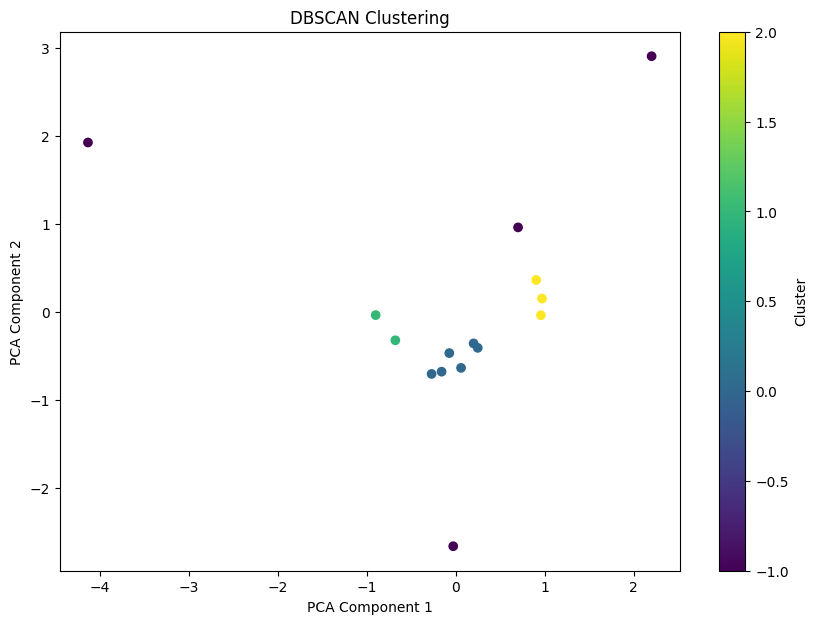

69
Cluster 0:
['Полученные результаты, по\xa0мнению исследователей, говорят о\xa0том, что между сооружением самого раннего и\xa0самого позднего очага прошло как минимум 200–240\xa0лет, то\xa0есть несколько поколений', 'Об\xa0этом ', 'собой стоянку под открытым небом, которую археологи исследуют с\xa01980-х годов', 'Среди прочего, археологи ', 'на\xa0этом памятнике окаменелые неандертальские фекалии, анализ которых не\xa0только позволил ', 'Об этом сообщается в статье, опубликованной в журнале Nature Communications.']
Cluster 1:
['в\xa0статье, опубликованной в\xa0...Памятник Эль-Сальт ', 'Они обнаружили здесь несколько слоев, содержащих остатки жизнедеятельности людей эпохи среднего палеолита, когда Пиренейский полуостров населяли неандертальцы']
Cluster 2:
['Так, в\xa0одном из\xa0слоев возрастом от\xa045,2 ± 3,4 до\xa047,2 ± 4,4 тысячи лет, помимо прочего, ученые нашли пять человеческих зубов', 'Они уточнили, что люди впервые пришли на эту стоянку около 44 тысяч лет назад', 'Среди проч

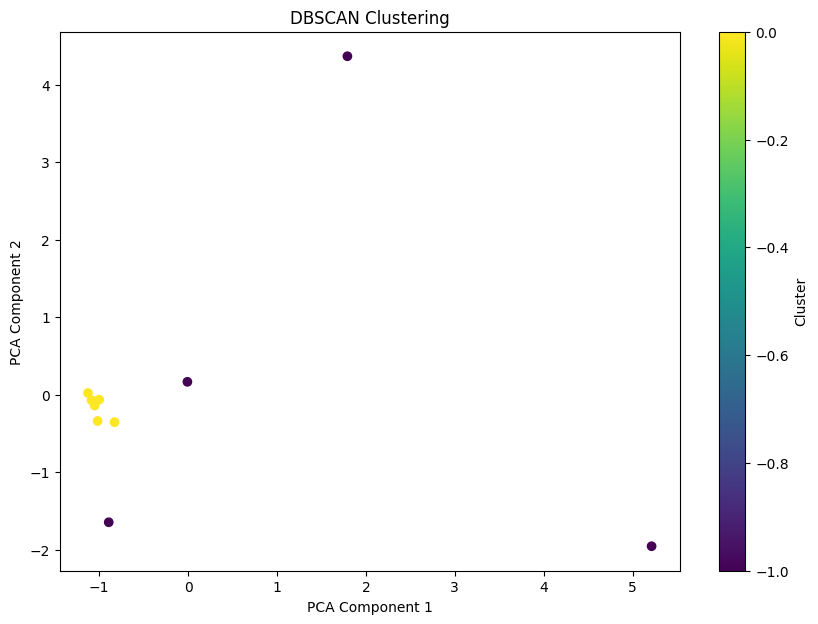

70
Cluster 0:
['Кроме того, у\xa0пациентов с\xa0ожирением наблюдались более высокие риски госпитализации в\xa0отделение интенсивной терапии (относительный риск 2,02)', 'Результаты исследования ', 'в\xa0журнале .', 'Всего в\xa0исследование включили данные о\xa0более чем 66,5 тысячи пациентов', 'Хотя о\xa0связи ожирения и\xa0более тяжелого течения ковида было известно и\xa0раньше, это исследование отражает практически значимые последствия этой связи', 'Результаты исследования опубликованы в\xa0JAMA Ophthalmology.']
Cluster -1:
['Когортное исследование британских ученых показало, что пациенты с\xa0ковидом, страдающие ожирением (индекс массы тела более 30\xa0килограмм на\xa0квадратный метр), находились в\xa0стационаре дольше, чем пациенты из\xa0контрольной группы с\xa0индексом массы тела от\xa018,5 до\xa025\xa0килограмм на\xa0квадратный метр', 'При этом ученые не\xa0обнаружили никакой связи между индексом массы тела и\xa0продолжительностью пребывания в\xa0отделении интенсивной терапии', '.

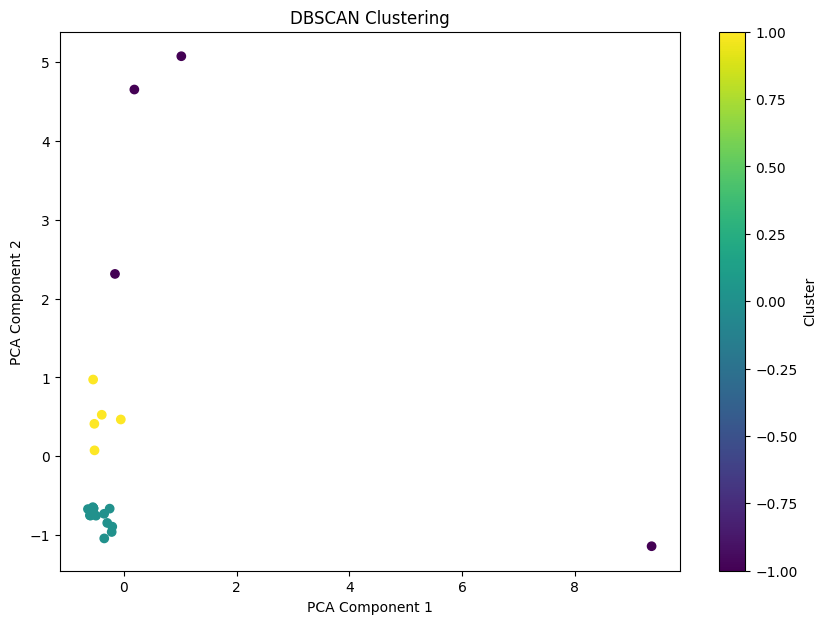

71
Cluster 0:
['В\xa0разных культурах вода играет важную роль одновременно в\xa0сотворении и\xa0гибели мира, а\xa0также служит границей между обителями живых и\xa0мертвых', 'В\xa0книге ', '(издательство «Манн, Иванов и\xa0Фербер») писательница и\xa0переводчик Наталья Осояну рассказывает о\xa0водных космологических сюжетах, божествах, ритуалах, обрядах и\xa0суевериях', 'Как .Пер', 'Е.\xa0Г.\xa0Рабинович.', 'Б.\xa0А.\xa0Старостина..:.Отсюда правильная догадка, что Луну надо рассматривать как светило\xa0— вместилище жизненных духов (spiritus sidus); что она наполняет Землю [этими духами]; что когда Луна приближается, тела набухают жизнью, а\xa0когда отдаляется, они пустеют', '<...> Солнечный\xa0же огонь иссушает влагу <...>', 'Например, Флавий Филострат примерно через два века после Плиния Старшего .Пер', 'Е.\xa0Г.\xa0Рабинович.', 'в\xa0«Жизни Аполлония Тианского», что «Океан колеблем подводными вздохами из\xa0многих расселин, кои находятся в\xa0океанском дне и\xa0в\xa0окружающей суше,\xa

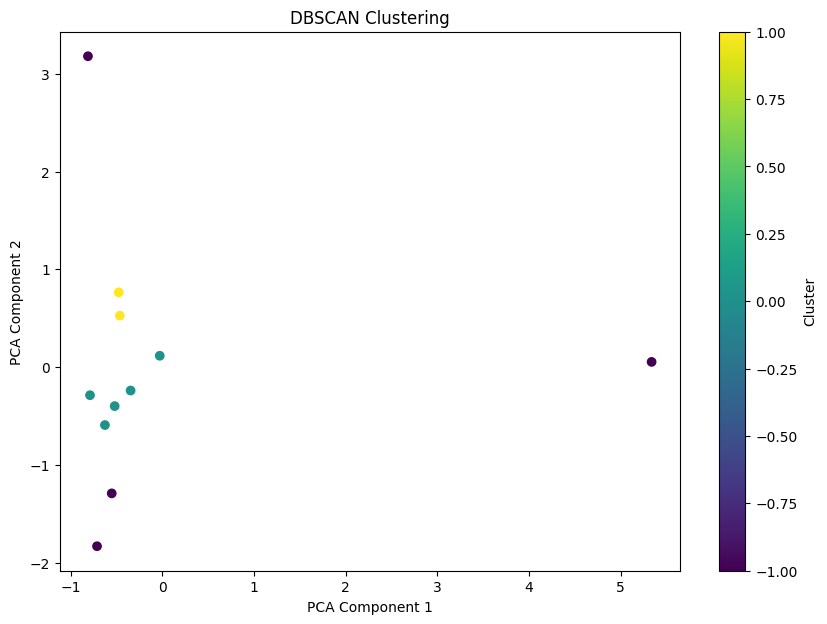

72
Cluster 0:
['Самки многих видов животных очень разборчивы', 'Одни привлекают потенциальных партнерш пением, другие\xa0— танцами, третьи\xa0— подарками', 'Тогда ему было пять лет', 'Сотрудники зоопарка при помощи сторонней организации провели генетический тест и\xa0выяснили, что все это время Ген был самкой', 'В\xa0организации уведомили посетителей об\xa0ошибке, но\xa0отметили, что переименовывать бегемота не\xa0будут.']
Cluster 1:
['Чтобы завоевать их\xa0благосклонность, самцам приходится проявлять себя с\xa0лучшей стороны', 'Согласно утверждениям предыдущих владельцев и\xa0таможенным документам, Ген был самцом']
Cluster -1:
['А\xa0насколько хороши в\xa0соблазнении\xa0вы? Посмотрите на\xa0фотографии восьми самок и\xa0ответьте, что нужно сделать, чтобы найти путь к\xa0сердцу каждой из\xa0них..Двенадцатилетний обыкновенный бегемот (Hippopotamus amphibius) по\xa0имени Ген (Gen) из\xa0зоопарка Тэннодзи в\xa0японском городе Осака, которого на\xa0протяжении семи лет считали самцом, оказал

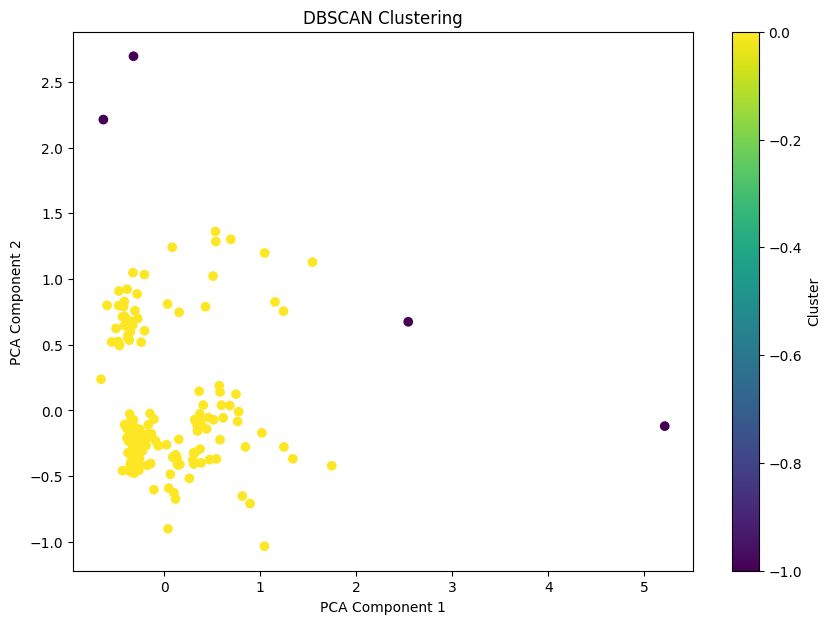

73
Cluster 0:
['Когда-то табак считался чудо-растением, способным излечить от\xa0депрессии, простуды и\xa0астмы, а\xa0курение было частью досуга самых привилегированных слоев общества', 'Однако эти времена давно прошли', 'Сегодня врачи хорошо знают, насколько опасными могут быть сигареты, и\xa0курят их', 'люди', 'Вместе с\xa0проектом «В\xa0движении» рассказываем, как распространялась и\xa0эволюционировала самая вредная привычка\xa0XX века\xa0— от\xa0церемониального курения у\xa0индейцев до\xa0сигарет как символа феминизма и\xa0появления альтернатив традиционным способам употребления табака..Возможно, впервые люди ', 'курить табак еще в\xa0конце эпохи плейстоцена\xa0— около 12,3 тысячи лет назад', 'Об\xa0этом косвенно говорят обугленные семена этого растения, которые недавно нашли на\xa0одной из\xa0стоянок в\xa0Юте', 'Однако прямые доказательства столь большой древности отсутствуют', 'На\xa0сегодняшний день возраст самых ранних табачных трубок, внутри которых ', 'табачный налет, составл

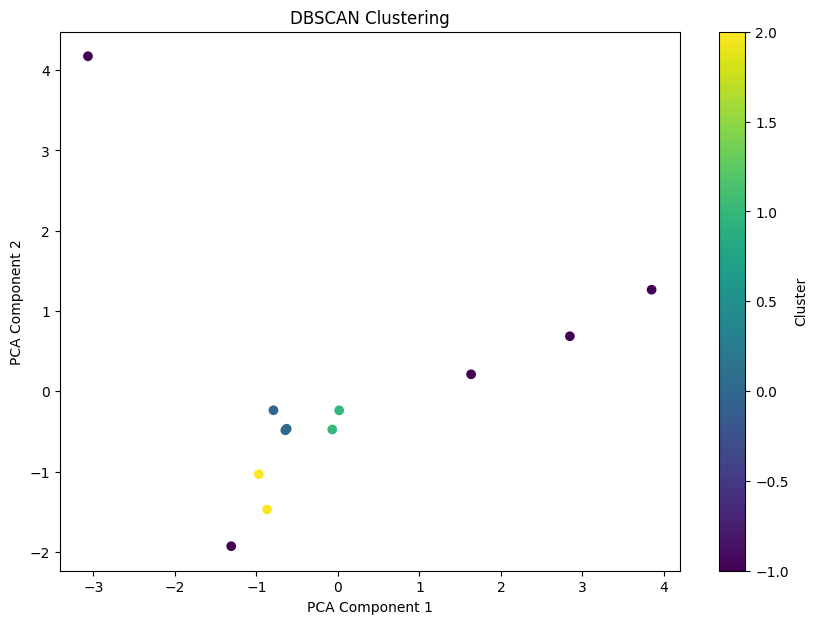

74
Cluster 0:
['Такие прогнозы содержит ', 'Всемирной метеорологической организации', 'Это негативно сказалось на\xa0концентрации фитопланктона и\xa0численности питающихся им\xa0малых фламинго']
Cluster 1:
['.Метеобюро Соединенного Королевства подготовило для ВМО доклад с\xa0прогнозированием изменений климата на\xa0период с\xa02024 по\xa02028\xa0годы', 'Оказалось, что с\xa01999 по\xa02022 год уровень воды в\xa0большинстве этих водоемов вырос']
Cluster 2:
['Как отмечается в\xa0статье для журнала Current Biology, под угрозой, в\xa0частности, популярные среди туристов озера Накуру, Богория и\xa0Натрон', 'В\xa0ответ на\xa0изменения окружающей среды фламинго могли\xa0бы чаще использовать шесть водоемов дальше к\xa0северу и\xa0югу от\xa0экватора, где доступность пищи за\xa0последние годы увеличилась, однако половина из\xa0них не\xa0обладает никаким охранным статусом.']
Cluster -1:
['С\xa0вероятностью в\xa086\xa0процентов один из\xa0следующих пяти лет побьет рекорд 2023\xa0года, ставшего самы

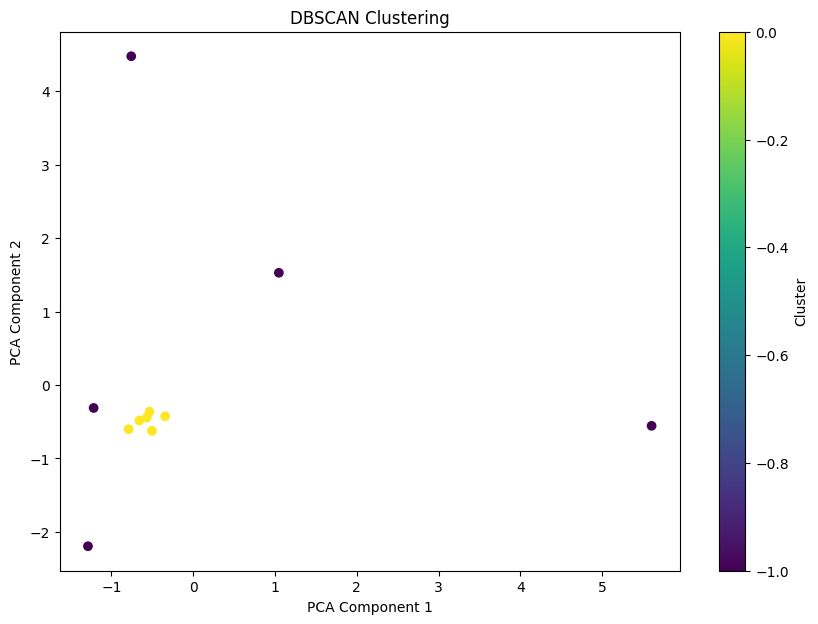

75
Cluster 0:
['Соответствующее клиническое руководство ', 'в\xa0журнале ведомства .', 'Согласно ему, медработники должны рекомендовать самостоятельный однократный прием 200 миллиграмм ', 'Использовать препарат желательно в\xa0первые 24\xa0часа и\xa0обязательно не\xa0позже 72\xa0часов после такого контакта', 'Медработникам следует обсуждать эту рекомендацию с\xa0пациентами для принятия взвешенного информированного решения и\xa0выписывать им\xa0рецепт на\xa0антибиотик', 'Отчет о\xa0работе опубликован в\xa0журнале Science, ей\xa0также посвящен редакционный материал.']
Cluster -1:
['Центры по\xa0контролю и\xa0профилактике заболеваний США (CDC) официально порекомендовали антибиотик доксициклин в\xa0качестве постконтактной профилактики заболеваний, передающихся половым путем (ЗППП), в\xa0группах повышенного риска', 'после любой формы незащищенного однополого (или с\xa0трансгендерной женщиной) контакта мужчинам с\xa0историей ЗППП в\xa0последние 12\xa0месяцев (особенно хламидиоза, сифилиса ил

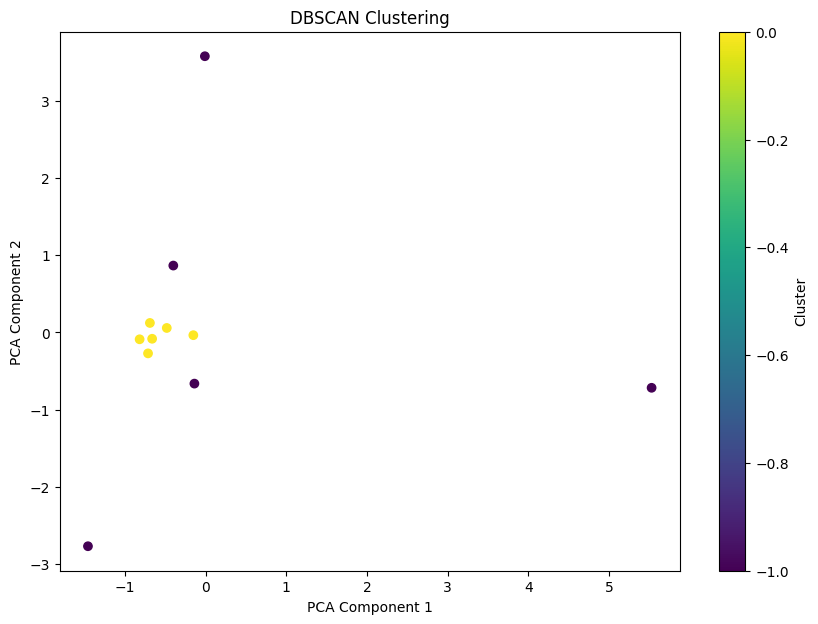

76
Cluster 0:
['Отовсюду слышно о\xa0популярности работы в\xa0IT', 'А\xa0вот если вы\xa0любите головоломки и\xa0ищете нестандартные решения повседневных задач, то\xa0вам, скорее всего, действительно понравится аналитика или программирование', 'Теперь компьютеров на планете много, а вот полей для агрокультур и территорий с чистым воздухом мало', '\n\nПомочь кешьюнианцам может приложение для контроля за посаженными деревьями, климатом и качеством воздуха', 'Вам нужно разобраться в местных нравах, собрать команду и организовать процесс разработки', 'Для того чтобы упростить задачу, вы можете использовать Playbook команды разработки Авито.']
Cluster -1:
['Но\xa0нужно\xa0ли туда идти\xa0— и\xa0если\xa0да, то\xa0кому это подходит? Можем успокоить всех, кто считает себя истинным гуманитарием: хардкорная математика нужна далеко не\xa0во\xa0всех айтишных специальностях', 'Еще одна хорошая новость: логическое мышление можно эффективно развивать хоть с\xa0нуля, а\xa0необходимую математическую баз

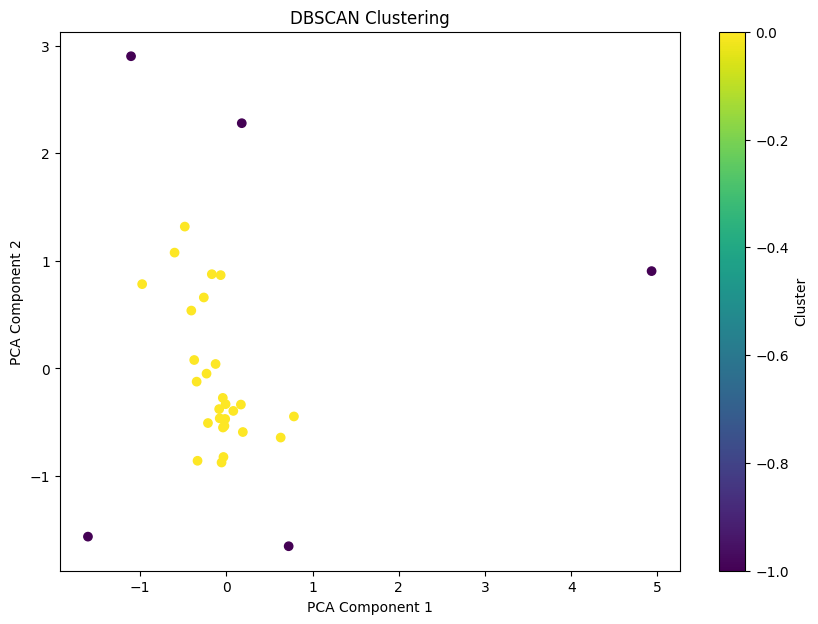

77
Cluster 0:
['Зоологи поймали у\xa0северо-восточного побережья Австралии крупную тигровую акулу, а\xa0когда начали подтягивать хищницу к\xa0борту судна, чтобы пометить, она неожиданно отрыгнула почти целый труп ехидны', 'Вероятно, зверь переплывал с\xa0одного острова на\xa0другой через узкий морской пролив, где его настигла и\xa0целиком проглотила акула', 'Согласно ', 'Также они регулярно поедают падаль, в\xa0частности, туши погибших китов (и\xa0по\xa0ошибке заглатывают антропогенный мусор, такой как шины и\xa0автомобильные номера)', 'А\xa0порой тигровым акулам удается дополнить свой рацион мясом сухопутных животных', 'Например, несколько лет назад ученые ., что у\xa0берегов американских штатов Алабама и\xa0Миссисипи эти хищницы периодически кормятся мелкими воробьиными птицами', 'Вероятно, каждую осень некоторое количество мигрирующих через Мексиканский залив пернатых тонут в\xa0море из-за непогоды, после чего их\xa0останки целиком заглатывают акулы', '.Команда зоологов под руководс

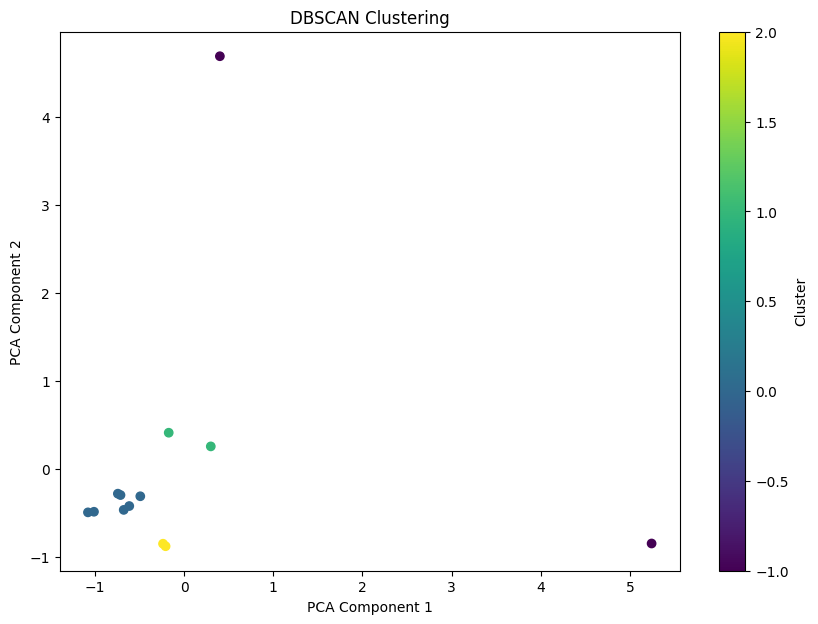

78
Cluster 0:
['Национальные институты здоровья США (NIH) ', 'В\xa0', 'исследовании примут участие женщины, в\xa0.\xa0— потребители нелегальных психоактивных препаратов', 'Ленакапавир относится к\xa0новой группе ', 'вирусного капсида и\xa0представляет собой длительно действующий препарат, который вводят инъекционно дважды в\xa0год', 'Запланированное число участников в\xa0каждом исследовании\xa0— 250\xa0человек, расчетные сроки завершения\xa0— 2027–2028\xa0годы', 'Как сообщается в\xa0журнале Nature, антибиотик воздействует на\xa0бактериальную транспортную систему липопротеинов и\xa0значительно не\xa0влияет на\xa0микробиом кишечника.']
Cluster 1:
['в\xa0пресс-релизе о\xa0начале двух клинических испытаний ленакапавира для доконтактной профилактики заражения вирусом иммунодефицита человека (ВИЧ)', 'Как отмечается, эти популяции недостаточно представлены в\xa0клинических исследованиях ВИЧ-инфекции, и\xa0начавшиеся испытания призваны исправить эту ситуацию']
Cluster 2:
['Его будут сравнивать

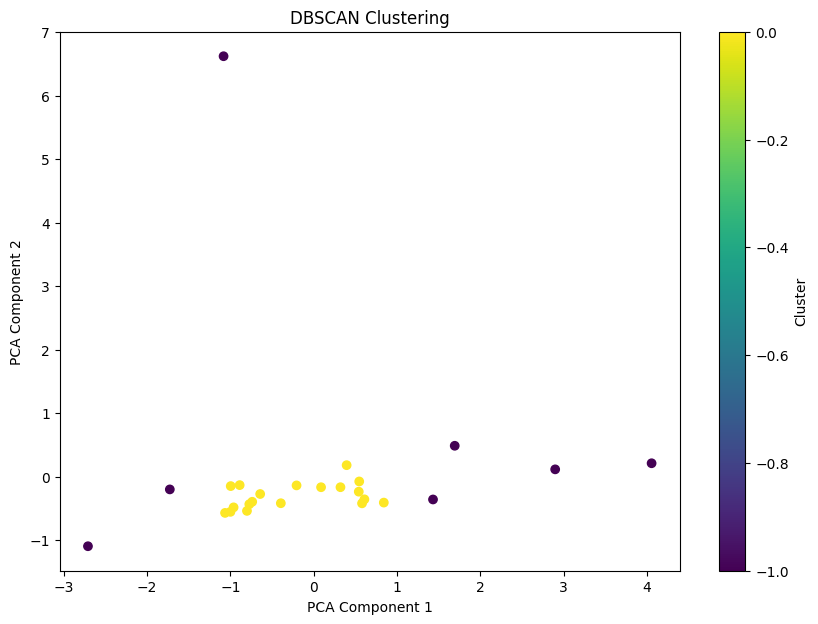

79
Cluster 0:
['Систематический обзор и\xa0метаанализ немецких ученых показал, что частота симптомов отмены антидепрессантов составляет примерно 15\xa0процентов', 'Как ', 'темой исследований в\xa0психиатрии, а\xa0также привлекает к\xa0себе внимание в\xa0клинической практике', 'К\xa0таким симптомам ', 'головокружение, головная боль, тошнота, бессонница и\xa0раздражительность, которые могут длиться до\xa0нескольких недель и\xa0даже месяцев', '.Однако остаются спорными вопросы о\xa0том, как часто возникает синдром отмены антидепрессантов, и\xa0то, насколько тяжелыми могут быть симптомы', 'По\xa0оценкам некоторых исследователей, он\xa0возникает у\xa0половины пациентов, а\xa0у\xa0четверти\xa0— в\xa0тяжелой форме', 'Однако эти оценки были ', 'критике по\xa0методологическим соображениям, особенно в\xa0связи с\xa0включением онлайн-опросов или других исследований, подверженных отбору с\xa0предвзятым отношением', 'Поэтому психиатры по-прежнему придерживаются разных позиций в\xa0отношении частоты

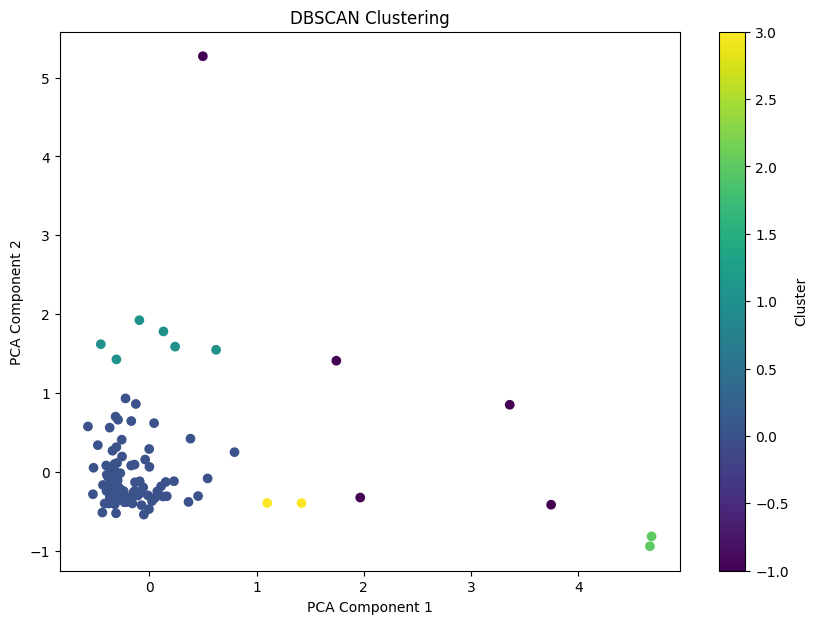

80
Cluster 0:
['Незадолго до\xa0начала Второй мировой войны кардиналы Римско-католической церкви выбрали нового папу, которому предстояло стать одним из\xa0самых неоднозначных понтификов в\xa0истории', 'Критики утверждают, что он\xa0сотрудничал с\xa0Гитлером и\xa0Муссолини, в\xa0то\xa0время как его защитники считают, что своими решениями он\xa0спас множество жизней', 'В\xa0книге ', '(издательство «Альпина Паблишер»), переведенной на\xa0русский язык Алексеем Капанадзе, историк и\xa0антрополог Дэвид Керцер рассказывает о\xa0деятельности папы римского во\xa0время войны', 'в\xa0Ватикан, оно не\xa0ожидало от\xa0него многого', 'Этот протестант представлял страну, у\xa0которой не\xa0было официальных дипломатических отношений с\xa0Ватиканом, так что положение Осборна не\xa0выглядело особенно многообещающим', 'Но\xa0он\xa0прочно обосновался в\xa0Риме, 10\xa0лет представлял Британию при Святом престоле и\xa0ни\xa0разу не\xa0покидал Вечный город более чем на\xa0несколько недель', 'Собственно, он\

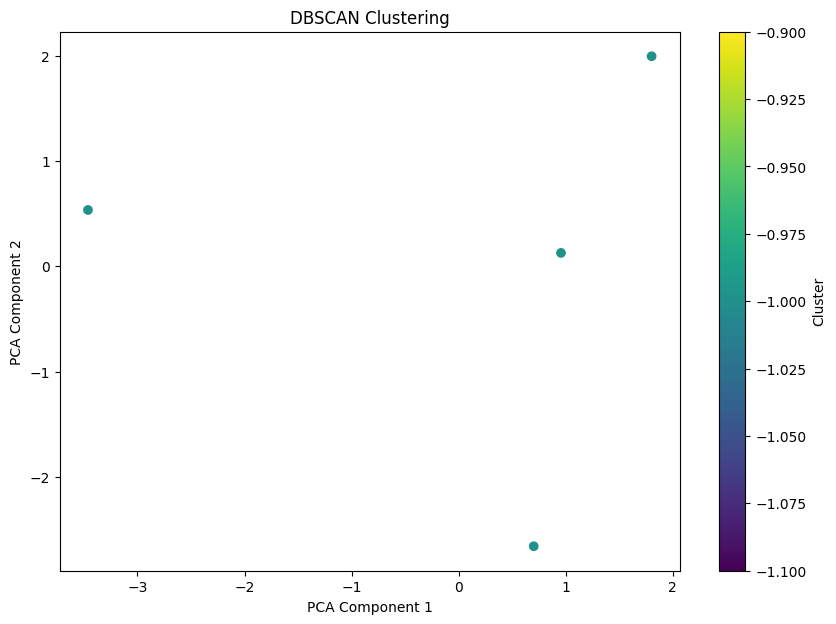

81
Cluster -1:
['Дождевые и\xa0ленточные, корабельные и\xa0шелковичные, нематоды и\xa0проволочники..', 'Червями называют тысячи существ из\xa0самых разных систематических групп\xa0— от\xa0моллюсков и\xa0личинок насекомых до\xa0позвоночных', 'Объединяет их\xa0удлиненное тело и\xa0отсутствие ног (или ноги такие маленькие, что едва заметны)', 'Если вы\xa0уже десять раз сходили на\xa0вторую «Дюну» и\xa0выучили все мемы про ., самое время проверить ваши знания о\xa0реальных червях: посмотрите на\xa0восемь фотографий и\xa0угадайте, кто изображен на\xa0каждой из\xa0них..\r']


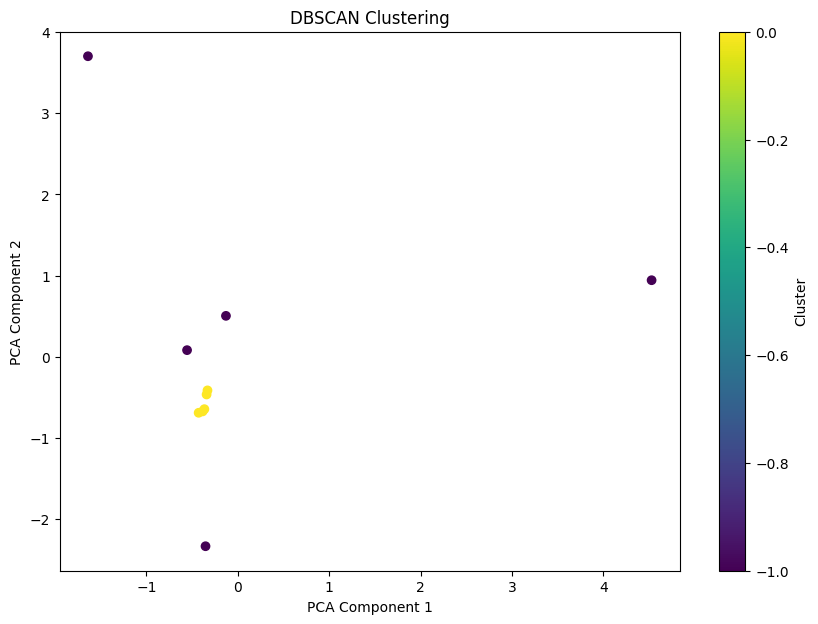

82
Cluster 0:
['.Помочь кешьюнианцам может приложение для контроля за\xa0посаженными деревьями, климатом и\xa0качеством воздуха', 'Вам нужно разобраться в\xa0местных нравах, собрать команду и\xa0организовать процесс разработки', 'Это циклический ускоритель для столкновения протонов и тяжелых ионов', 'Один из главных элементов коллайдера — сверхпроводящие магниты для удержания и фокусировки частиц', 'Для создания этих магнитов на российском ускорителе будут использованы высокотемпературные купратные сверхпроводники']
Cluster -1:
['Приветствуем, исследователь внеземных цивилизаций!.Жители планеты Кешью обращаются к\xa0вам за\xa0помощью: им\xa0необходимо восстановить леса и\xa0почвы планеты, пострадавшие от\xa0добычи кубонита\xa0— материала для изготовления вычислительных машин', 'Теперь компьютеров на\xa0планете много, а\xa0вот полей для агрокультур и\xa0территорий с\xa0чистым воздухом мало', 'Это масштабный проект, к\xa0работе над которым будут привлечены жители со\xa0всей планеты', 'Дл

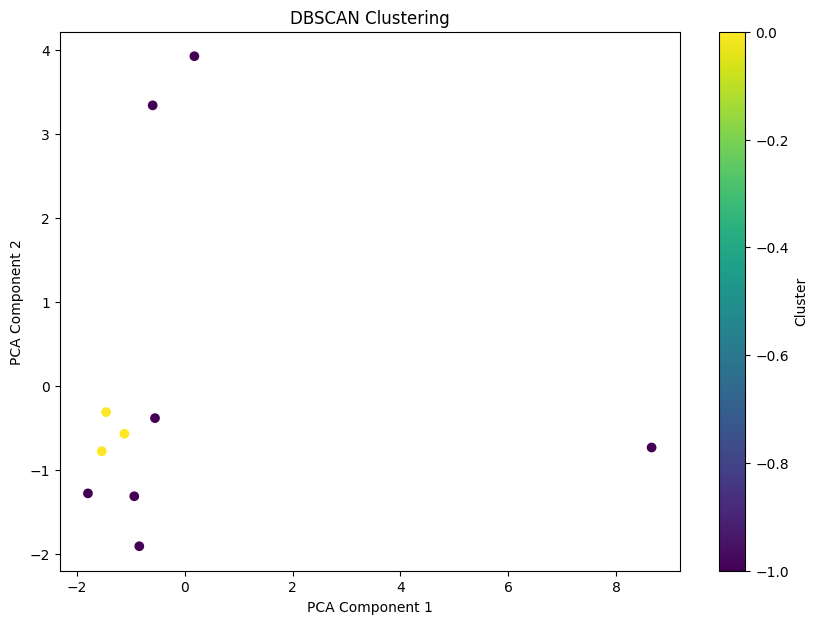

83
Cluster 0:
['Трансляция пуска ', 'в\xa0социальной сети\xa0X (бывший Twitter)..Впервые полноценная версия Starship, включающая в\xa0себя обе ступени, попыталась ', 'Это необходимо для снижения массы и\xa0увеличения управляемости первой ступени на\xa0этапе возвращения']
Cluster -1:
['Сверхтяжелая ракета-носитель Starship в\xa0полной конфигурации (прототип первой ступени Super Heavy B11\xa0с прототипом корабля Starship S29) отправилась в\xa0четвертый испытательный орбитальный полет, в\xa0ходе которого должна продемонстрировать мягкое приводнение в\xa0океан обеих ступеней', 'полет до\xa0околоземной орбиты в\xa0середине апреля 2023\xa0года, с\xa0тех пор было выполнено еще два пробных полета, причем в\xa0ходе последнего корабль Starship до\xa0орбиты добрался, но\xa0', 'на\xa0этапе возвращения на\xa0Землю..Четвертый испытательный орбитальный полет начался 6\xa0июня 2024 года в\xa015:50 по\xa0московскому времени, когда прототип первой ступени Super Heavy B11\xa0с прототипом корабля Starship

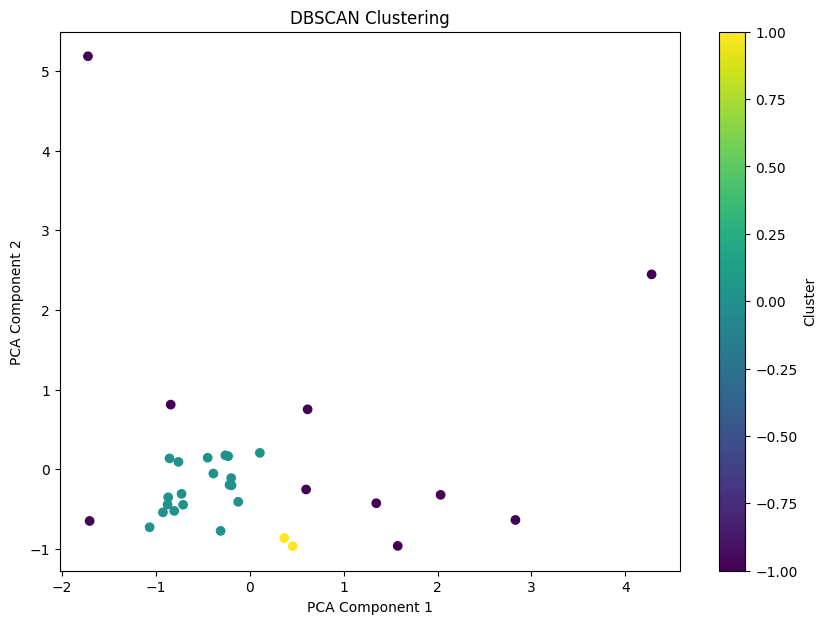

84
Cluster 0:
['Участники серии экспериментов решали, когда пора оставить нынешнего партнера по\xa0взаимодействию и\xa0отправиться на\xa0поиски нового', 'Исследование ', 'в\xa0...Время, которое мы\xa0тратим на\xa0то\xa0или иное занятие, зависит от\xa0ценности времени, которое мы\xa0могли\xa0бы потратить на\xa0другие\xa0— гласит теория альтернативных издержек', 'Согласно этой теории, в\xa0среде, богатой ресурсами, человек будет чаще бросать один ресурс и\xa0отправляться на\xa0поиски другого', 'То\xa0же верно и\xa0для случаев, когда для добычи новых ресурсов не\xa0нужно прикладывать много сил', 'С\xa0социальными взаимодействиями сложнее: в\xa0них различные факторы, такие как справедливость, могут быть важнее материальной выгоды', 'Они разработали игру по\xa0мотивам «Ультиматума»: участники виртуально взаимодействовали с\xa0партнером, который раз за\xa0разом предлагал им\xa0постепенно уменьшающиеся доли разных денежных сумм', 'В\xa0любой момент участники могли оставить партнера и\xa0перей

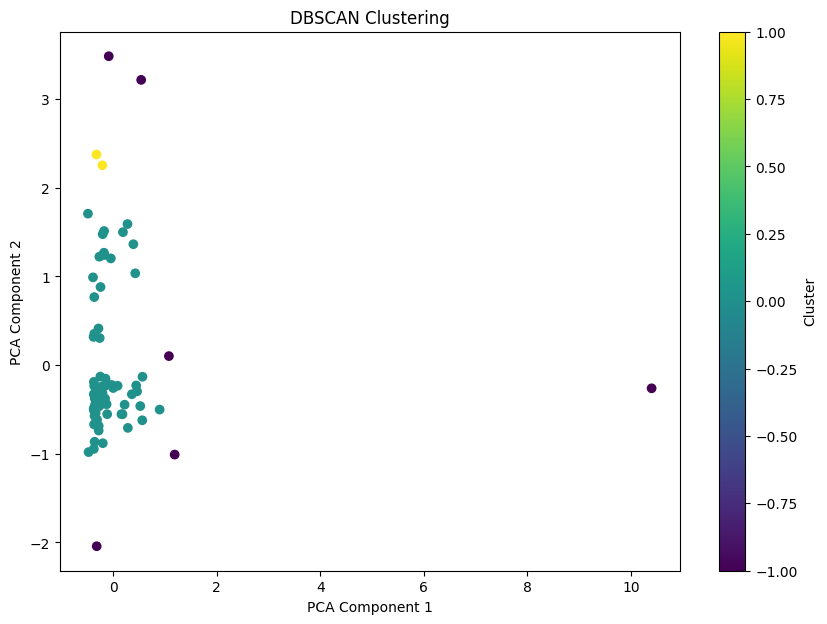

85
Cluster 0:
['Мы\xa0звоним, переписываемся в\xa0мессенджерах и\xa0пользуемся стримингами даже в\xa0метро', 'Незаметно для себя мы\xa0привыкли, что смартфоны почти не\xa0теряют сигнал', 'И\xa0поэтому раздражаемся, если даже на\xa0глубине нескольких десятков метров под землей до\xa0нас не\xa0могут дозвониться, не\xa0отправляются сообщения, а\xa0видео уходят в\xa0буферинг', 'В\xa0этом материале вместе с\xa0.\xa0мы расскажем, какие технологии и\xa0оборудование позволяют сделать так, чтобы это происходило как можно реже..На\xa0улице непогода: дождь и\xa0гроза, ветер ломает деревья', 'Электричество отключилось, и\xa0Wi-Fi больше не\xa0работает', 'И\xa0все-таки вы\xa0наслаждаетесь сериалом и\xa0листаете социальные сети: смартфон не\xa0теряет сигнал, и\xa0мобильный интернет работает, даже несмотря на\xa0происходящее за\xa0окном', 'Как это возможно?.В\xa0первую очередь качество связи зависит от\xa0продуманного радиопланирования сети: количества вышек, базовых станций и\xa0антенн', 'Ключевая з

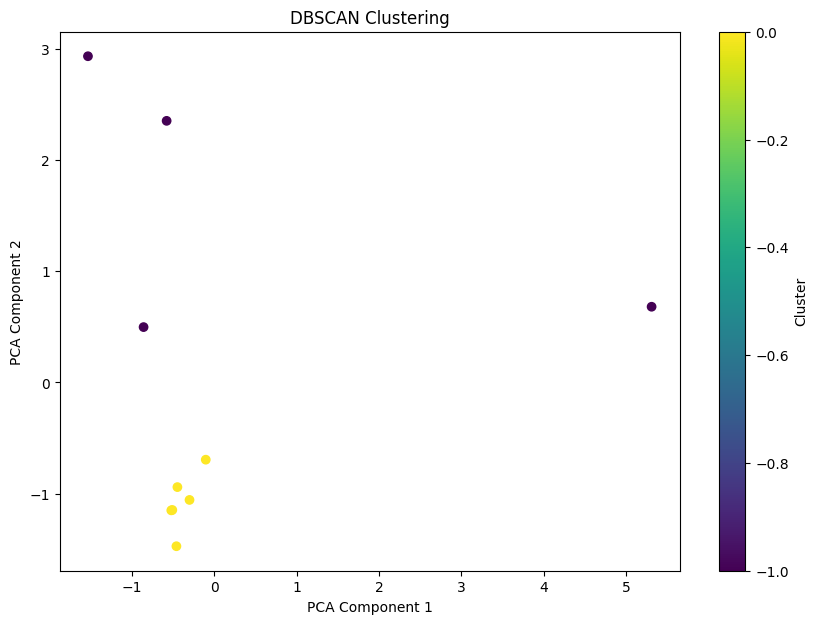

86
Cluster 0:
[' четвертый испытательный полет сверхтяжелой ракеты Starship компании SpaceX\xa0в полной конфигурации', 'В\xa0ходе него успешно прошел этап горячего старта двигателей корабля Starship, разделение ступеней и\xa0сброс переходного кольца', 'Кроме того, первая ступень впервые смогла после разворота приводниться в\xa0Мексиканском заливе в\xa0вертикальном состоянии без разрушения', 'Тем не\xa0менее корабль смог сбросить скорость до\xa0дозвуковой и\xa0приводнился, не\xa0разрушившись полностью, в\xa0Индийском океане', '.Первая попытка орбитального полета Starship ', 'взрывом, вторая попытка была более ., а\xa0в\xa0ходе третьего полета корабль ']
Cluster -1:
['Вторая ступень добралась до\xa0околоземной орбиты, оказавшись на\xa0максимальной высоте в\xa0210\xa0километров, после чего пережила повторный вход в\xa0атмосферу, хотя на\xa0высотах ниже 60\xa0километров из-за крайне высоких тепловых нагрузок стало заметно начало разрушения внешних элементов', 'добрался до\xa0орбиты..Команд

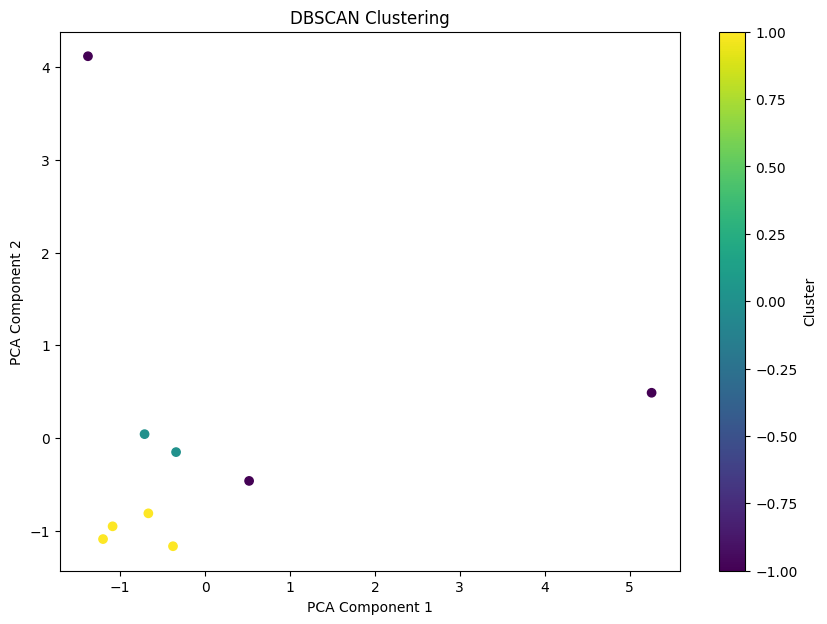

87
Cluster 0:
['Взлетный и\xa0служебный модули китайской автоматической станции «Чанъэ-6» утром 6\xa0июня 2024 года ', 'на\xa0обратной стороне Луны грунтом в\xa0капсулу на\xa0борту служебного модуля']
Cluster 1:
['в\xa0автоматическом режиме, после чего за\xa036\xa0минут выполнили процедуру перегрузки контейнера с\xa0', 'в\xa0космос в\xa0начале мая этого года', 'Аппарат обладает массой 9\xa0килограмм и\xa0оснащен двумя камерами', 'Он\xa0может проработать до\xa0трех месяцев вблизи Луны, получая ее\xa0снимки и\xa0исследуя магнитное поле.']
Cluster -1:
['Ожидается, что через две недели служебный модуль покинет окололунную орбиту и\xa0начнет перелет к\xa0Земле, а\xa0затем сбросит в\xa0атмосферу возвращаемую капсулу, которая должна совершить мягкую посадку 25\xa0июня во\xa0Внутренней Монголии..«Чанъэ-6» ', 'Это вторая миссия Китая по\xa0доставке грунта с\xa0Луны на\xa0Землю\xa0— три года назад «Чанъэ-5» успешно ', 'на\xa0Землю грунт с\xa0видимой стороны Луны..Пакистанский спутник-кубсат ICUB

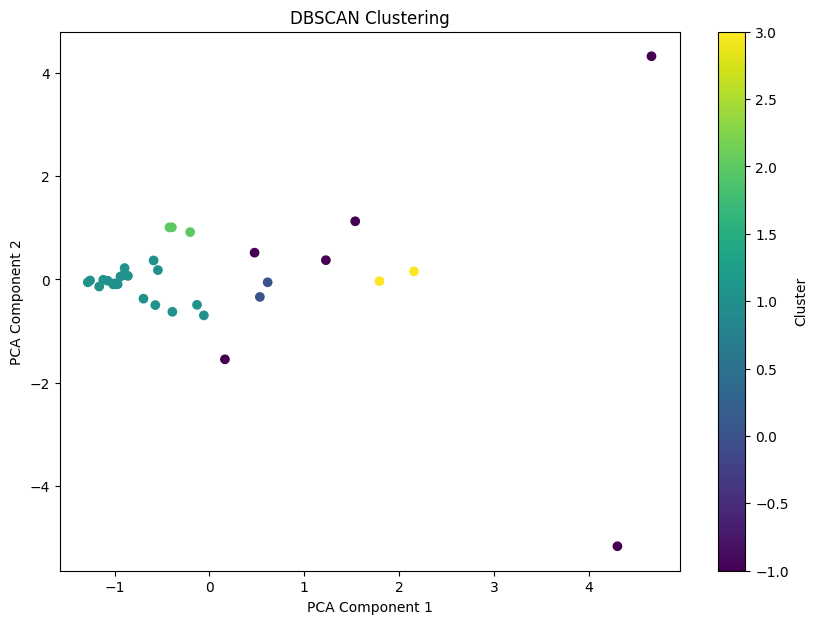

88
Cluster 0:
['Кроме того, ученые, опираясь на\xa0генетические данные, пришли к\xa0выводу, что, возможно, носители ботайской археологической культуры, населявшие в\xa0IV тысячелетии до\xa0нашей эры территорию современного Казахстана, все\xa0же разводили лошадей, о\xa0чем долгое время велась дискуссия', 'По\xa0их\xa0оценкам, этот процесс начался около 2664 года до\xa0нашей эры (доверительный интервал: 3064–2564 годы до\xa0нашей эры) и\xa0продолжался в\xa0течение многих поколений']
Cluster 1:
['Результаты этого исследования ', 'в\xa0журнале ...История о\xa0том, когда и\xa0где впервые ', 'лошадь, пока остается не\xa0распутана', 'На\xa0право называться первыми коневодами претендуют носители ботайской археологической культуры, существовавшей в\xa0эпоху энеолита на\xa0севере современного Казахстана', 'На\xa0ее\xa0памятниках, относящихся к\xa0IV тысячелетию до\xa0нашей эры, ученые ', 'потенциальные артефакты, связанные с\xa0разведением лошадей, объекты, интерпретируемые в\xa0качестве загонов

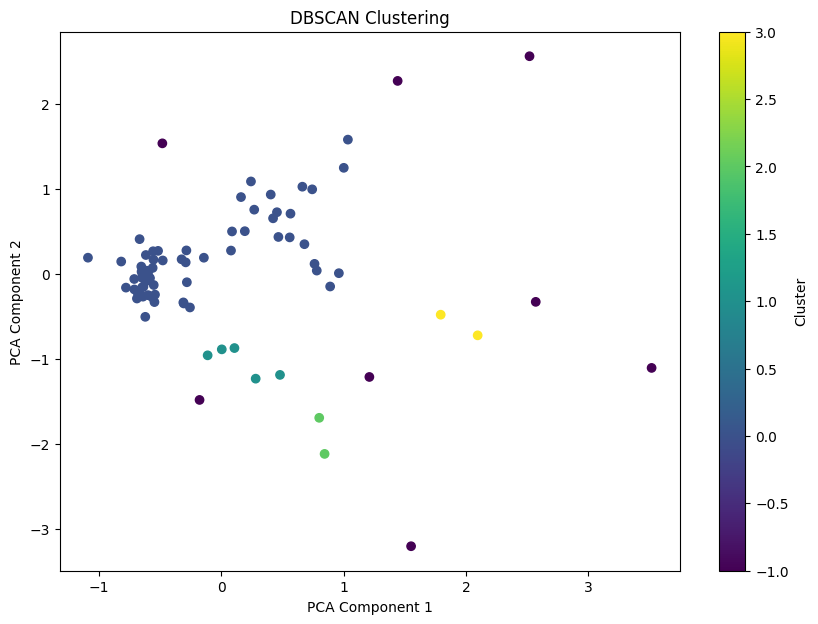

89
Cluster 0:
['Иосиф Сталин определял политику, подбирал кадры и\xa0контролировал систему надзора и\xa0репрессий в\xa0СССР', 'Однако он\xa0не\xa0был единственным автократом в\xa0стране\xa0— под его контролем находились местные авторитарные руководители, в\xa0частности, партийные секретари в\xa0республиках и\xa0региональных структурах', 'В\xa0книге ', '(издательство «НЛО»), переведенной на\xa0русский язык Николаем Эдельманом, историки Олег Хлевнюк и\xa0Йорам Горлицкий рассказывают, как функционировал политический режим СССР на\xa0низовом уровне и\xa0какими методами советские региональные лидеры создавать и\xa0консолидировали сети лояльности', 'И\xa0хотя этот феномен не\xa0был широко распространенным, он\xa0тем не\xa0менее демонстрировал важные тенденции развития сетей и\xa0представлял потенциальную угрозу единоначалию, которая исходила от\xa0руководящей региональной группы (бюро обкома)\xa0— в\xa0том случае, если она по\xa0разным причинам не\xa0признавала авторитет и\xa0силу первого се

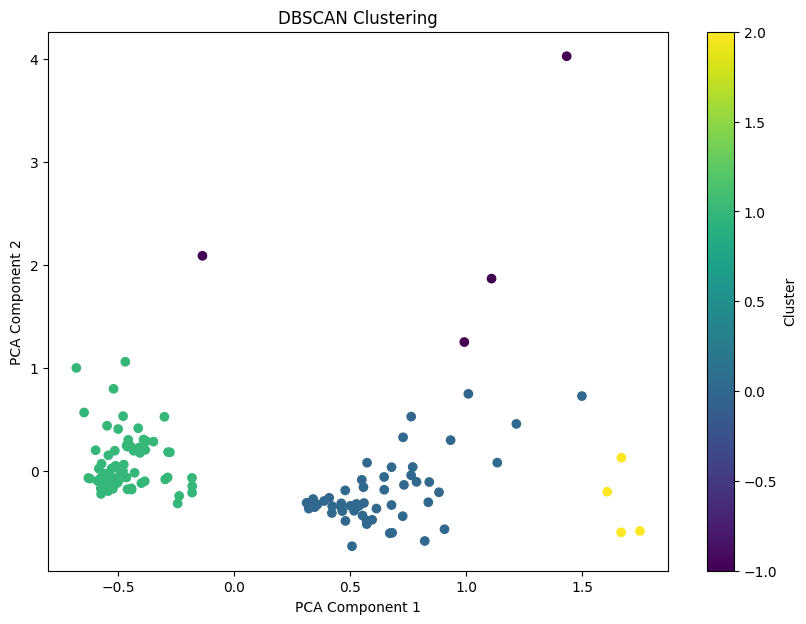

90
Cluster 0:
['Надоело на\xa0каждую Пасху варить яйца в\xa0луковой шелухе? Значит, пора обратиться за\xa0вдохновением к\xa0диким птицам', 'Они откладывают яйца с\xa0самой разнообразной расцветкой и\xa0узором: белые и\xa0зеленые, однотонные и\xa0пестрые, матовые и\xa0блестящие..', 'При этом окраска яиц зачастую функциональна', 'Например, она может маскировать будущего птенца от\xa0хищников или помогать его родителям не\xa0допустить в\xa0гнездо подкидышей..В\xa0материале собрали самые необычные птичьи яйца со\xa0всего света', 'У\xa0разных видов отряда\xa0— всего их\xa0около пятидесяти\xa0— яйца могут быть окрашены в\xa0голубой, розовый, ярко-зеленый или шоколадный цвета', 'Кроме того, яйца тинаму отличаются глянцевым блеском', 'Короче говоря, зачастую они выглядят точь-в-точь как пасхальные, правда, тускнеют довольно быстро после откладки..Орнитологи выяснили, что за\xa0яркую окраску яиц тинаму отвечают пигменты ', 'А\xa0вот понять, в\xa0чем эволюционный смысл этих «пасхальных» яиц, пок

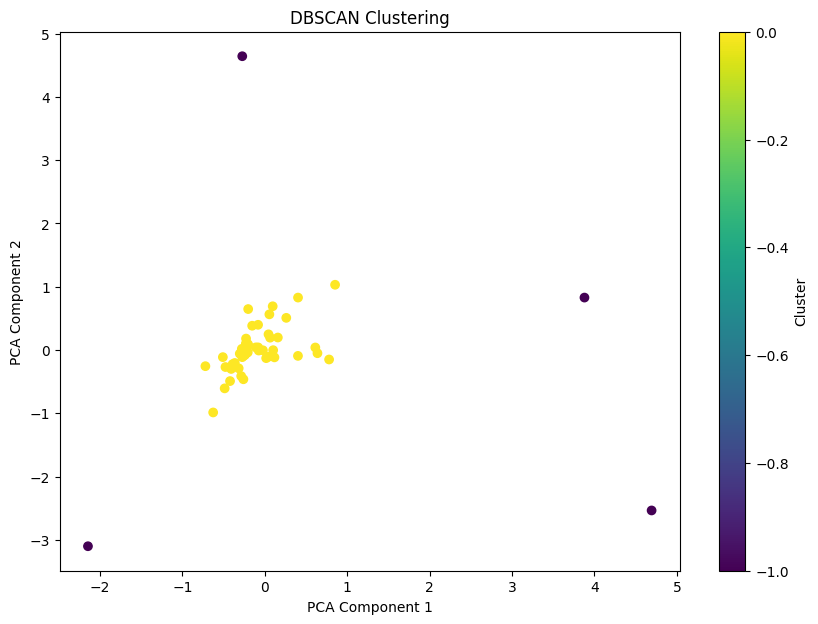

91
Cluster 0:
['В\xa0конце XIX века произошла одна из\xa0самых странных сделок по\xa0продаже египетских древностей: на\xa0двух пароходах в\xa0Британию доставили около 180 тысяч мумифицированных кошек, где их\xa0отправили на\xa0удобрение', 'Рассказываем, как останки питомцев и\xa0самих египтян спустя много веков пригодились практичным европейцам..На\xa0протяжении нескольких тысяч лет древние египтяне ', 'искусство мумификации и\xa0добились больших успехов', 'До\xa0наших дней дошли тысячи забальзамированных тел ', 'и\xa0членов их\xa0семей, ', 'и\xa0', 'этой североафриканской страны', 'Вместе с\xa0пирамидами Гизы, Большим сфинксом и\xa0прочими артефактами мумии стали настоящими символами исчезнувшей цивилизации (подробнее о\xa0том, как египтяне мумифицировали тела покойных, читайте в\xa0материале .)..При этом египтяне ', 'мумификацией покойных людей, и\xa0вовсе неудивительно, что в\xa0многочисленных памятниках археологи обнаружили миллионы забальзамированных животных: ., ., ., ., ., ', 'и

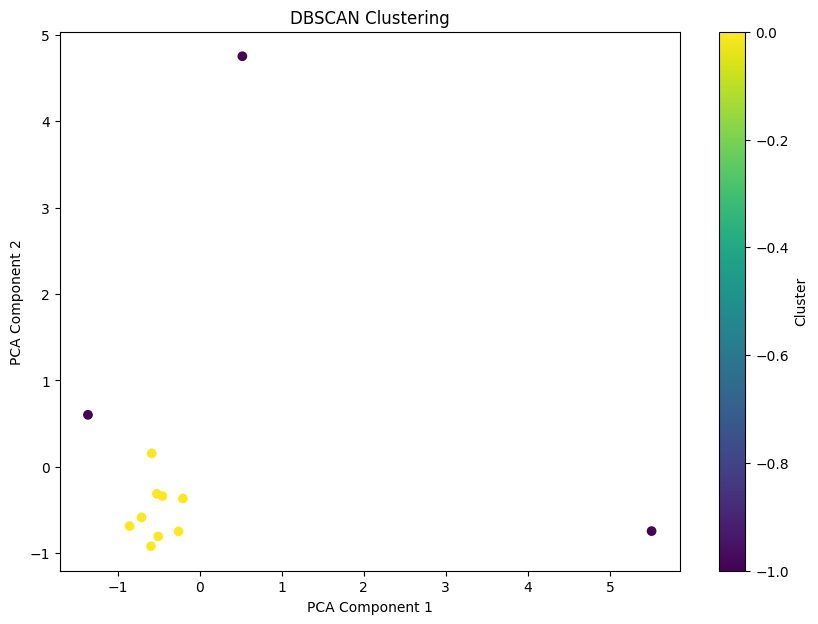

92
Cluster 0:
['Космический корабль CST-100 Starliner в\xa020:35 по\xa0московскому времени 6\xa0июня 2024 года ', 'в\xa0автоматическом режиме с\xa0модулем МКС «Гармония», проведя перед этим ряд маневров по\xa0сближению со\xa0станцией, в\xa0том числе при помощи системы ручного управления', 'Экипаж из\xa0астронавтов NASA Барри Уилмора и\xa0Суниты Уильямс проведет на\xa0станции десять дней, после чего вернется на\xa0Землю вместе с\xa0кораблем', 'В\xa0ходе полета были ', 'пять из\xa028\xa0двигателей ориентации, что привело к\xa0задержке стыковки..Текущий полет Starliner, созданного компанией Boeing, ', '5\xa0июня', 'Третья попытка старта произошла 11\xa0апреля 2024 года в\xa012:00 по\xa0московскому времени', 'Через 12\xa0минут и\xa026\xa0секунд после старта от\xa0третьей ступени ракеты отделился разгонный блок «Орион» с\xa0испытательной полезной нагрузкой, которая будет выведена на\xa0геостационарную орбиту', 'Кроме того, на\xa0низкую околоземную орбиту был выведен спутник-кубсат формата 3

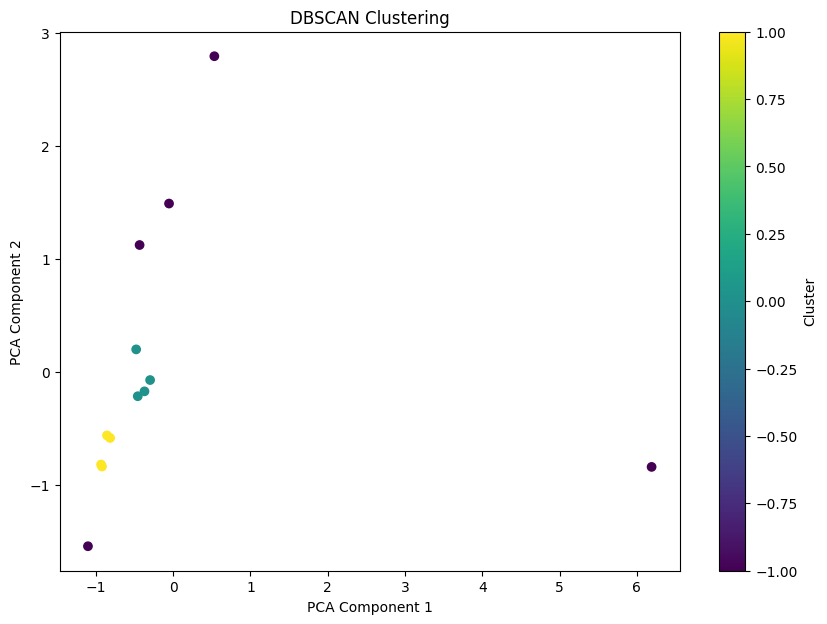

93
Cluster 0:
['Российский математик Сергей Петрович Новиков (Sergei Petrovich Novikov) ушел из\xa0жизни в\xa0возрасте 86\xa0лет', 'Новиков родился в\xa01938 году в\xa0Горьком', 'В\xa01960 году он\xa0закончил механико-математический факультет МГУ', 'Школьники участвовали в\xa0ней впервые с\xa02019\xa0года']
Cluster 1:
['О\xa0смерти ученого ', 'телеграм-канал «Непрерывное математическое образование»', 'Всего команда заработала три золотые и\xa0три серебряные медали', '']
Cluster -1:
['В\xa01964 году ученый защитил кандидатскую диссертацию на\xa0тему «Дифференцируемые пучки сфер», а\xa0спустя год\xa0— докторскую («Гладкие односвязные многообразия»)', 'В\xa01967 году Новиков стал профессором МГУ и\xa0с\xa01982 года возглавлял кафедру высшей геометрии и\xa0топологии мехмата МГУ', 'В\xa01966 году он\xa0был избран член-корреспондентом, а\xa0в\xa01981 году\xa0— действительным членом АН\xa0СССР (с\xa01991 года\xa0— РАН)..Научные интересы Новикова включали топологию, симплектическую геометрию и

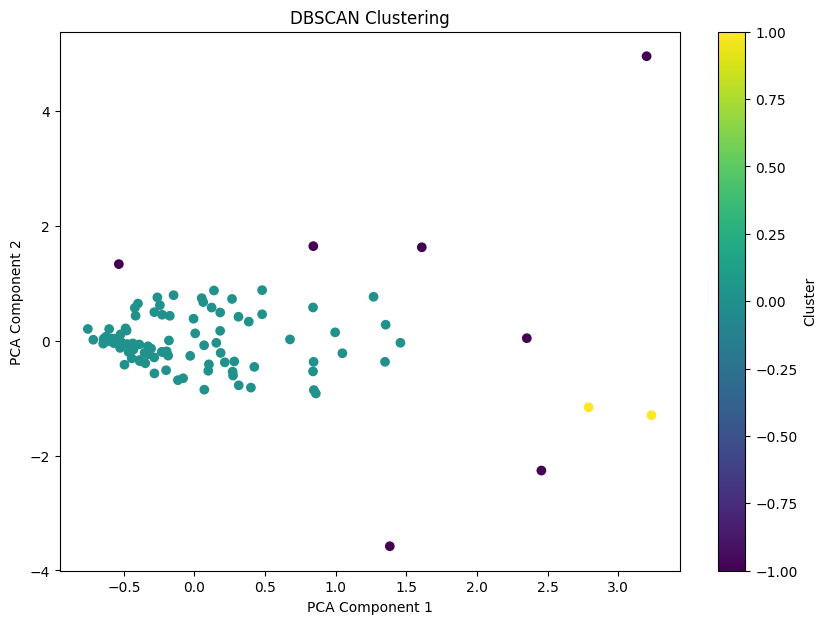

94
Cluster 0:
['Мы\xa0точно не\xa0знаем, как люди научились пользоваться языком, однако большинство ученых склоняется к\xa0тому, что это происходило постепенно', 'В\xa0.Впервые она была издана в\xa01994\xa0году.', 'книге ', '(издательство «Альпина нон-фикшн»), переведенной на\xa0русский язык Анастасией Пучковой, нейропсихолог и\xa0лингвист Стивен Пинкер выдвигает идею о\xa0том, что наша способность к\xa0языку является врожденной и\xa0сформировалась в\xa0процессе естественного отбора', 'Предлагаем вам ознакомиться с\xa0фрагментом о\xa0восприятии речи и\xa0нашей способности распознать слова даже там, где их\xa0нет..В\xa0студенческие годы я\xa0работал в\xa0лаборатории Университета Макгилла, где изучали восприятие речи на\xa0слух', 'С\xa0помощью компьютера я\xa0синтезировал сигналы, накладывая друг на\xa0друга два звука, и\xa0определял, звучат\xa0ли они как единый плотный звук или как два отдельных', 'Однажды в\xa0понедельник утром случилось нечто странное: то, что я\xa0синтезировал, внеза

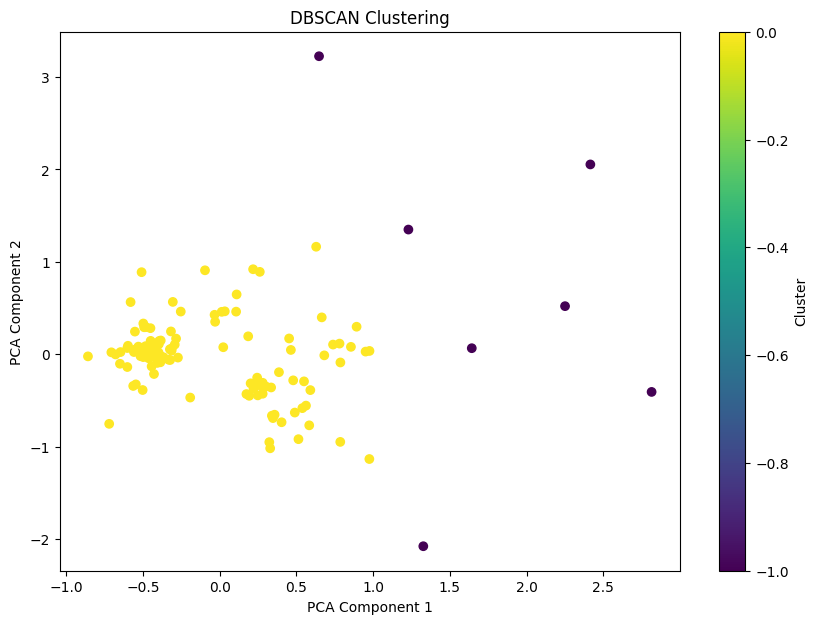

95
Cluster 0:
['Лондон, 2010\xa0год', 'В\xa0лаборатории больницы святого Варфоломея двое мужчин склонились над белым кроссовком', 'Они пытаются ., кому принадлежит обувь и\xa0кто убил ее\xa0несчастного владельца\xa0— иначе в\xa0центре столицы Британии случится взрыв..Конечно, кудрявый детектив Шерлок Холмс уже разгадал эту головоломку\xa0— ведь это элементарно', '«Пыльца для меня\xa0— что указатель на\xa0карте»,\xa0— говорит\xa0он', 'Действительно\xa0ли по\xa0цветочной пыли можно узнать район и\xa0раскрыть преступление? Или это очередная выдумка сценаристов? Разбираемся с\xa0Арсением Галимовым, палинологом Уральского отделения РАН..Пыльцой называют микроскопические, не\xa0больше 250\xa0микрометров, частицы, производимые в\xa0пыльниках мужскими частями цветков\xa0— тычинками', 'В\xa0пыльце содержатся мужские гаметы с\xa0генетическим материалом\xa0— спермии', 'Попадая в\xa0женскую часть цветка\xa0— пестик,\xa0— спермии оплодотворяют в\xa0нем яйцеклетки, и\xa0формируется семечко, из\xa0ко

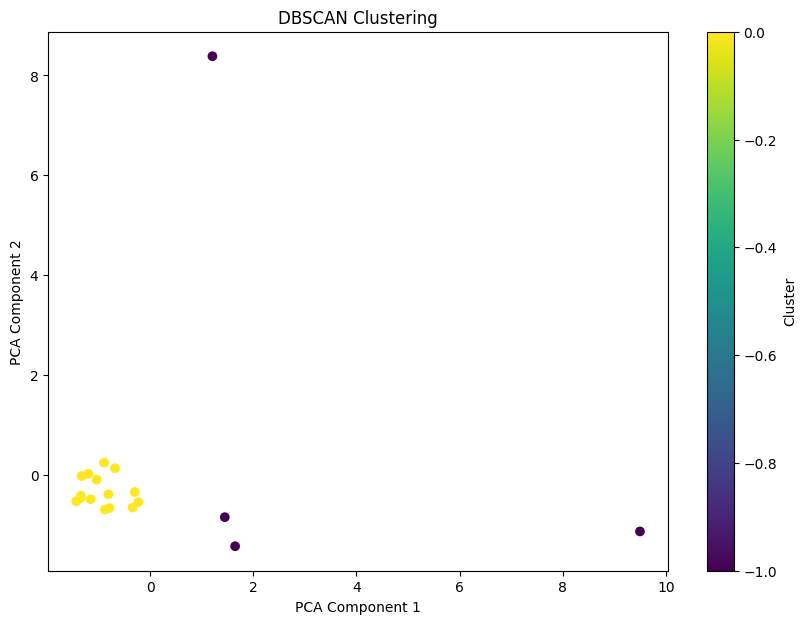

96
Cluster 0:
['Cчитаете, что можете рассказать аудитории .\xa0захватывающую историю о\xa0том, как люди познают мир и\xa0себя или создают новые необыкновенные устройства? Мы\xa0будем рады ее\xa0опубликовать', 'Но\xa0чтобы не\xa0тратить силы напрасно, прочитайте инструкцию ниже..Не\xa0надо сразу начинать писать и\xa0присылать нам готовый текст', 'Как показывает опыт, вероятность, что он\xa0нам подойдет, исчезающе мала, и\xa0вы\xa0напрасно потратите силы', 'Разумно это сделать только в\xa0том случае, если к\xa0моменту, когда вы\xa0решили написать нам, этот готовый текст у\xa0вас уже есть', 'Исключения бывают, но\xa0довольно велика вероятность, что он\xa0нам не\xa0подойдет..Пришлите нам .\xa0— короткий текст, в\xa0котором вы\xa0объясняете суть вашего замысла и\xa0то, почему такой текст нам нужен', 'Для нас это необходимо, чтобы мы\xa0сразу могли оценить\xa0то, как вы\xa0пишете, а\xa0также чтобы не\xa0задавать вам обязательных вопросов, вот таких:.Помните, что никто в\xa0XXI веке (почти) н

In [11]:
for numb in range(len(cluster)):
    df = pd.DataFrame({'x': compress[numb][:, 0], 'y': compress[numb][:, 1], 'cluster': cluster[numb]})

    plt.figure(figsize=(10, 7))
    plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', marker='o')
    plt.title('DBSCAN Clustering')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    # Выделение тем по кластерам
    print(numb)
    for clust in set(cluster[numb]):
        print(f"Cluster {clust}:")
        cluster_texts = [data[numb][i] for i in range(len(cluster[numb])) if cluster[numb][i] == clust]
        print(cluster_texts)